Data description:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

# ML models pipeline

## Data Importing - Data cleaning

In [128]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint, uniform
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam, SGD, RMSprop,Adamax
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


In [24]:
from tensorflow.random import set_seed
from tensorflow.keras.utils import set_random_seed

In [25]:

# Seed value

seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [26]:
#Importing data
data = pd.read_excel('default of credit card clients.xls',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# All datapoints are in integer type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [28]:
# No missing values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [29]:
#checking the imbalance of the dataset: 22.12 % --> default
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [30]:
'''
Function for some initial preprocessing of the data:
1) replace EDUCATION values 0, 5, 6 with 4 ('other' category) since they are not mentioned in the data description
2) replace MARRIAGE value 0 with 3 ('other' category) as there is not a 0 category for marriage column on data description 
3) drop 'ID' column - useless
4) rename target column to DEFAULT, rename PAY_0 to PAY_1 for consistency and more accurate variable names
'''

def initial_preprocessing(df):
    
    print('EDUCATION values before preprocessing:\n',df['EDUCATION'].value_counts())
    df['EDUCATION'].replace([0,5,6],4,inplace=True)
    print('EDUCATION values after preprocessing:\n',df['EDUCATION'].value_counts())
    print('MARRIAGE values before preprocessing:\n',df['MARRIAGE'].value_counts())
    df['MARRIAGE'].replace(0,3,inplace=True)
    print('MARRIAGE values after preprocessing:\n',df['MARRIAGE'].value_counts())
    df.drop(columns='ID',inplace=True)
    df.rename(columns={"default payment next month": "DEFAULT","PAY_0": "PAY_1"},inplace=True)
    
    return df

    
    

In [31]:
data = initial_preprocessing(data)

EDUCATION values before preprocessing:
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
EDUCATION values after preprocessing:
 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
MARRIAGE values before preprocessing:
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
MARRIAGE values after preprocessing:
 2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


## EDA

In [32]:
#functions for ploting boxplots and histograms of numerical columns - Useful to consider the right scaler 

def plot_boxplots(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    for i, column in enumerate(dataframe.columns):
        row = i // 2
        col = i % 2
        axes[row, col].boxplot(dataframe[column])
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Values')
        axes[row, col].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    

def plot_histograms(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    for i, column in enumerate(dataframe.columns):
        row = i // 2
        col = i % 2
        axes[row, col].hist(dataframe[column])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')

    # Remove any unused subplots
    if num_columns % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.tight_layout()
    plt.show()

In [33]:
#numerical columns
numerical_cols = ['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

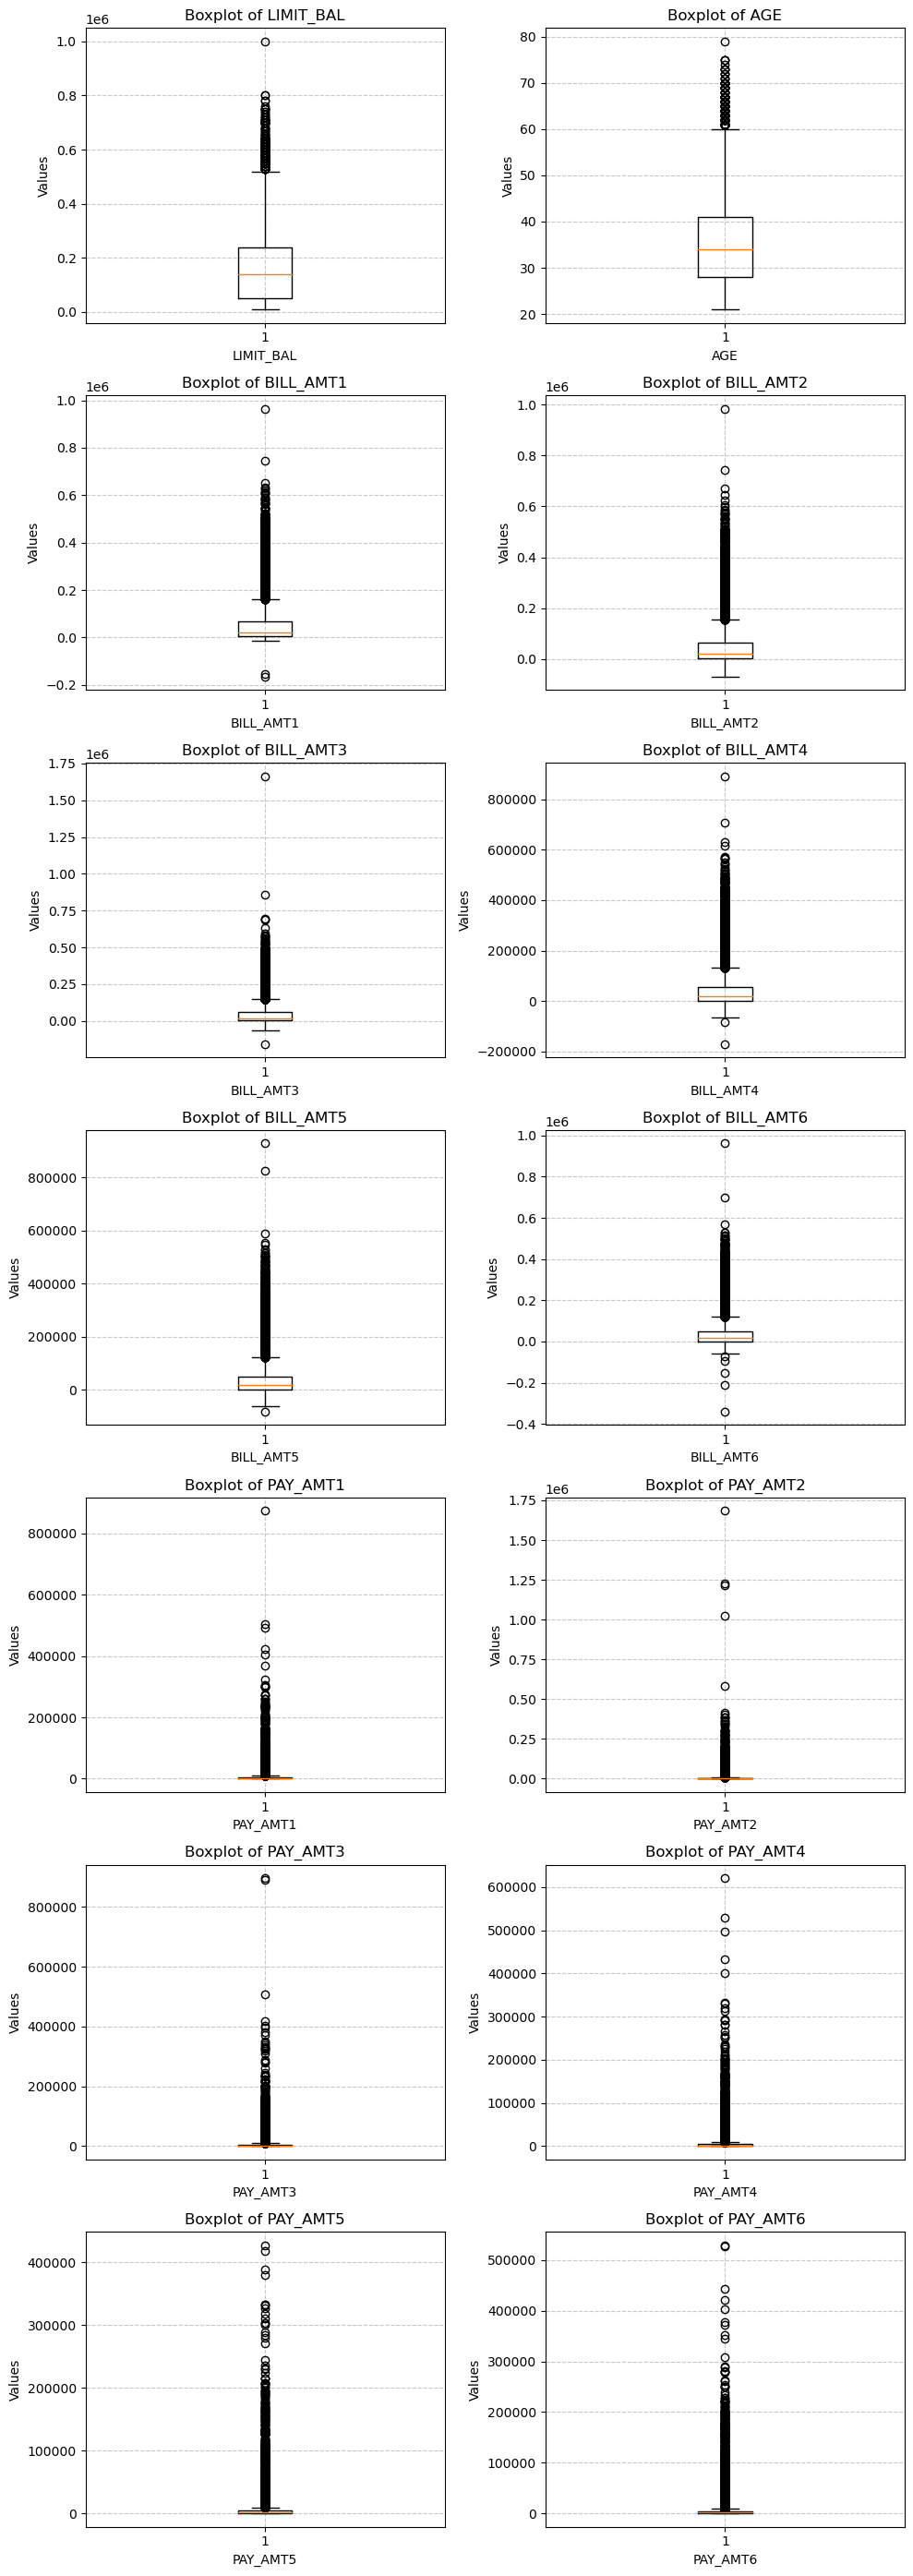

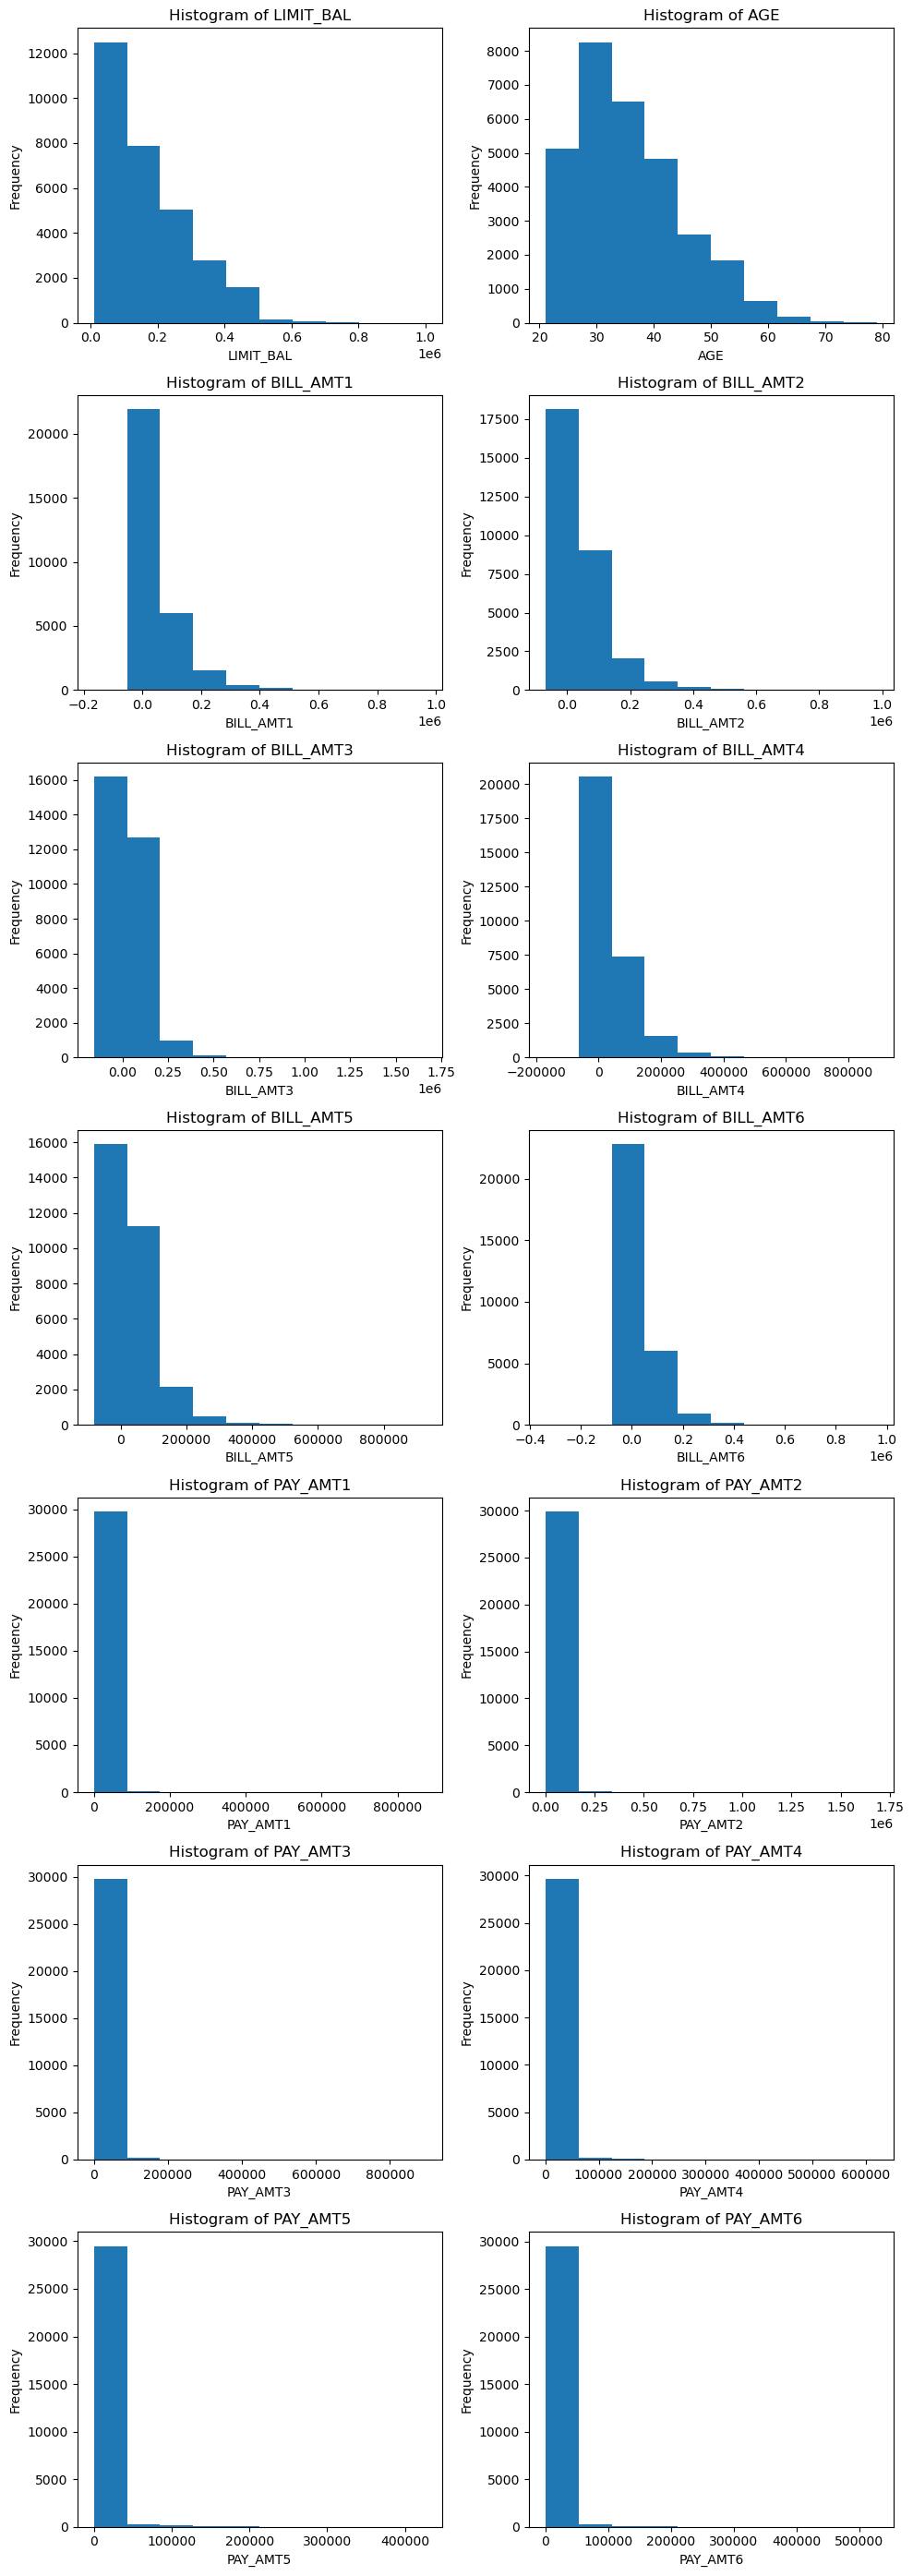

In [12]:
#boxplots and distributions of numerical columns - Due to the presence of outliers and the highly skewed distributions, RobustScaler() will be used 
plot_boxplots(data[numerical_cols])
plot_histograms(data[numerical_cols])

In [34]:
'''
Perform chi-square test to check the predictability of the variables PAY_1 - PAY_6 to the target variable - If it is high, then those categorical variables could one-hot-encoded
The test shows that the predictability is high, so even if after one hot encoding the dimensionality increases a lot, it might be worth it.
EDUCATION and MARRIAGE will be one hot encoded too, in order for the models not to assume any natural ordering.
'''

def chi2_test(data, categorical_vars, target_var):
    chi2_results = {}
    
    for var in categorical_vars:
        contingency_table = pd.crosstab(data[var], data[target_var])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results[var] = {'chi2': chi2, 'p_value': p_value}
    
    return chi2_results

In [35]:
chi2_test(data,['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],'DEFAULT')

{'PAY_1': {'chi2': 5365.964977413581, 'p_value': 0.0},
 'PAY_2': {'chi2': 3474.4667904168564, 'p_value': 0.0},
 'PAY_3': {'chi2': 2622.4621276828025, 'p_value': 0.0},
 'PAY_4': {'chi2': 2341.469945438205, 'p_value': 0.0},
 'PAY_5': {'chi2': 2197.694900930992, 'p_value': 0.0},
 'PAY_6': {'chi2': 1886.835309001187, 'p_value': 0.0}}

## Pipeline - Cross validation

In [208]:
'''
- train test split (20% test) before scaling and encoding to prevent data leakages 
- train set will be used for cross-validation/hyperparameter tuning and test set for final evaluation 
- Stratify is used to ensure that the proportion of the class labels will be the same as in the input dataset
'''
X_train, X_test, y_train, y_test = train_test_split(data.drop('DEFAULT',axis=1),data['DEFAULT'],test_size=0.2,stratify=data['DEFAULT'],random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (24000, 23)
X_test shape: (6000, 23)


In [37]:
#Custom transformer for Robust Scaler and One Hot Encoder

class PreprocessorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns,columns_num, drop='first', handle_unknown='ignore',sparse_output=False):
        self.columns = columns
        self.columns_num = columns_num
        self.drop = drop
        self.handle_unknown = handle_unknown
        self.sparse_output = sparse_output
        self.encoders = {}
        self.robust_enc = {}
        

    def fit(self, X, y=None):
        for col in self.columns:
            encoder = OneHotEncoder(drop=self.drop, sparse_output=self.sparse_output, handle_unknown=self.handle_unknown)
            encoder.fit(X[[col]])
            self.encoders[col] = encoder
        
        for col_num in self.columns_num:
            encoder_robust = RobustScaler()
            encoder_robust.fit(X[[col_num]])
            self.robust_enc[col_num] = encoder_robust
            
        return self

    def transform(self, X):
        transformed = X.copy()
        for col in self.columns:
            encoder = self.encoders[col]
            encoded_cols = encoder.transform(transformed[[col]])
            new_cols = [f"{col}_{value}" for value in encoder.categories_[0][1:]]
            encoded_cols_df = pd.DataFrame(encoded_cols, columns=new_cols, index=transformed.index)
            transformed = pd.concat([transformed, encoded_cols_df], axis=1)
        transformed = transformed.drop(self.columns, axis=1)
        
        for col_num in self.columns_num:
            encoder_robust = self.robust_enc[col_num]
            transformed[col_num] = encoder_robust.transform(transformed[[col_num]])
            
        return transformed
        
        

In [197]:
#construct the preprocessor to transform numeric and categorical columns
ohe_cols = ['EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ohe = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), ohe_cols)
], remainder='passthrough')

preprocessor = PreprocessorTransformer(columns = ohe_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False)

In [198]:
'''
construct a pipeline that applies the preprocessor and the sampling techniques
'''

def run_cross_val(X, y, model, k_folds, sampling = False, scaling = False):
    
    if sampling == False:
        if scaling == False:
            steps = [('ohe',ohe),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores without sampling techniques for {model}:\n')
        else:
            steps = [('preprocessor',preprocessor),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores without sampling techniques for {model}:\n')
        cv = StratifiedKFold(n_splits=k_folds)
    else:
        if scaling == False:
            over = SMOTE()
            steps = [('ohe',ohe),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores with sampling techniques on train set for {model}:\n')
        else:
            over = SMOTE()
            steps = [('preprocessor',preprocessor),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Cross validation scores with sampling techniques on train set for {model}:\n')
        cv = KFold(n_splits=k_folds) 
        
    scores = cross_validate(pipeline, X, y, scoring=['accuracy','precision','recall','f1','roc_auc'], cv=cv, n_jobs=-1)

    print('Accuracy: %.3f (+/- %.3f)' % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
    print('Precision: %.3f (+/- %.3f)' % (scores['test_precision'].mean(), scores['test_precision'].std()))
    print('Recall: %.3f (+/- %.3f)' % (scores['test_recall'].mean(), scores['test_recall'].std()))
    print('F1 Score: %.3f (+/- %.3f)' % (scores['test_f1'].mean(), scores['test_f1'].std()))
    print('AUC score: %.3f (+/- %.3f)' % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

In [209]:
run_cross_val(X_train,y_train,model = LogisticRegression(),k_folds=5,sampling=False,scaling=True)
print('')
run_cross_val(X_train,y_train,model = LogisticRegression(),k_folds=5,sampling=True,scaling = True)

Cross validation scores without sampling techniques for LogisticRegression():

Accuracy: 0.821 (+/- 0.002)
Precision: 0.681 (+/- 0.009)
Recall: 0.355 (+/- 0.013)
F1 Score: 0.467 (+/- 0.012)
AUC score: 0.771 (+/- 0.007)

Cross validation scores with sampling techniques on train set for LogisticRegression():

Accuracy: 0.767 (+/- 0.002)
Precision: 0.478 (+/- 0.010)
Recall: 0.589 (+/- 0.013)
F1 Score: 0.527 (+/- 0.008)
AUC score: 0.767 (+/- 0.005)


In [20]:
run_cross_val(X_train,y_train,model = XGBClassifier(),k_folds=5,sampling=False,scaling = False)
print('')
run_cross_val(X_train,y_train,model = XGBClassifier(),k_folds=5,sampling=True, scaling = False)

Cross validation scores without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):

Accuracy: 0.813 (+/- 0.002)
Precision: 0.636 (+/- 0.011)
Recall: 0.362 (+/- 0.008)
F1 Score: 0.462 (+/- 0.005)
AUC score: 0.766 (+/- 0.006)

Cross validation scores with sampling techniques 

In [21]:
run_cross_val(X_train,y_train,model = RandomForestClassifier(),k_folds=5, sampling=False, scaling = False)
print('')
run_cross_val(X_train,y_train,model = RandomForestClassifier(),k_folds=5,sampling=True, scaling = False)

Cross validation scores without sampling techniques for RandomForestClassifier():

Accuracy: 0.817 (+/- 0.003)
Precision: 0.652 (+/- 0.009)
Recall: 0.367 (+/- 0.013)
F1 Score: 0.469 (+/- 0.013)
AUC score: 0.767 (+/- 0.003)

Cross validation scores with sampling techniques on train set for RandomForestClassifier():

Accuracy: 0.815 (+/- 0.004)
Precision: 0.632 (+/- 0.009)
Recall: 0.392 (+/- 0.011)
F1 Score: 0.483 (+/- 0.007)
AUC score: 0.765 (+/- 0.004)


In [22]:
run_cross_val(X_train,y_train,model = SVC(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = SVC(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for SVC():

Accuracy: 0.818 (+/- 0.001)
Precision: 0.706 (+/- 0.007)
Recall: 0.304 (+/- 0.011)
F1 Score: 0.425 (+/- 0.011)
AUC score: 0.729 (+/- 0.013)

Cross validation scores with sampling techniques on train set for SVC():

Accuracy: 0.767 (+/- 0.006)
Precision: 0.478 (+/- 0.011)
Recall: 0.587 (+/- 0.016)
F1 Score: 0.527 (+/- 0.006)
AUC score: 0.765 (+/- 0.006)


In [23]:
run_cross_val(X_train,y_train,model = GaussianNB(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = GaussianNB(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for GaussianNB():

Accuracy: 0.792 (+/- 0.009)
Precision: 0.625 (+/- 0.039)
Recall: 0.143 (+/- 0.072)
F1 Score: 0.226 (+/- 0.088)
AUC score: 0.746 (+/- 0.004)

Cross validation scores with sampling techniques on train set for GaussianNB():

Accuracy: 0.796 (+/- 0.011)
Precision: 0.639 (+/- 0.046)
Recall: 0.183 (+/- 0.101)
F1 Score: 0.272 (+/- 0.107)
AUC score: 0.741 (+/- 0.002)


In [24]:
run_cross_val(X_train,y_train,model = KNeighborsClassifier(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = KNeighborsClassifier(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for KNeighborsClassifier():

Accuracy: 0.793 (+/- 0.003)
Precision: 0.552 (+/- 0.012)
Recall: 0.334 (+/- 0.010)
F1 Score: 0.416 (+/- 0.011)
AUC score: 0.698 (+/- 0.010)

Cross validation scores with sampling techniques on train set for KNeighborsClassifier():

Accuracy: 0.655 (+/- 0.005)
Precision: 0.345 (+/- 0.008)
Recall: 0.621 (+/- 0.010)
F1 Score: 0.444 (+/- 0.007)
AUC score: 0.684 (+/- 0.006)


In [25]:
run_cross_val(X_train,y_train,model = DecisionTreeClassifier(),k_folds=5, sampling=False, scaling=False)
print('')
run_cross_val(X_train,y_train,model = DecisionTreeClassifier(),k_folds=5,sampling=True, scaling =False)

Cross validation scores without sampling techniques for DecisionTreeClassifier():

Accuracy: 0.728 (+/- 0.003)
Precision: 0.393 (+/- 0.007)
Recall: 0.423 (+/- 0.016)
F1 Score: 0.407 (+/- 0.011)
AUC score: 0.619 (+/- 0.007)

Cross validation scores with sampling techniques on train set for DecisionTreeClassifier():

Accuracy: 0.722 (+/- 0.006)
Precision: 0.383 (+/- 0.011)
Recall: 0.418 (+/- 0.014)
F1 Score: 0.400 (+/- 0.008)
AUC score: 0.614 (+/- 0.007)


In [26]:
run_cross_val(X_train,y_train,model = MLPClassifier(),k_folds=5, sampling=False, scaling=True)
print('')
run_cross_val(X_train,y_train,model = MLPClassifier(),k_folds=5,sampling=True, scaling =True)

Cross validation scores without sampling techniques for MLPClassifier():

Accuracy: 0.809 (+/- 0.002)
Precision: 0.611 (+/- 0.011)
Recall: 0.373 (+/- 0.011)
F1 Score: 0.463 (+/- 0.007)
AUC score: 0.752 (+/- 0.011)

Cross validation scores with sampling techniques on train set for MLPClassifier():

Accuracy: 0.732 (+/- 0.017)
Precision: 0.422 (+/- 0.028)
Recall: 0.551 (+/- 0.028)
F1 Score: 0.477 (+/- 0.014)
AUC score: 0.719 (+/- 0.009)


## Hyperparameter Tuning

In [47]:
def RandomSearch(X, y, model ,metric, k_folds , param_grid, n_iter, sampling = False, scaling=False):
    
    if sampling == False:
        if scaling == False:
            steps = [('ohe',ohe),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search without sampling techniques for {model}:\n')
        else:
            steps = [('preprocessor',preprocessor),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search without sampling techniques for {model}:\n')
        cv = StratifiedKFold(n_splits=k_folds)
    else:
        if scaling == False:
            over = SMOTE()
            steps = [('ohe',ohe),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search with sampling techniques on train set for {model}:\n')
        else:
            over = SMOTE()
            steps = [('preprocessor',preprocessor),('over',over),('model',model)]
            pipeline = Pipeline(steps=steps)
            print(f'Random search with sampling techniques on train set for {model}:\n')
        cv = KFold(n_splits=k_folds) 
       
    rs = RandomizedSearchCV(pipeline, param_grid, cv = cv, n_iter=10, scoring = metric, n_jobs = -1)
    rs.fit(X, y)
    
    print('Best parameters found:', rs.best_params_)
    print('Best score:', rs.best_score_)
    
    return rs.best_params_

In [49]:
LR_grid = {
'model__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'model__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
'model__C' : [10 ** i for i in range(-3, 3)]
}

LR_best_params = RandomSearch(X_train, y_train, LogisticRegression(),metric='f1', k_folds=5,n_iter = 50,  param_grid=LR_grid ,sampling=False, scaling=True)

Random search without sampling techniques for LogisticRegression():



c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    s

Best parameters found: {'model__solver': 'newton-cg', 'model__penalty': 'none', 'model__C': 0.5994842503189409}
Best score: 0.4708588740366806


c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [84]:
XGB_grid = {
    'model__learning_rate': uniform(0.01, 0.3),                    
    'model__n_estimators': randint(100, 500),                       
    'model__max_depth': randint(3, 10),                      
    'model__min_child_weight': randint(1, 10),           
    'model__colsample_bytree': uniform(0.8, 0.2),         
    'model__gamma': uniform(0, 0.2),                               
    'model__reg_alpha': uniform(0, 0.5),                          
    'model__reg_lambda': uniform(0.1, 4.9)
    }

XGB_best_params =RandomSearch(X_train, y_train, XGBClassifier(),'f1', k_folds=5, param_grid=XGB_grid,n_iter=50 ,sampling=False, scaling=False)

Random search without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):

Best parameters found: {'model__colsample_bytree': 0.9070794558598719, 'model__gamma': 0.10564404232918914, 'model__learning_rate': 0.11459780257389901, 'model__max_depth': 3, 'model__min_child_weight

In [85]:
RF_grid = {
   'model__n_estimators': randint(10, 500),                          
    'model__max_depth': list(np.arange(10, 100, step=10)) + [None],      
    'model__min_samples_split': randint(2, 10),                       
    'model__min_samples_leaf': randint(1, 5),                         
    'model__max_features': ['auto', 'sqrt', 'log2'],                  
    'model__criterion': ['gini', 'entropy'] 
}

RF_best_params = RandomSearch(X_train, y_train, RandomForestClassifier(),'f1', k_folds=5, param_grid=RF_grid ,n_iter=50,sampling=False, scaling=False)

Random search without sampling techniques for RandomForestClassifier():

Best parameters found: {'model__criterion': 'gini', 'model__max_depth': 40, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'model__n_estimators': 491}
Best score: 0.472197462004151


In [91]:
MLP_grid = {
    'model__hidden_layer_sizes': [(8,),(16,),(32,),(64,),(16, 16),(32,32)],
    'model__learning_rate_init':  [10 ** i for i in range(-5, -2)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam', 'sgd'], 
    'model__batch_size': [32, 64, 128]
}

MLP_best_params = RandomSearch(X_train, y_train, MLPClassifier(),'f1', k_folds=5, param_grid=MLP_grid ,n_iter = 50,sampling=False, scaling=True)

Random search without sampling techniques for MLPClassifier():



Best parameters found: {'model__solver': 'adam', 'model__learning_rate_init': 0.0001, 'model__hidden_layer_sizes': (64,), 'model__batch_size': 64, 'model__activation': 'relu'}
Best score: 0.47518885364290214


c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
run_cross_val(X_train,y_train,model = LogisticRegression(solver=LR_best_params['model__solver'],penalty=LR_best_params['model__penalty'], C=LR_best_params['model__C']),k_folds=5,sampling=False, scaling = True)

Cross validation scores without sampling techniques for LogisticRegression(C=0.5994842503189409, penalty='none', solver='newton-cg'):

Accuracy: 0.822 (+/- 0.003)
Precision: 0.684 (+/- 0.011)
Recall: 0.359 (+/- 0.012)
F1 Score: 0.471 (+/- 0.012)
AUC score: 0.770 (+/- 0.007)


In [90]:
run_cross_val(X_train,y_train,model = RandomForestClassifier(n_estimators=RF_best_params['model__n_estimators'], max_depth=RF_best_params['model__max_depth'], min_samples_split=RF_best_params['model__min_samples_split'],
min_samples_leaf=RF_best_params['model__min_samples_leaf'],max_features=RF_best_params['model__max_features'],criterion = RF_best_params['model__criterion']),k_folds=5,sampling=False, scaling = False)

Cross validation scores without sampling techniques for RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=491):



Accuracy: 0.820 (+/- 0.001)
Precision: 0.674 (+/- 0.004)
Recall: 0.362 (+/- 0.010)
F1 Score: 0.471 (+/- 0.009)
AUC score: 0.779 (+/- 0.005)


In [87]:
run_cross_val(X_train,y_train,model = XGBClassifier(n_estimators = XGB_best_params['model__n_estimators'],max_depth = XGB_best_params['model__max_depth'],learning_rate=XGB_best_params['model__learning_rate']
                                                   , reg_alpha = XGB_best_params['model__reg_alpha'],reg_lambda = XGB_best_params['model__reg_lambda'],min_child_weight = XGB_best_params['model__min_child_weight'],
                                                   gamma = XGB_best_params['model__gamma'],colsample_bytree=XGB_best_params['model__colsample_bytree']),k_folds=5,sampling=False,scaling=False)



Cross validation scores without sampling techniques for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9070794558598719, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.10564404232918914, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.11459780257389901, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=469, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):



Accuracy: 0.820 (+/- 0.002)
Precision: 0.671 (+/- 0.009)
Recall: 0.364 (+/- 0.006)
F1 Score: 0.472 (+/- 0.006)
AUC score: 0.777 (+/- 0.006)


In [92]:
run_cross_val(X_train,y_train,model = MLPClassifier(hidden_layer_sizes=MLP_best_params['model__hidden_layer_sizes'],activation = MLP_best_params['model__activation'], solver=MLP_best_params['model__solver'],learning_rate_init=MLP_best_params['model__learning_rate_init'], batch_size=MLP_best_params['model__batch_size']),k_folds=5,sampling=False, scaling = True)

Cross validation scores without sampling techniques for MLPClassifier(batch_size=64, hidden_layer_sizes=(64,),
              learning_rate_init=0.0001):

Accuracy: 0.821 (+/- 0.002)
Precision: 0.679 (+/- 0.012)
Recall: 0.364 (+/- 0.014)
F1 Score: 0.474 (+/- 0.012)
AUC score: 0.780 (+/- 0.008)


# DL models pipeline

## Cross validation - temporal only

In [39]:
# 5-fold cross-validation
n_splits = 5 
kf = StratifiedKFold(n_splits=n_splits)

In [110]:
cat_cols = ['EDUCATION','MARRIAGE'] #categorical colums that are goind to be one hot encoded
enc_dl = PreprocessorTransformer(columns = cat_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False) #preprocessor for the dl pipeline

### LSTM 

------------------------------------------------------------------------
Training for fold 1
Epoch 1/55
300/300 [==============================] - 5s 11ms/step - loss: 0.5531 - accuracy: 0.7803 - val_loss: 0.5016 - val_accuracy: 0.7919 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 11ms/step - loss: 0.4813 - accuracy: 0.7994 - val_loss: 0.4806 - val_accuracy: 0.7931 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4672 - accuracy: 0.8009 - val_loss: 0.4748 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 10ms/step - loss: 0.4613 - accuracy: 0.8020 - val_loss: 0.4710 - val_accuracy: 0.7948 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 10ms/step - loss: 0.4577 - accuracy: 0.8037 - val_loss: 0.4678 - val_accuracy: 0.7965 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s 10ms/step - loss: 0.4551 - accuracy: 0.8048 - val_l

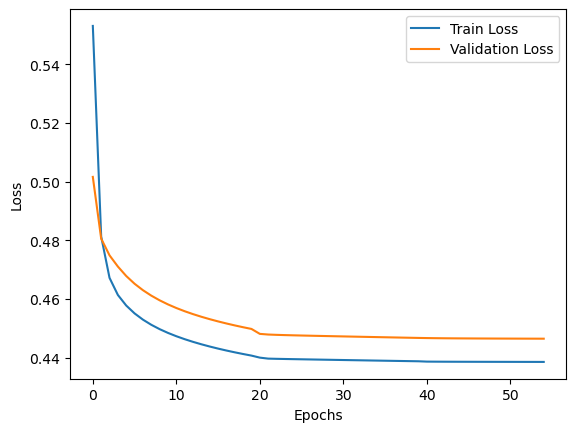

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/55
300/300 [==============================] - 4s 9ms/step - loss: 0.5443 - accuracy: 0.7791 - val_loss: 0.4918 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4821 - accuracy: 0.7983 - val_loss: 0.4672 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4678 - accuracy: 0.7992 - val_loss: 0.4574 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4621 - accuracy: 0.8012 - val_loss: 0.4530 - val_accuracy: 0.8058 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4589 - accuracy: 0.8024 - val_loss: 0.4501 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 2s 

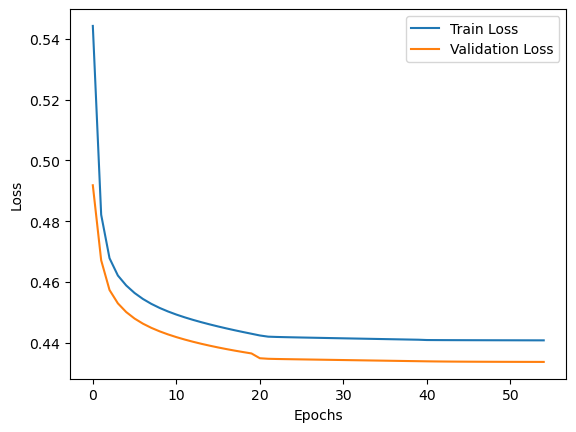

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/55
300/300 [==============================] - 4s 10ms/step - loss: 0.5462 - accuracy: 0.7766 - val_loss: 0.4946 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4826 - accuracy: 0.7985 - val_loss: 0.4722 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4687 - accuracy: 0.7979 - val_loss: 0.4643 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4625 - accuracy: 0.8001 - val_loss: 0.4603 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4588 - accuracy: 0.8014 - val_loss: 0.4575 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 2s

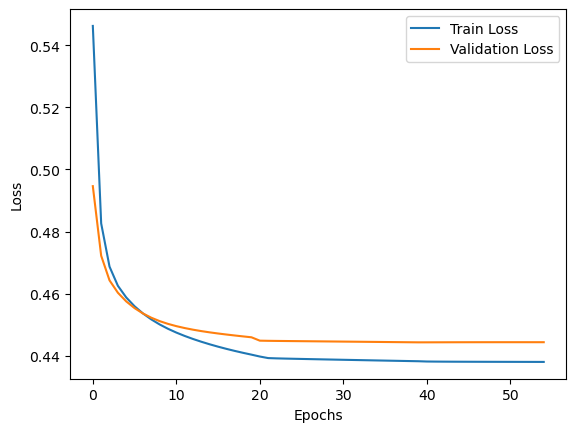

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/55
300/300 [==============================] - 4s 10ms/step - loss: 0.5478 - accuracy: 0.7722 - val_loss: 0.4977 - val_accuracy: 0.7937 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4837 - accuracy: 0.7980 - val_loss: 0.4741 - val_accuracy: 0.7998 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4698 - accuracy: 0.7983 - val_loss: 0.4652 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4636 - accuracy: 0.8004 - val_loss: 0.4605 - val_accuracy: 0.8029 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4599 - accuracy: 0.8006 - val_loss: 0.4577 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s

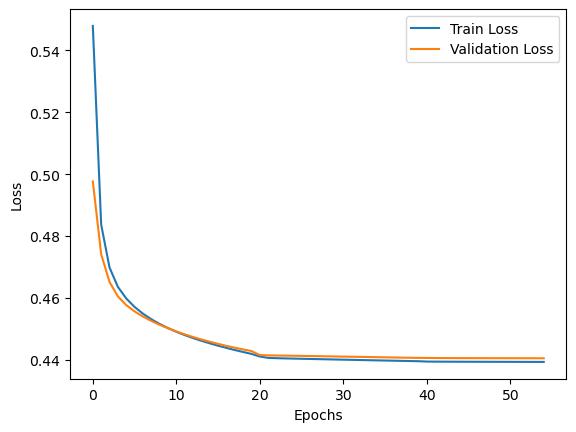

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/55
300/300 [==============================] - 4s 10ms/step - loss: 0.5546 - accuracy: 0.7604 - val_loss: 0.4991 - val_accuracy: 0.7935 - lr: 1.0000e-04
Epoch 2/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4849 - accuracy: 0.7960 - val_loss: 0.4754 - val_accuracy: 0.7975 - lr: 1.0000e-04
Epoch 3/55
300/300 [==============================] - 2s 8ms/step - loss: 0.4707 - accuracy: 0.7979 - val_loss: 0.4670 - val_accuracy: 0.7983 - lr: 1.0000e-04
Epoch 4/55
300/300 [==============================] - 3s 8ms/step - loss: 0.4644 - accuracy: 0.8004 - val_loss: 0.4625 - val_accuracy: 0.7985 - lr: 1.0000e-04
Epoch 5/55
300/300 [==============================] - 3s 9ms/step - loss: 0.4605 - accuracy: 0.8015 - val_loss: 0.4595 - val_accuracy: 0.7998 - lr: 1.0000e-04
Epoch 6/55
300/300 [==============================] - 3s

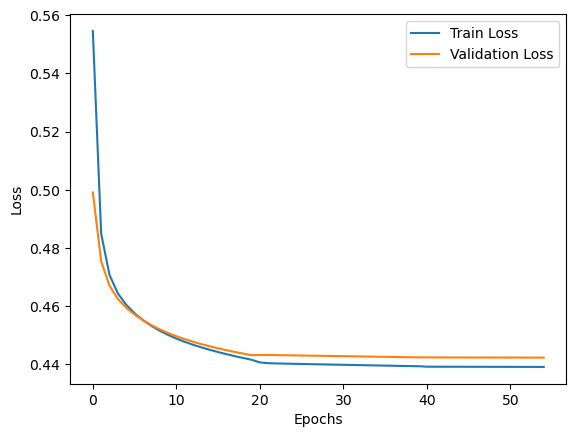

150/150 [==============================] - 1s 3ms/step
Accuracy: 0.812 (+/- 0.003)
Precision: 0.644 (+/- 0.011)
Recall: 0.336 (+/- 0.016)
F1 score: 0.442 (+/- 0.016)
AUC score: 0.642 (+/- 0.008)


In [97]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    # Perform preprocessing steps on X_train_dl
    X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
    X_test_dl_preprocessed = enc_dl.transform(X_test_dl)

    # Apply SMOTE and undersampling to address class imbalance
    # over = SMOTE(sampling_strategy=0.4, random_state=42)
    # under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    # steps = [('o',over),('u',under)]
    # pipe = Pipeline(steps=steps)
        
    # X_train_dl_resampled, y_train_dl_resampled =  pipe.fit_resample(X_train_dl_preprocessed, y_train_dl)
    
    # round_cols = ['SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6'] + X_train_dl_resampled.filter(like='EDUCATION').columns.to_list() + X_train_dl_resampled.filter(like='MARRIAGE').columns.to_list() 
    # for col in round_cols:
    #     X_train_dl_resampled[col] = X_train_dl_resampled[col].round()
    
    # Split training data into static and temporal features
    # Perform any necessary reshaping or transformations
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
    X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
    X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
    X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
    X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
    stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
    y_train_dl = y_train_dl.to_numpy()
    y_test_dl = y_test_dl.to_numpy()

    # Build and compile LSTM model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128,return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.0001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 55

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    batch_size = 64
    
    # Train the model
    history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

### LSTM Tuning architectures

In [27]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 6, 256)            266240    
                                                                 
 flatten_12 (Flatten)        (None, 1536)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 1537      
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 19s 26ms/step - loss: 0.5280 - accuracy: 0.7862 - val_loss: 0.4870 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4727 - accuracy: 0.7987 - val_loss: 0.4757 - val_accuracy: 0.7929 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4630 - accuracy: 0.8008 - val_loss: 0.4697 - val_accuracy: 0.7944 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4579 - accuracy: 0.8022 - val_loss: 0.4654 - val_accuracy: 0.7956 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 15s 25ms/step - loss: 0.4545 - accuracy: 0.8027 - val_loss: 0.4624 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4519 - accuracy: 0.8041 

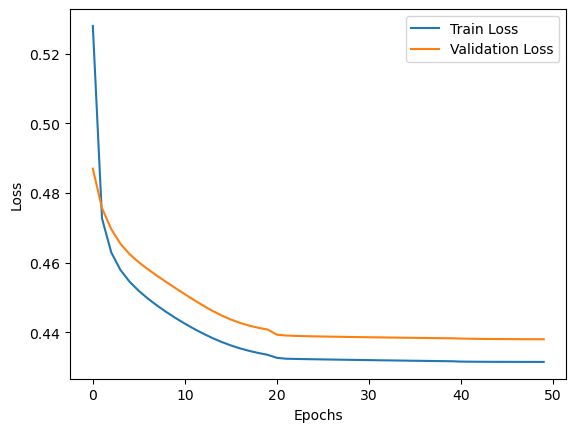

150/150 [==============================] - 2s 10ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 17s 24ms/step - loss: 0.5202 - accuracy: 0.7916 - val_loss: 0.4781 - val_accuracy: 0.7975 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 14s 23ms/step - loss: 0.4762 - accuracy: 0.7969 - val_loss: 0.4658 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4688 - accuracy: 0.7982 - val_loss: 0.4596 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4643 - accuracy: 0.7994 - val_loss: 0.4553 - val_accuracy: 0.8042 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4610 - accuracy: 0.7998 - val_loss: 0.4522 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

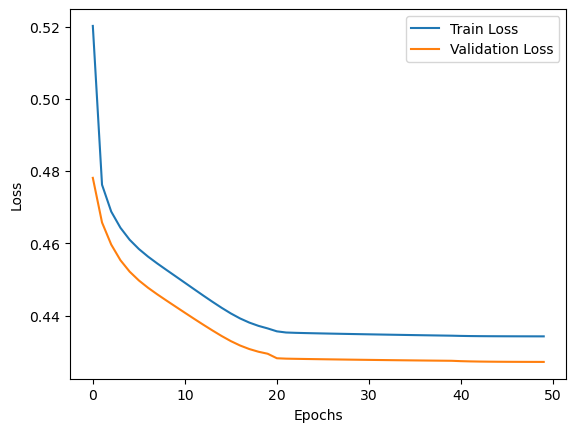

150/150 [==============================] - 3s 12ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 21s 30ms/step - loss: 0.5283 - accuracy: 0.7824 - val_loss: 0.4825 - val_accuracy: 0.7975 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4764 - accuracy: 0.7958 - val_loss: 0.4691 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4668 - accuracy: 0.7978 - val_loss: 0.4628 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 16s 26ms/step - loss: 0.4612 - accuracy: 0.7997 - val_loss: 0.4583 - val_accuracy: 0.8023 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4571 - accuracy: 0.8012 - val_loss: 0.4550 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

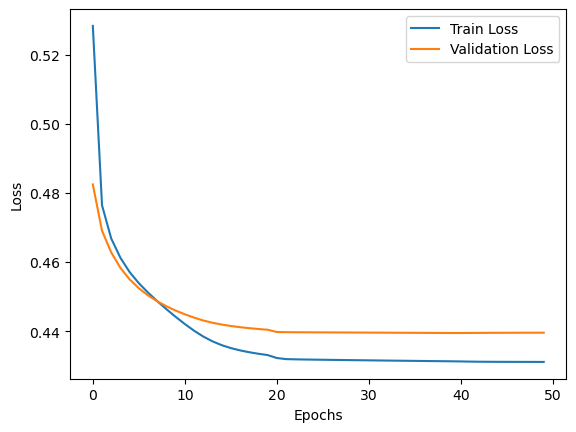

150/150 [==============================] - 3s 12ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 20s 27ms/step - loss: 0.5250 - accuracy: 0.7935 - val_loss: 0.4811 - val_accuracy: 0.7967 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 16s 27ms/step - loss: 0.4750 - accuracy: 0.7969 - val_loss: 0.4680 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 15s 26ms/step - loss: 0.4668 - accuracy: 0.7989 - val_loss: 0.4622 - val_accuracy: 0.8031 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4614 - accuracy: 0.8004 - val_loss: 0.4585 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 14s 24ms/step - loss: 0.4575 - accuracy: 0.8012 - val_loss: 0.4559 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 6/50
600/600 [==========================

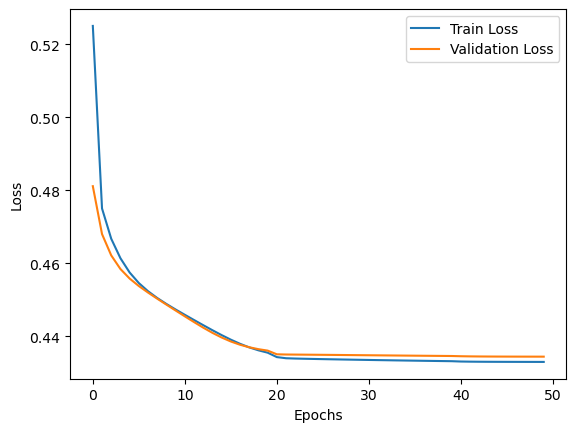

150/150 [==============================] - 2s 9ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 16s 23ms/step - loss: 0.5239 - accuracy: 0.7944 - val_loss: 0.4818 - val_accuracy: 0.7979 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4754 - accuracy: 0.7969 - val_loss: 0.4694 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4666 - accuracy: 0.7983 - val_loss: 0.4639 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 13s 22ms/step - loss: 0.4612 - accuracy: 0.8005 - val_loss: 0.4604 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 13s 21ms/step - loss: 0.4573 - accuracy: 0.8023 - val_loss: 0.4577 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 6/50
600/600 [===========================

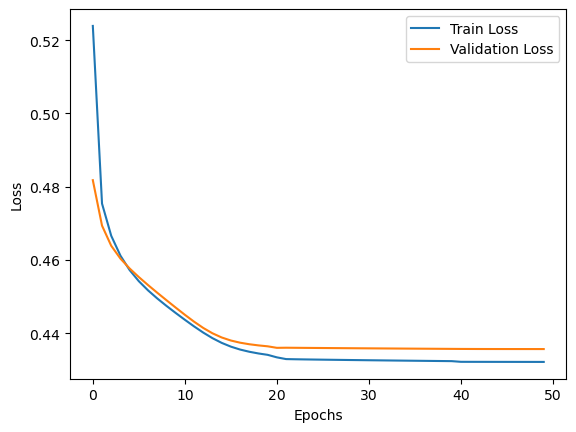

150/150 [==============================] - 3s 13ms/step
Architecture: {'hidden_layers': 2, 'units_per_layer': 64}
Accuracy: 0.820 (+/- 0.002)
Precision: 0.659 (+/- 0.010)
Recall: 0.383 (+/- 0.010)
F1 score: 0.484 (+/- 0.008)
AUC score: 0.663 (+/- 0.004)

Best Architecture:
{'hidden_layers': 2, 'units_per_layer': 64}
Best F1 Score: 0.4843156989462418


In [36]:
architectures = [
    {'hidden_layers': 2, 'units_per_layer': 64}
]

best_architecture = None
best_f1_score = 0.0

for architecture in architectures:
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []
    
    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        # Perform preprocessing steps on X_train_dl
        X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
        X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
        
        temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
        'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
        static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
        static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
        
        X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
        X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
        X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
        X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

        PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
        BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
        PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
        
        PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
        BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
        PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
        
        PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
        BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
        PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
        
        # Stack temporal features
        stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
        stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
        y_train_dl = y_train_dl.to_numpy()
        y_test_dl = y_test_dl.to_numpy()
        
        # Build and compile LSTM model
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
        
        # Define the LSTM model
        model = Sequential()
        model.add(LSTM(architecture['units_per_layer'], return_sequences=True, input_shape=(num_time_steps, num_features)))
        for _ in range(1, architecture['hidden_layers']):
            model.add(LSTM(architecture['units_per_layer'], return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        initial_learning_rate = 0.0001  # Initial learning rate
        decay_rate = 0.1  # Decay rate
        decay_steps = 20  # Decay steps (number of steps before applying decay)
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)
        
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
        
        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')
    
        # Train the model
        batch_size = 32
        
        # Train the model
        history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
        
        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        y_pred_probs = model.predict(stacked_test)
        y_pred = (y_pred_probs>=0.5).astype(int)    
        
        accuracy =  accuracy_score(y_test_dl,y_pred)
        precision = precision_score(y_test_dl,y_pred)
        recall = recall_score(y_test_dl,y_pred)
        f1 =  f1_score(y_test_dl,y_pred)
        AUC = roc_auc_score(y_test_dl,y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)
        
        fold_no = fold_no + 1
        
    # Calculate the average F1 score for the current architecture
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current architecture
    print(f"Architecture: {architecture}")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()
    
    # Check if the current architecture has a higher average F1 score
    # If so, update the best architecture and best F1 score
    if average_f1_score > best_f1_score:
        best_architecture = architecture
        best_f1_score = average_f1_score


# Print the best architecture
print("Best Architecture:")
print(best_architecture)
print("Best F1 Score:", best_f1_score)

In [23]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 6, 64)             33024     
                                                                 
 lstm_2 (LSTM)               (None, 6, 64)             33024     
                                                                 
 flatten_10 (Flatten)        (None, 384)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 385       
                                                                 
Total params: 83,841
Trainable params: 83,841
Non-trainable params: 0
_________________________________________________________________


### LSTM Tuning optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 13s 17ms/step - loss: 0.5375 - accuracy: 0.7760 - val_loss: 0.4981 - val_accuracy: 0.7794 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4888 - accuracy: 0.7837 - val_loss: 0.4883 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4821 - accuracy: 0.7945 - val_loss: 0.4861 - val_accuracy: 0.7908 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4797 - accuracy: 0.7974 - val_loss: 0.4846 - val_accuracy: 0.7910 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4777 - accuracy: 0.7987 - val_loss: 0.4830 - val_accuracy: 0.7921 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4757 - accuracy: 0.7998 - val_loss: 0.4813 - val_

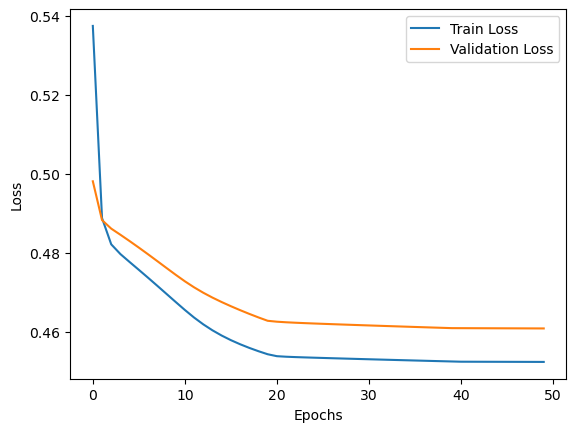

150/150 [==============================] - 2s 6ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 11s 15ms/step - loss: 0.5409 - accuracy: 0.7730 - val_loss: 0.4978 - val_accuracy: 0.7802 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4919 - accuracy: 0.7817 - val_loss: 0.4828 - val_accuracy: 0.7912 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4842 - accuracy: 0.7924 - val_loss: 0.4781 - val_accuracy: 0.7952 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4815 - accuracy: 0.7962 - val_loss: 0.4756 - val_accuracy: 0.7958 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4794 - accuracy: 0.7972 - val_loss: 0.4734 - val_accuracy: 0.7971 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 13ms/step - lo

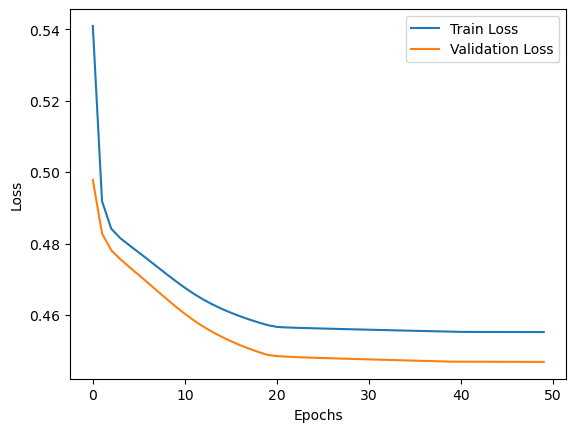

150/150 [==============================] - 3s 8ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 13s 17ms/step - loss: 0.5330 - accuracy: 0.7754 - val_loss: 0.4928 - val_accuracy: 0.7802 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 9s 15ms/step - loss: 0.4877 - accuracy: 0.7866 - val_loss: 0.4832 - val_accuracy: 0.7962 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4829 - accuracy: 0.7933 - val_loss: 0.4804 - val_accuracy: 0.7996 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4809 - accuracy: 0.7949 - val_loss: 0.4785 - val_accuracy: 0.8017 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4791 - accuracy: 0.7956 - val_loss: 0.4767 - val_accuracy: 0.8019 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 9s 15ms/step - lo

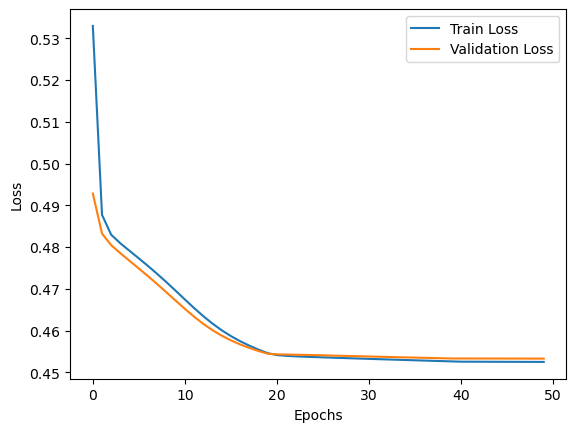

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 11s 15ms/step - loss: 0.5409 - accuracy: 0.7719 - val_loss: 0.4990 - val_accuracy: 0.7798 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4917 - accuracy: 0.7824 - val_loss: 0.4861 - val_accuracy: 0.7942 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4846 - accuracy: 0.7928 - val_loss: 0.4825 - val_accuracy: 0.7979 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4821 - accuracy: 0.7955 - val_loss: 0.4803 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 13ms/step - loss: 0.4801 - accuracy: 0.7961 - val_loss: 0.4784 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 14ms/step - lo

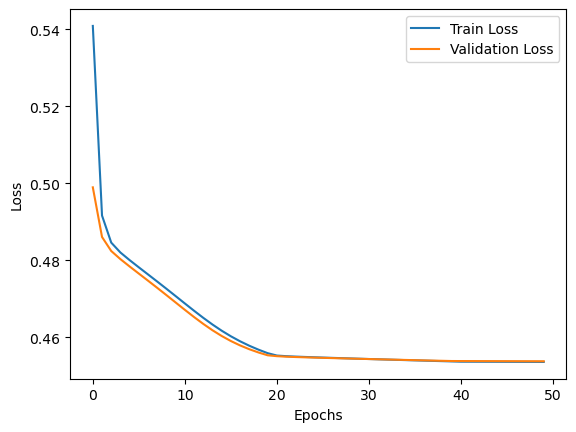

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 12s 15ms/step - loss: 0.5392 - accuracy: 0.7770 - val_loss: 0.4972 - val_accuracy: 0.7798 - lr: 0.0100
Epoch 2/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4891 - accuracy: 0.7831 - val_loss: 0.4859 - val_accuracy: 0.7904 - lr: 0.0100
Epoch 3/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4830 - accuracy: 0.7935 - val_loss: 0.4829 - val_accuracy: 0.7940 - lr: 0.0100
Epoch 4/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4808 - accuracy: 0.7957 - val_loss: 0.4810 - val_accuracy: 0.7956 - lr: 0.0100
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 0.4789 - accuracy: 0.7969 - val_loss: 0.4792 - val_accuracy: 0.7977 - lr: 0.0100
Epoch 6/50
600/600 [==============================] - 8s 13ms/step - lo

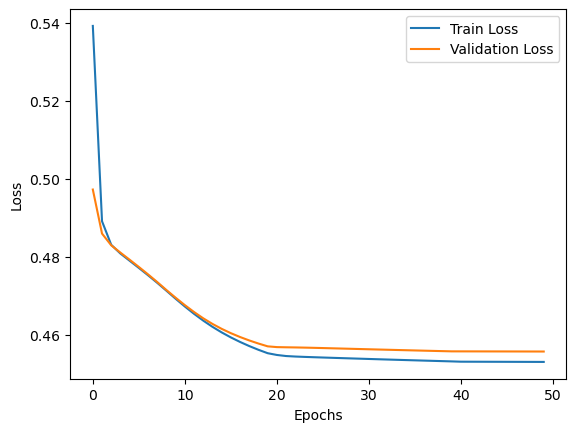

150/150 [==============================] - 2s 7ms/step
Configuration: Learning Rate=0.01, Optimizer=SGD,Batch Size =32
Accuracy: 0.805 (+/- 0.004)
Precision: 0.631 (+/- 0.018)
Recall: 0.281 (+/- 0.014)
F1 score: 0.389 (+/- 0.017)
AUC score: 0.617 (+/- 0.008)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.01, <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x0000029B5713C430>, 32)
Best F1 Score: 0.3887864419870626


In [43]:
initial_learning_rates = [0.01]
optimizers = ['sgd']
batches = [32]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                # Perform preprocessing steps on X_train_dl
                X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
                X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
                
                temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
                static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                
                X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
                X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
                X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
                X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

                PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
                BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
                PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
                
                PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
                
                PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
                
                # Stack temporal features
                stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
                stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
                y_train_dl = y_train_dl.to_numpy()
                y_test_dl = y_test_dl.to_numpy()
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(LSTM(64, return_sequences=True, input_shape=(num_time_steps, num_features)))
                model.add(LSTM(64, return_sequences=True))
                model.add(Flatten())
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5136 - accuracy: 0.7673 - val_loss: 0.4754 - val_accuracy: 0.7942 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4613 - accuracy: 0.8024 - val_loss: 0.4633 - val_accuracy: 0.7967 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4534 - accuracy: 0.8058 - val_loss: 0.4585 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4493 - accuracy: 0.8078 - val_loss: 0.4552 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8085 - val_loss: 0.4529 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4445 - accuracy: 0.8098 - val_loss: 

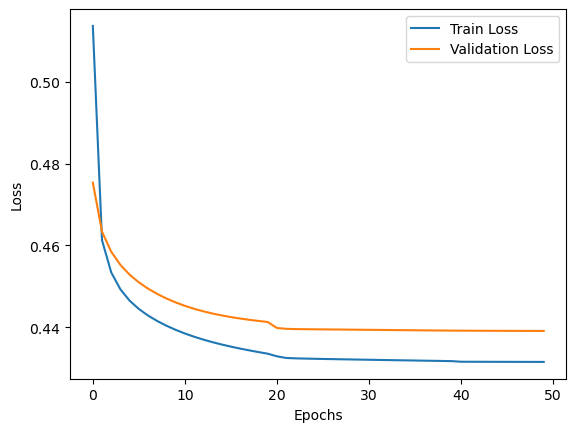

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5010 - accuracy: 0.7759 - val_loss: 0.4626 - val_accuracy: 0.8029 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4604 - accuracy: 0.8017 - val_loss: 0.4536 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4541 - accuracy: 0.8045 - val_loss: 0.4485 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4501 - accuracy: 0.8051 - val_loss: 0.4451 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4472 - accuracy: 0.8071 - val_loss: 0.4426 - val_accuracy: 0.8110 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

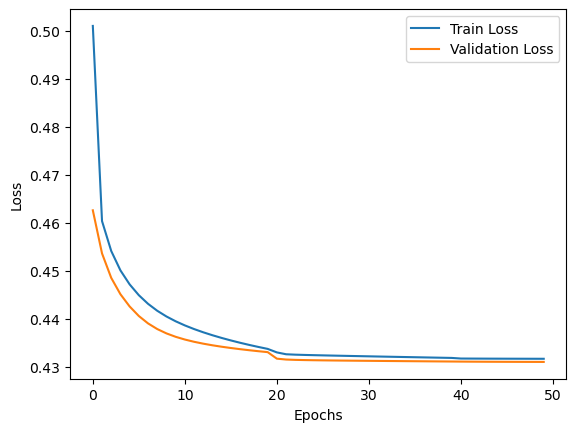

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 4s 9ms/step - loss: 0.5196 - accuracy: 0.7586 - val_loss: 0.4650 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4595 - accuracy: 0.8012 - val_loss: 0.4565 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4526 - accuracy: 0.8047 - val_loss: 0.4532 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4484 - accuracy: 0.8072 - val_loss: 0.4512 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4452 - accuracy: 0.8091 - val_loss: 0.4498 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

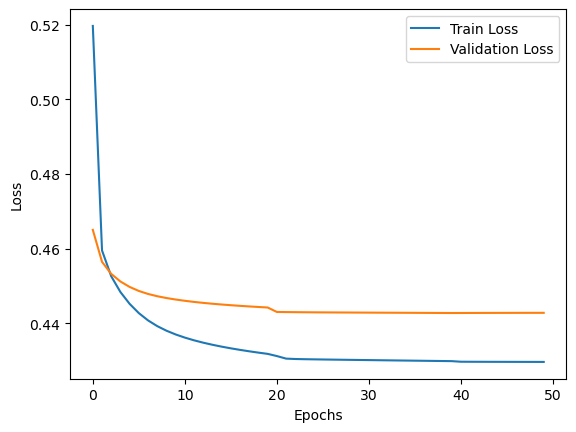

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 5s 9ms/step - loss: 0.5262 - accuracy: 0.7555 - val_loss: 0.4709 - val_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4644 - accuracy: 0.8021 - val_loss: 0.4592 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4567 - accuracy: 0.8038 - val_loss: 0.4536 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4520 - accuracy: 0.8051 - val_loss: 0.4497 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4486 - accuracy: 0.8059 - val_loss: 0.4469 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 3s 

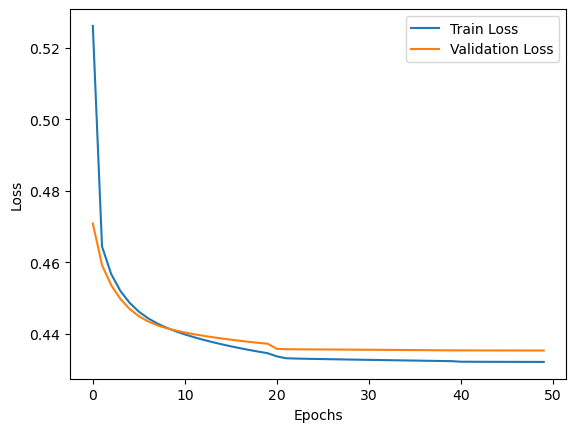

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 5s 10ms/step - loss: 0.5040 - accuracy: 0.7718 - val_loss: 0.4599 - val_accuracy: 0.7985 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4589 - accuracy: 0.8037 - val_loss: 0.4519 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4525 - accuracy: 0.8066 - val_loss: 0.4480 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4486 - accuracy: 0.8086 - val_loss: 0.4456 - val_accuracy: 0.8071 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 8ms/step - loss: 0.4459 - accuracy: 0.8098 - val_loss: 0.4440 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s

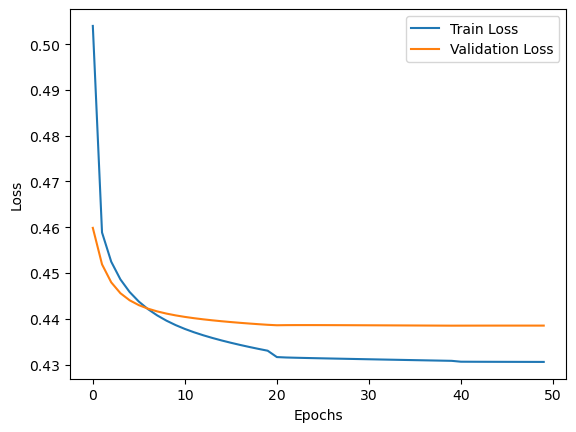

150/150 [==============================] - 1s 4ms/step
Accuracy: 0.818 (+/- 0.002)
Precision: 0.654 (+/- 0.006)
Recall: 0.371 (+/- 0.012)
F1 score: 0.474 (+/- 0.010)
AUC score: 0.658 (+/- 0.005)


In [142]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    # Perform preprocessing steps on X_train_dl
    X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
    X_test_dl_preprocessed = enc_dl.transform(X_test_dl)

    # Apply SMOTE and undersampling to address class imbalance
    # over = SMOTE(sampling_strategy=0.4, random_state=42)
    # under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    # steps = [('o',over),('u',under)]
    # pipe = Pipeline(steps=steps)
        
    # X_train_dl_resampled, y_train_dl_resampled =  pipe.fit_resample(X_train_dl_preprocessed, y_train_dl)
    
    # round_cols = ['SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6'] + X_train_dl_resampled.filter(like='EDUCATION').columns.to_list() + X_train_dl_resampled.filter(like='MARRIAGE').columns.to_list() 
    # for col in round_cols:
    #     X_train_dl_resampled[col] = X_train_dl_resampled[col].round()
    
    # Split training data into static and temporal features
    # Perform any necessary reshaping or transformations
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
    X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
    X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
    X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
    X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
    stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
    y_train_dl = y_train_dl.to_numpy()
    y_test_dl = y_test_dl.to_numpy()

    # Build and compile LSTM model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the LSTM model
    model = Sequential()
    model.add(SimpleRNN(32,return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(SimpleRNN(32,return_sequences=True))
    model.add(SimpleRNN(32,return_sequences=True))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.0001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 50

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    batch_size = 64
    
    # Train the model
    history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

In [143]:
model.summary()

Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_251 (SimpleRNN)  (None, 6, 32)             1152      
                                                                 
 simple_rnn_252 (SimpleRNN)  (None, 6, 32)             2080      
                                                                 
 simple_rnn_253 (SimpleRNN)  (None, 6, 32)             2080      
                                                                 
 flatten_182 (Flatten)       (None, 192)               0         
                                                                 
 dense_182 (Dense)           (None, 1)                 193       
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


### RNN  Tuning Architectures

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 6s 12ms/step - loss: 0.5343 - accuracy: 0.7486 - val_loss: 0.4733 - val_accuracy: 0.7885 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4632 - accuracy: 0.8007 - val_loss: 0.4606 - val_accuracy: 0.7965 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4538 - accuracy: 0.8054 - val_loss: 0.4552 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4486 - accuracy: 0.8079 - val_loss: 0.4517 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4451 - accuracy: 0.8093 - val_loss: 0.4493 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4427 - accuracy: 0.8105 - val_

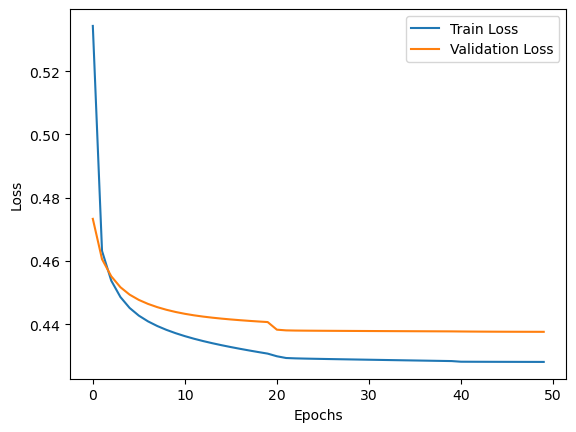

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 6s 13ms/step - loss: 0.4962 - accuracy: 0.7771 - val_loss: 0.4582 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4565 - accuracy: 0.8049 - val_loss: 0.4507 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4511 - accuracy: 0.8061 - val_loss: 0.4474 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4482 - accuracy: 0.8076 - val_loss: 0.4454 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4461 - accuracy: 0.8081 - val_loss: 0.4439 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

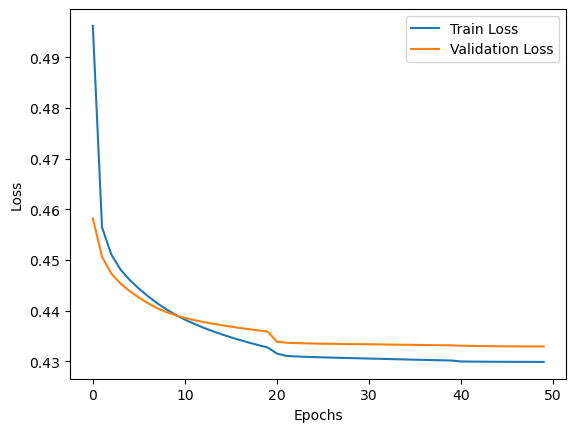

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 6s 12ms/step - loss: 0.5187 - accuracy: 0.7583 - val_loss: 0.4690 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4614 - accuracy: 0.8015 - val_loss: 0.4570 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4507 - accuracy: 0.8051 - val_loss: 0.4518 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4449 - accuracy: 0.8086 - val_loss: 0.4492 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4416 - accuracy: 0.8111 - val_loss: 0.4478 - val_accuracy: 0.8140 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

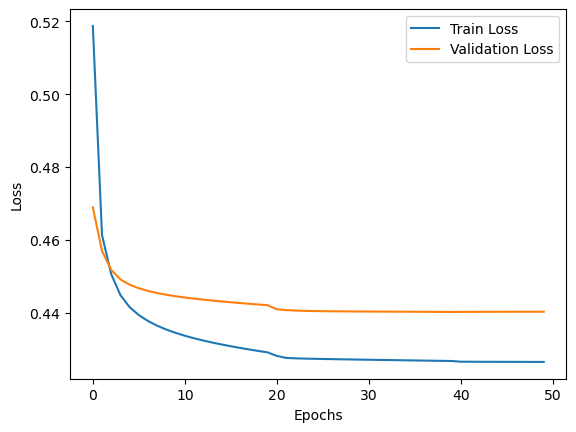

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 6s 13ms/step - loss: 0.5017 - accuracy: 0.7764 - val_loss: 0.4638 - val_accuracy: 0.8027 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4590 - accuracy: 0.8038 - val_loss: 0.4556 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4525 - accuracy: 0.8063 - val_loss: 0.4508 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4484 - accuracy: 0.8073 - val_loss: 0.4474 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4456 - accuracy: 0.8091 - val_loss: 0.4450 - val_accuracy: 0.8108 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

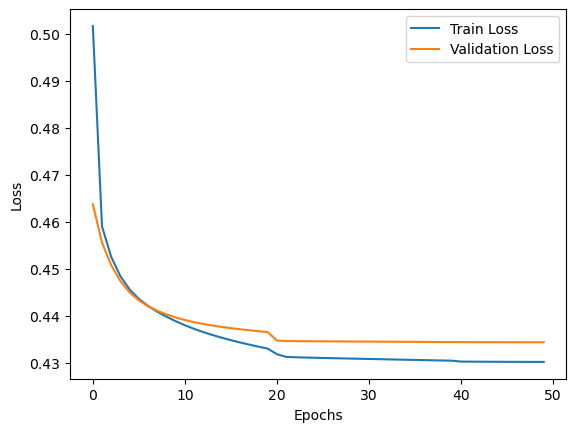

150/150 [==============================] - 2s 7ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 7s 14ms/step - loss: 0.5050 - accuracy: 0.7674 - val_loss: 0.4605 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4553 - accuracy: 0.8051 - val_loss: 0.4520 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4488 - accuracy: 0.8069 - val_loss: 0.4481 - val_accuracy: 0.8073 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4450 - accuracy: 0.8093 - val_loss: 0.4456 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4422 - accuracy: 0.8101 - val_loss: 0.4439 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

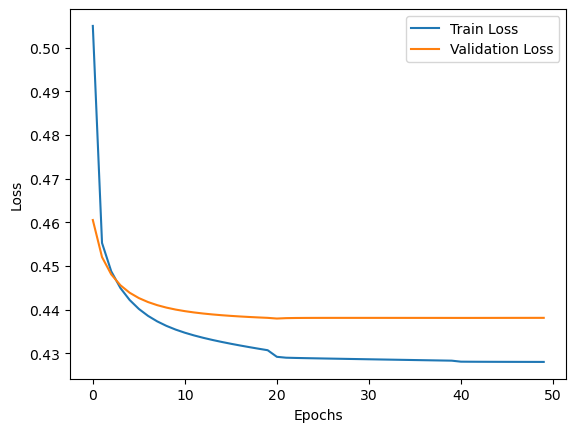

150/150 [==============================] - 1s 5ms/step
Architecture: {'hidden_layers': 4, 'units_per_layer': 32}
Accuracy: 0.818 (+/- 0.002)
Precision: 0.658 (+/- 0.006)
Recall: 0.368 (+/- 0.010)
F1 score: 0.472 (+/- 0.009)
AUC score: 0.657 (+/- 0.004)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 10s 26ms/step - loss: 0.4817 - accuracy: 0.7853 - val_loss: 0.4559 - val_accuracy: 0.8037 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4494 - accuracy: 0.8079 - val_loss: 0.4497 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4449 - accuracy: 0.8099 - val_loss: 0.4471 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 7s 23ms/step - loss: 0.4424 - accuracy: 0.8117 - val_loss: 0.4456 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/50
3

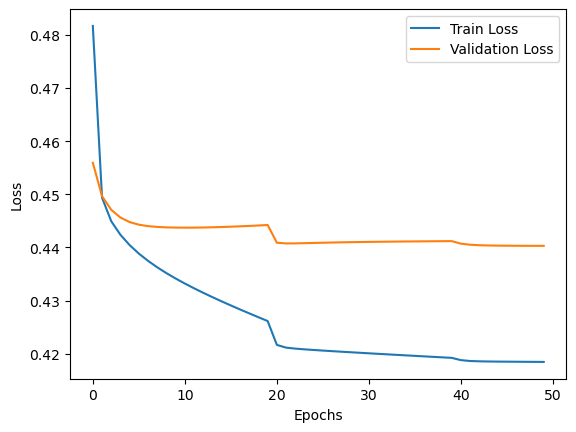

150/150 [==============================] - 1s 8ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 8s 22ms/step - loss: 0.4768 - accuracy: 0.7909 - val_loss: 0.4464 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4500 - accuracy: 0.8075 - val_loss: 0.4408 - val_accuracy: 0.8144 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4456 - accuracy: 0.8112 - val_loss: 0.4389 - val_accuracy: 0.8146 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4430 - accuracy: 0.8120 - val_loss: 0.4379 - val_accuracy: 0.8158 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4411 - accuracy: 0.8139 - val_loss: 0.4373 - val_accuracy: 0.8167 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

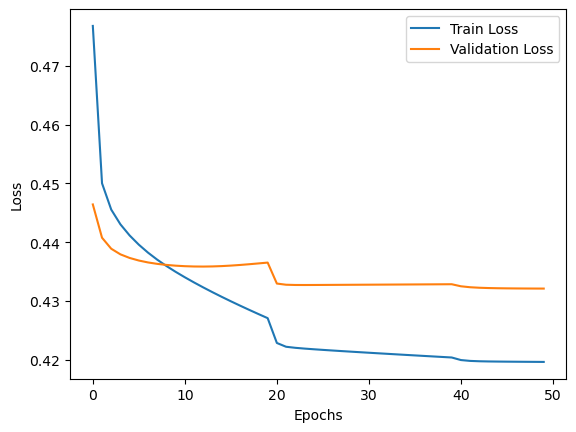

150/150 [==============================] - 1s 8ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 8s 20ms/step - loss: 0.4757 - accuracy: 0.7911 - val_loss: 0.4523 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4485 - accuracy: 0.8076 - val_loss: 0.4480 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4436 - accuracy: 0.8115 - val_loss: 0.4464 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4409 - accuracy: 0.8132 - val_loss: 0.4455 - val_accuracy: 0.8150 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4389 - accuracy: 0.8144 - val_loss: 0.4449 - val_accuracy: 0.8171 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

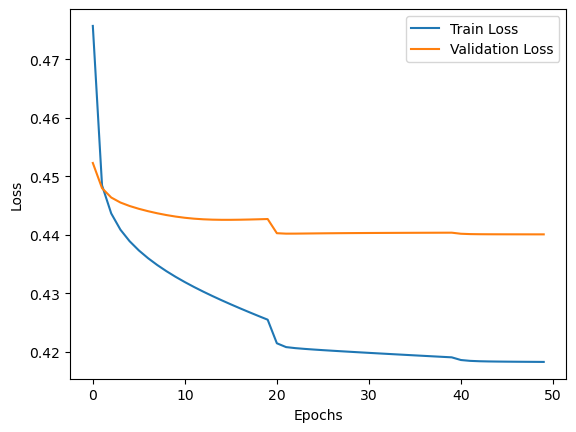

150/150 [==============================] - 1s 6ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 10s 25ms/step - loss: 0.4751 - accuracy: 0.7935 - val_loss: 0.4527 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4514 - accuracy: 0.8073 - val_loss: 0.4447 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4469 - accuracy: 0.8104 - val_loss: 0.4409 - val_accuracy: 0.8163 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4441 - accuracy: 0.8111 - val_loss: 0.4389 - val_accuracy: 0.8150 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 7s 22ms/step - loss: 0.4420 - accuracy: 0.8124 - val_loss: 0.4378 - val_accuracy: 0.8173 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================]

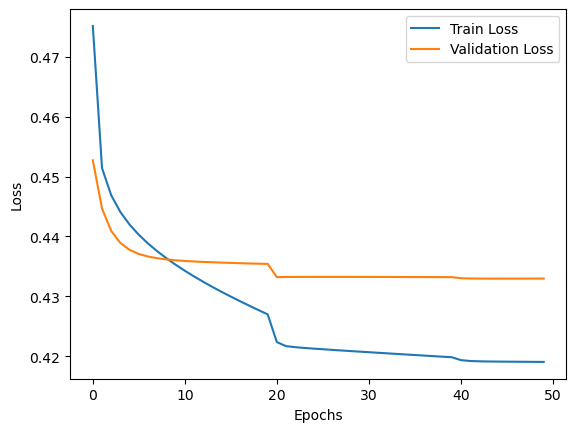

150/150 [==============================] - 1s 6ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 8s 22ms/step - loss: 0.4749 - accuracy: 0.7943 - val_loss: 0.4504 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4491 - accuracy: 0.8092 - val_loss: 0.4465 - val_accuracy: 0.8087 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4446 - accuracy: 0.8119 - val_loss: 0.4452 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4421 - accuracy: 0.8130 - val_loss: 0.4444 - val_accuracy: 0.8129 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4403 - accuracy: 0.8152 - val_loss: 0.4438 - val_accuracy: 0.8154 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

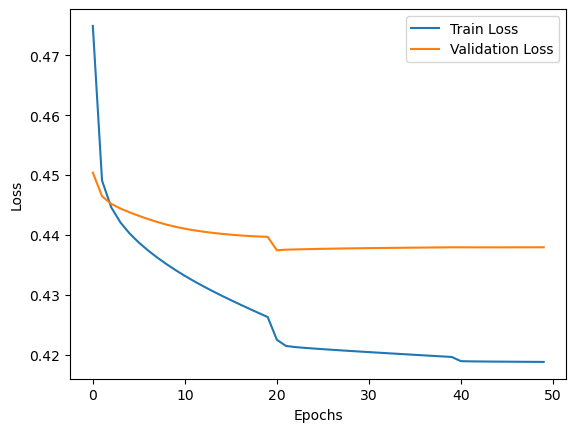

150/150 [==============================] - 2s 8ms/step
Architecture: {'hidden_layers': 3, 'units_per_layer': 128}
Accuracy: 0.817 (+/- 0.003)
Precision: 0.651 (+/- 0.012)
Recall: 0.372 (+/- 0.011)
F1 score: 0.473 (+/- 0.011)
AUC score: 0.658 (+/- 0.005)

Best Architecture:
{'hidden_layers': 3, 'units_per_layer': 128}
Best F1 Score: 0.47306751109399486


In [136]:
architectures = [
    {'hidden_layers': 4, 'units_per_layer': 32},
    {'hidden_layers': 3, 'units_per_layer': 128}    
]

best_architecture = None
best_f1_score = 0.0

for architecture in architectures:
    fold_no = 1
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    AUC_scores = []
    
    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

        # Perform preprocessing steps on X_train_dl
        X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
        X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
        
        temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
        'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
        static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
        static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
        
        X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
        X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
        X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
        X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

        PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
        BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
        PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
        
        PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
        BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
        PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
        
        PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
        BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
        PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
        
        # Stack temporal features
        stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
        stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
        y_train_dl = y_train_dl.to_numpy()
        y_test_dl = y_test_dl.to_numpy()
        
        # Build and compile LSTM model
        num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
        
        # Define the LSTM model
        model = Sequential()
        model.add(SimpleRNN(architecture['units_per_layer'], return_sequences=True, input_shape=(num_time_steps, num_features)))
        for _ in range(1, architecture['hidden_layers']):
            model.add(SimpleRNN(architecture['units_per_layer'], return_sequences=True))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        initial_learning_rate = 0.0001  # Initial learning rate
        decay_rate = 0.1  # Decay rate
        decay_steps = 20  # Decay steps (number of steps before applying decay)
        epochs = 50

        def learning_rate_scheduler(epoch):
            return initial_learning_rate * decay_rate ** (epoch // decay_steps)
        
        
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
        
        lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
        
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no}')
    
        # Train the model
        batch_size = 64
        
        # Train the model
        history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
        
        # Plot the loss on train vs validate tests
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        y_pred_probs = model.predict(stacked_test)
        y_pred = (y_pred_probs>=0.5).astype(int)    
        
        accuracy =  accuracy_score(y_test_dl,y_pred)
        precision = precision_score(y_test_dl,y_pred)
        recall = recall_score(y_test_dl,y_pred)
        f1 =  f1_score(y_test_dl,y_pred)
        AUC = roc_auc_score(y_test_dl,y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        AUC_scores.append(AUC)
        
        fold_no = fold_no + 1
        
    # Calculate the average F1 score for the current architecture
    average_f1_score = np.mean(f1_scores)

    # Print the scores for the current architecture
    print(f"Architecture: {architecture}")
    print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
    print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
    print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
    print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
    print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
    print()
    
    # Check if the current architecture has a higher average F1 score
    # If so, update the best architecture and best F1 score
    if average_f1_score > best_f1_score:
        best_architecture = architecture
        best_f1_score = average_f1_score


# Print the best architecture
print("Best Architecture:")
print(best_architecture)
print("Best F1 Score:", best_f1_score)

In [146]:
cs = [64]
for i in cs:
    print(i)

64


### RNN Tuning Optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
600/600 [==============================] - 10s 12ms/step - loss: 0.5038 - accuracy: 0.7695 - val_loss: 0.4612 - val_accuracy: 0.7960 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 7s 12ms/step - loss: 0.4527 - accuracy: 0.8069 - val_loss: 0.4532 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 7s 12ms/step - loss: 0.4467 - accuracy: 0.8095 - val_loss: 0.4490 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4432 - accuracy: 0.8113 - val_loss: 0.4465 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 11ms/step - loss: 0.4409 - accuracy: 0.8120 - val_loss: 0.4449 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4393 - accuracy: 0.8129 - val

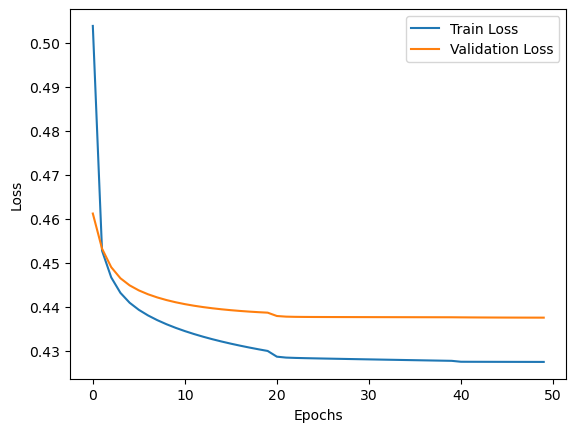

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
600/600 [==============================] - 11s 14ms/step - loss: 0.4881 - accuracy: 0.7830 - val_loss: 0.4539 - val_accuracy: 0.8062 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4547 - accuracy: 0.8041 - val_loss: 0.4463 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4491 - accuracy: 0.8077 - val_loss: 0.4426 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4459 - accuracy: 0.8099 - val_loss: 0.4404 - val_accuracy: 0.8140 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4437 - accuracy: 0.8107 - val_loss: 0.4389 - val_accuracy: 0.8142 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================]

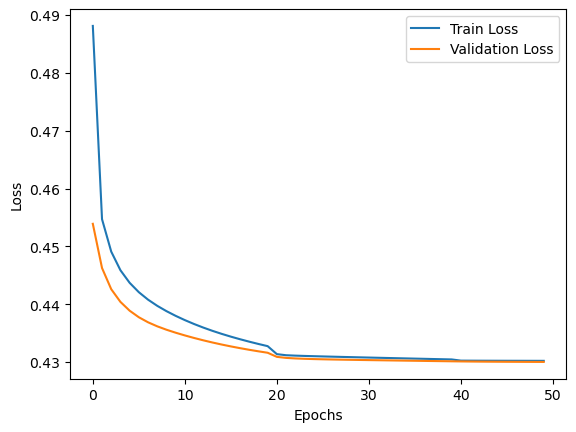

150/150 [==============================] - 1s 5ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
600/600 [==============================] - 9s 11ms/step - loss: 0.4871 - accuracy: 0.7822 - val_loss: 0.4575 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4504 - accuracy: 0.8059 - val_loss: 0.4505 - val_accuracy: 0.8104 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4441 - accuracy: 0.8095 - val_loss: 0.4480 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4408 - accuracy: 0.8111 - val_loss: 0.4467 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4388 - accuracy: 0.8126 - val_loss: 0.4457 - val_accuracy: 0.8135 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] 

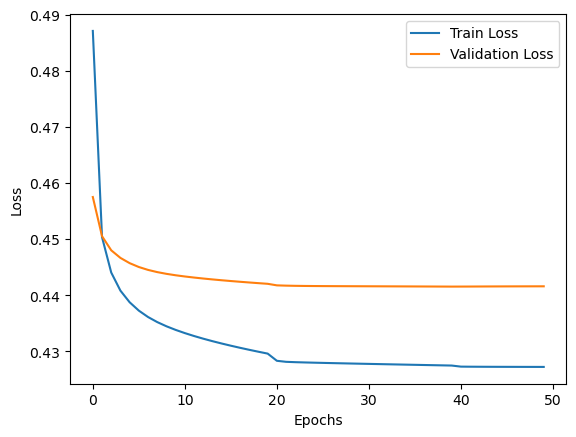

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
600/600 [==============================] - 8s 9ms/step - loss: 0.4989 - accuracy: 0.7707 - val_loss: 0.4586 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4563 - accuracy: 0.8028 - val_loss: 0.4507 - val_accuracy: 0.8081 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4505 - accuracy: 0.8067 - val_loss: 0.4465 - val_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4470 - accuracy: 0.8094 - val_loss: 0.4440 - val_accuracy: 0.8098 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 5s 8ms/step - loss: 0.4446 - accuracy: 0.8101 - val_loss: 0.4421 - val_accuracy: 0.8117 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 5s 

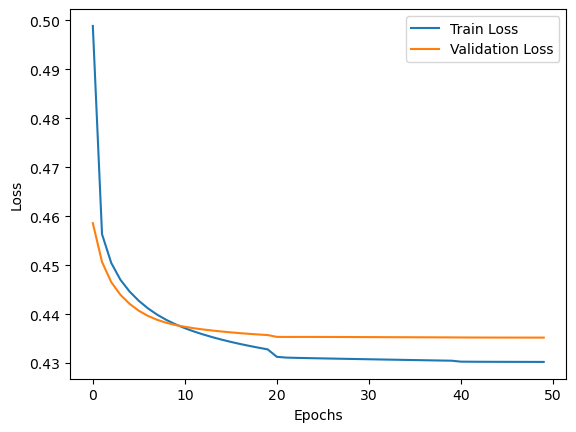

150/150 [==============================] - 1s 4ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
600/600 [==============================] - 10s 12ms/step - loss: 0.4947 - accuracy: 0.7794 - val_loss: 0.4587 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.4543 - accuracy: 0.8037 - val_loss: 0.4508 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 3/50
600/600 [==============================] - 5s 9ms/step - loss: 0.4479 - accuracy: 0.8085 - val_loss: 0.4472 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 4/50
600/600 [==============================] - 6s 9ms/step - loss: 0.4443 - accuracy: 0.8102 - val_loss: 0.4454 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 5/50
600/600 [==============================] - 6s 9ms/step - loss: 0.4420 - accuracy: 0.8116 - val_loss: 0.4443 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 6/50
600/600 [==============================] - 

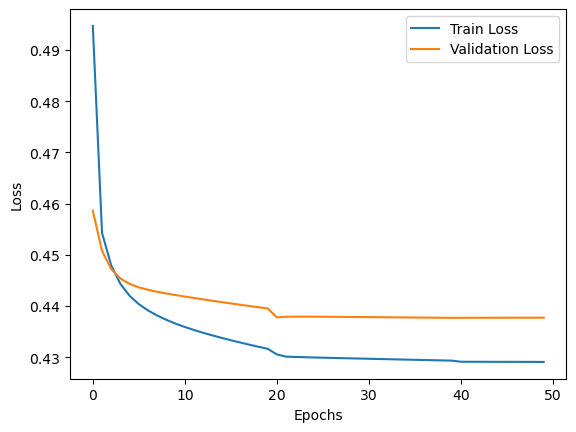

150/150 [==============================] - 1s 5ms/step
Configuration: Learning Rate=0.0001, Optimizer=RMSprop,Batch Size =32
Accuracy: 0.818 (+/- 0.002)
Precision: 0.650 (+/- 0.010)
Recall: 0.380 (+/- 0.012)
F1 score: 0.480 (+/- 0.010)
AUC score: 0.661 (+/- 0.005)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.0001, <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x000002174D159C60>, 32)
Best F1 Score: 0.4795733841355311


In [38]:
initial_learning_rates = [0.0001]
optimizers = ['rmsprop']
batches = [32]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                # Perform preprocessing steps on X_train_dl
                X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
                X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
                
                temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
                static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                
                X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
                X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
                X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
                X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

                PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
                BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
                PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
                
                PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
                
                PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
                
                # Stack temporal features
                stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
                stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
                y_train_dl = y_train_dl.to_numpy()
                y_test_dl = y_test_dl.to_numpy()
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(SimpleRNN(32, return_sequences=True, input_shape=(num_time_steps, num_features)))
                model.add(SimpleRNN(32, return_sequences=True))
                model.add(SimpleRNN(32, return_sequences=True))
                model.add(Flatten())
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

### CNN 

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
150/150 [==============================] - 10s 61ms/step - loss: 0.4916 - accuracy: 0.7931 - val_loss: 0.4617 - val_accuracy: 0.8071 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 9s 57ms/step - loss: 0.4456 - accuracy: 0.8094 - val_loss: 0.4553 - val_accuracy: 0.8112 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 8s 53ms/step - loss: 0.4431 - accuracy: 0.8101 - val_loss: 0.4543 - val_accuracy: 0.8115 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 49ms/step - loss: 0.4398 - accuracy: 0.8148 - val_loss: 0.4530 - val_accuracy: 0.8158 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 8s 51ms/step - loss: 0.4375 - accuracy: 0.8165 - val_loss: 0.4537 - val_accuracy: 0.8115 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 9s 61ms/step - loss: 0.4364 - accuracy: 0.8188 - val_loss: 0.4500 - val_

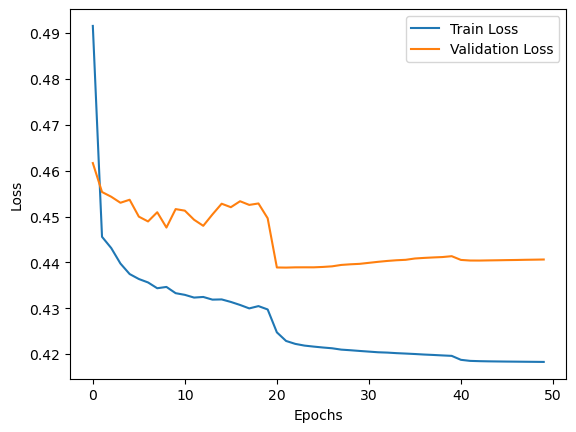

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
150/150 [==============================] - 8s 47ms/step - loss: 0.4928 - accuracy: 0.7912 - val_loss: 0.4356 - val_accuracy: 0.8173 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4488 - accuracy: 0.8159 - val_loss: 0.4315 - val_accuracy: 0.8208 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4449 - accuracy: 0.8168 - val_loss: 0.4350 - val_accuracy: 0.8213 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 47ms/step - loss: 0.4429 - accuracy: 0.8170 - val_loss: 0.4372 - val_accuracy: 0.8225 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 48ms/step - loss: 0.4409 - accuracy: 0.8177 - val_loss: 0.4353 - val_accuracy: 0.8242 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 7s 47ms/step - los

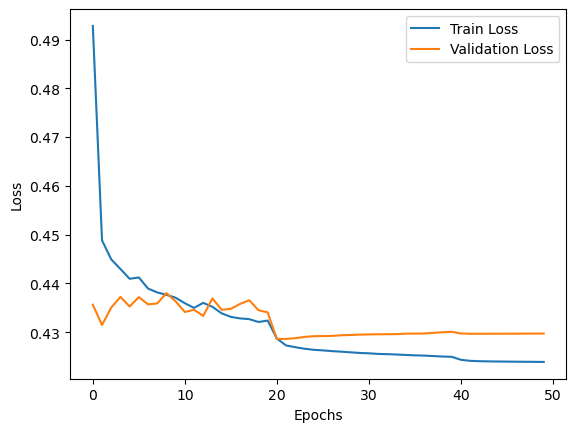

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
150/150 [==============================] - 8s 49ms/step - loss: 0.4747 - accuracy: 0.8008 - val_loss: 0.4508 - val_accuracy: 0.8119 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 5s 33ms/step - loss: 0.4473 - accuracy: 0.8118 - val_loss: 0.4548 - val_accuracy: 0.8102 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 6s 38ms/step - loss: 0.4416 - accuracy: 0.8148 - val_loss: 0.4472 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 6s 43ms/step - loss: 0.4397 - accuracy: 0.8178 - val_loss: 0.4458 - val_accuracy: 0.8175 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 6s 43ms/step - loss: 0.4373 - accuracy: 0.8177 - val_loss: 0.4446 - val_accuracy: 0.8158 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 6s 43ms/step - los

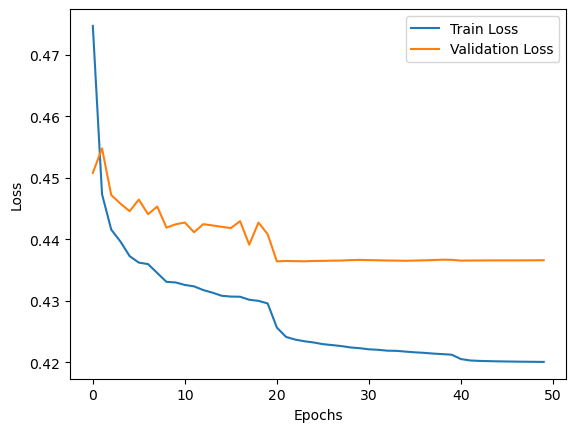

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
150/150 [==============================] - 8s 46ms/step - loss: 0.4831 - accuracy: 0.8000 - val_loss: 0.4456 - val_accuracy: 0.8123 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 47ms/step - loss: 0.4482 - accuracy: 0.8098 - val_loss: 0.4462 - val_accuracy: 0.8119 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 45ms/step - loss: 0.4435 - accuracy: 0.8135 - val_loss: 0.4451 - val_accuracy: 0.8106 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 49ms/step - loss: 0.4410 - accuracy: 0.8168 - val_loss: 0.4454 - val_accuracy: 0.8123 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 44ms/step - loss: 0.4395 - accuracy: 0.8170 - val_loss: 0.4437 - val_accuracy: 0.8121 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 6s 42ms/step - los

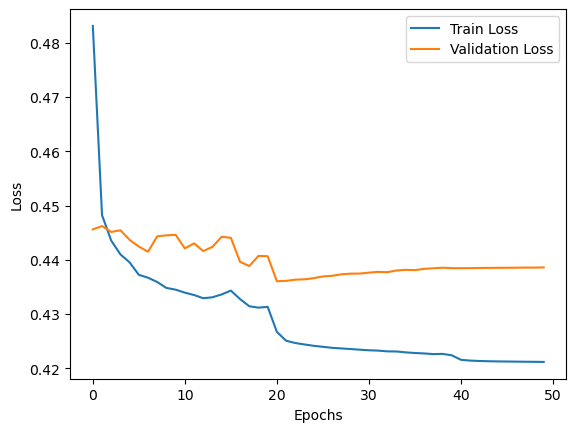

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
150/150 [==============================] - 8s 51ms/step - loss: 0.4697 - accuracy: 0.8056 - val_loss: 0.4416 - val_accuracy: 0.8131 - lr: 0.0100
Epoch 2/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4451 - accuracy: 0.8170 - val_loss: 0.4480 - val_accuracy: 0.8165 - lr: 0.0100
Epoch 3/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4413 - accuracy: 0.8178 - val_loss: 0.4491 - val_accuracy: 0.8163 - lr: 0.0100
Epoch 4/50
150/150 [==============================] - 7s 46ms/step - loss: 0.4396 - accuracy: 0.8183 - val_loss: 0.4465 - val_accuracy: 0.8165 - lr: 0.0100
Epoch 5/50
150/150 [==============================] - 7s 45ms/step - loss: 0.4385 - accuracy: 0.8190 - val_loss: 0.4501 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 6/50
150/150 [==============================] - 7s 43ms/step - los

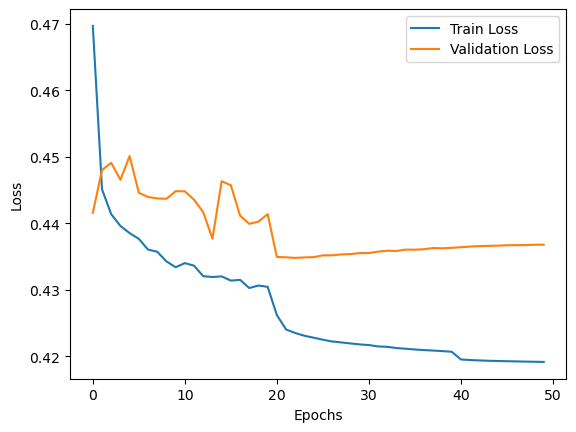

150/150 [==============================] - 0s 2ms/step
Accuracy: 0.818 (+/- 0.002)
Precision: 0.662 (+/- 0.019)
Recall: 0.364 (+/- 0.028)
F1 score: 0.468 (+/- 0.017)
AUC score: 0.655 (+/- 0.009)


In [94]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    # Perform preprocessing steps on X_train_dl
    X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
    X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
    
    # Split training data into static and temporal features
    # Perform any necessary reshaping or transformations
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
    X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
    X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
    X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
    X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
    stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
    y_train_dl = y_train_dl.to_numpy()
    y_test_dl = y_test_dl.to_numpy()


    # Build and compile CNN model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=8, kernel_size=6, padding='same', activation='relu', input_shape=(num_time_steps, num_features)))
    cnn_model.add(MaxPooling1D(pool_size=3))
    cnn_model.add(Conv1D(filters=16, kernel_size=4, padding='same', activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.01  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 50

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    
    batch_size = 128
    
    # Train the model
    history = cnn_model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = cnn_model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

In [84]:
cnn_model.summary()

Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_415 (Conv1D)         (None, 6, 256)            3328      
                                                                 
 flatten_311 (Flatten)       (None, 1536)              0         
                                                                 
 dense_312 (Dense)           (None, 1)                 1537      
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### CNN Tuning Architectures

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 8s 26ms/step - loss: 0.5703 - accuracy: 0.7821 - val_loss: 0.5402 - val_accuracy: 0.7948 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 4s 12ms/step - loss: 0.5194 - accuracy: 0.8032 - val_loss: 0.5107 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 14ms/step - loss: 0.4952 - accuracy: 0.8067 - val_loss: 0.4927 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4787 - accuracy: 0.8082 - val_loss: 0.4793 - val_accuracy: 0.8023 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 6s 20ms/step - loss: 0.4666 - accuracy: 0.8095 - val_loss: 0.4697 - val_accuracy: 0.8037 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 6s 21ms/step - loss: 0.4579 - accuracy: 0.8107 - val_

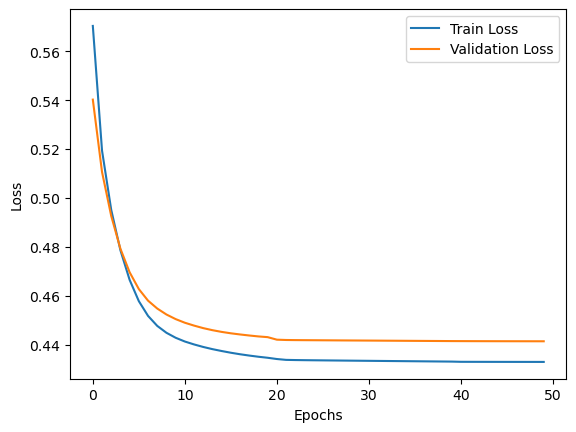

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 3s 8ms/step - loss: 0.6052 - accuracy: 0.7269 - val_loss: 0.5407 - val_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 8ms/step - loss: 0.5289 - accuracy: 0.8007 - val_loss: 0.5128 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 13ms/step - loss: 0.5094 - accuracy: 0.8043 - val_loss: 0.4944 - val_accuracy: 0.8092 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 4s 14ms/step - loss: 0.4931 - accuracy: 0.8060 - val_loss: 0.4780 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 4s 13ms/step - loss: 0.4786 - accuracy: 0.8084 - val_loss: 0.4643 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 

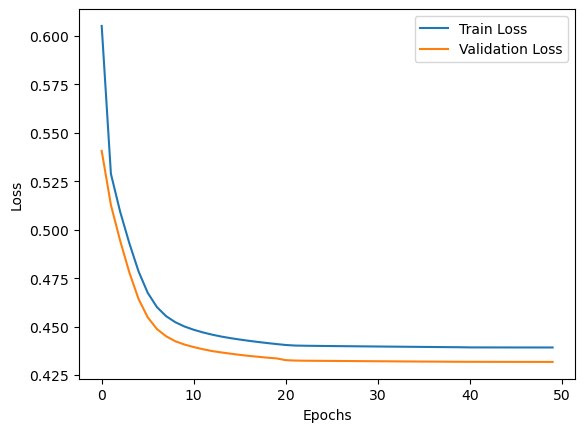

150/150 [==============================] - 0s 1ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 7s 21ms/step - loss: 0.6332 - accuracy: 0.6796 - val_loss: 0.5699 - val_accuracy: 0.7827 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 8s 27ms/step - loss: 0.5470 - accuracy: 0.7948 - val_loss: 0.5287 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 8s 27ms/step - loss: 0.5162 - accuracy: 0.8031 - val_loss: 0.5063 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 12ms/step - loss: 0.4978 - accuracy: 0.8047 - val_loss: 0.4917 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 4s 12ms/step - loss: 0.4845 - accuracy: 0.8066 - val_loss: 0.4804 - val_accuracy: 0.8110 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

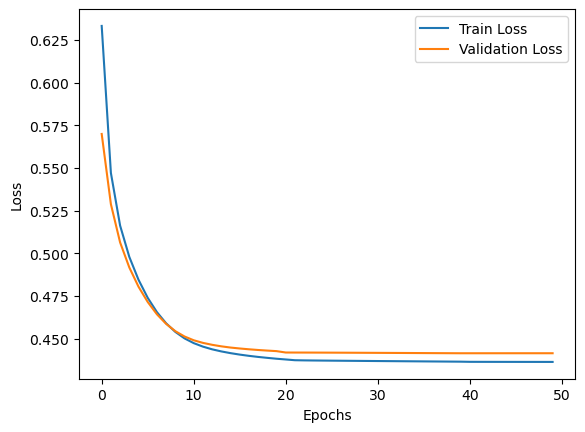

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 4s 10ms/step - loss: 0.6237 - accuracy: 0.7149 - val_loss: 0.5545 - val_accuracy: 0.7783 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 24ms/step - loss: 0.5375 - accuracy: 0.7794 - val_loss: 0.5251 - val_accuracy: 0.7798 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 19ms/step - loss: 0.5125 - accuracy: 0.7916 - val_loss: 0.5038 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 19ms/step - loss: 0.4924 - accuracy: 0.8055 - val_loss: 0.4864 - val_accuracy: 0.8131 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 5s 18ms/step - loss: 0.4772 - accuracy: 0.8084 - val_loss: 0.4734 - val_accuracy: 0.8146 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] 

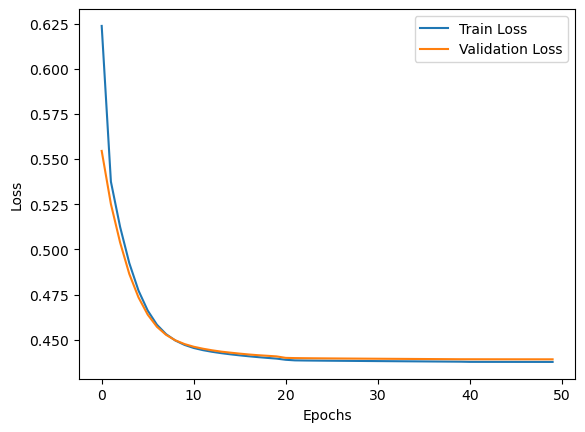

150/150 [==============================] - 0s 1ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 3s 8ms/step - loss: 0.5889 - accuracy: 0.7746 - val_loss: 0.5488 - val_accuracy: 0.7983 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.5259 - accuracy: 0.8026 - val_loss: 0.5214 - val_accuracy: 0.8010 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 6s 21ms/step - loss: 0.5048 - accuracy: 0.8064 - val_loss: 0.5044 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 6s 22ms/step - loss: 0.4894 - accuracy: 0.8093 - val_loss: 0.4897 - val_accuracy: 0.8077 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 7s 23ms/step - loss: 0.4769 - accuracy: 0.8107 - val_loss: 0.4785 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] -

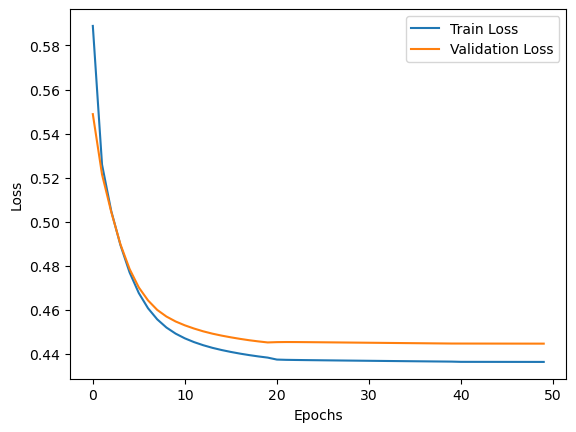

150/150 [==============================] - 0s 2ms/step
Configuration: filters=16, kernel size=4
Accuracy: 0.820 (+/- 0.002)
Precision: 0.675 (+/- 0.013)
Recall: 0.357 (+/- 0.012)
F1 score: 0.467 (+/- 0.009)
AUC score: 0.654 (+/- 0.005)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 4s 11ms/step - loss: 0.7912 - accuracy: 0.4162 - val_loss: 0.6412 - val_accuracy: 0.7575 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 4s 15ms/step - loss: 0.5888 - accuracy: 0.7893 - val_loss: 0.5552 - val_accuracy: 0.7940 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 14ms/step - loss: 0.5331 - accuracy: 0.7989 - val_loss: 0.5222 - val_accuracy: 0.7933 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 4s 13ms/step - loss: 0.5092 - accuracy: 0.8026 - val_loss: 0.5054 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 5/50
300/300 [==========

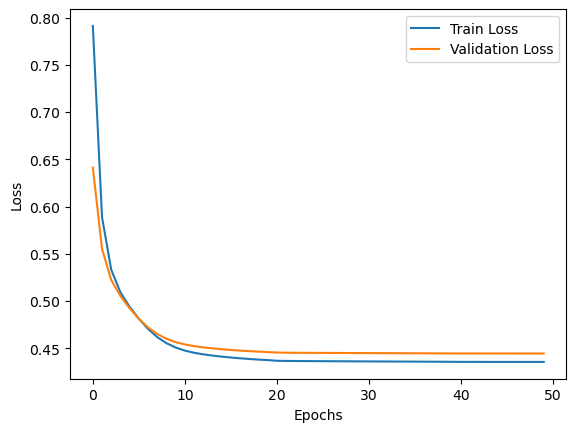

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 7s 21ms/step - loss: 0.5972 - accuracy: 0.7684 - val_loss: 0.5442 - val_accuracy: 0.7927 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5320 - accuracy: 0.7980 - val_loss: 0.5081 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5083 - accuracy: 0.8046 - val_loss: 0.4890 - val_accuracy: 0.8110 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4919 - accuracy: 0.8070 - val_loss: 0.4750 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 8ms/step - loss: 0.4792 - accuracy: 0.8092 - val_loss: 0.4641 - val_accuracy: 0.8127 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 1s

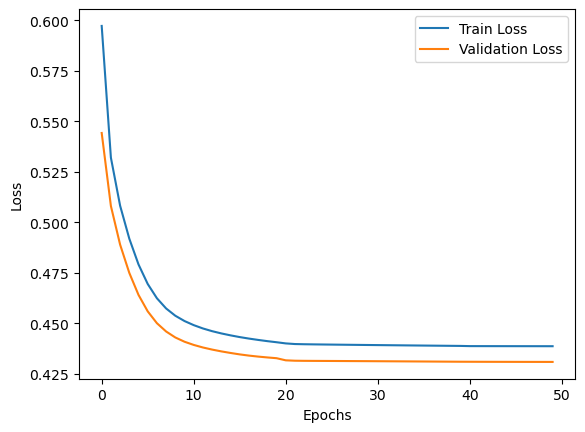

150/150 [==============================] - 0s 1ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5956 - accuracy: 0.7581 - val_loss: 0.5500 - val_accuracy: 0.7783 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.5342 - accuracy: 0.7848 - val_loss: 0.5187 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5074 - accuracy: 0.7996 - val_loss: 0.4974 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4876 - accuracy: 0.8071 - val_loss: 0.4817 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4724 - accuracy: 0.8096 - val_loss: 0.4691 - val_accuracy: 0.8098 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 1s

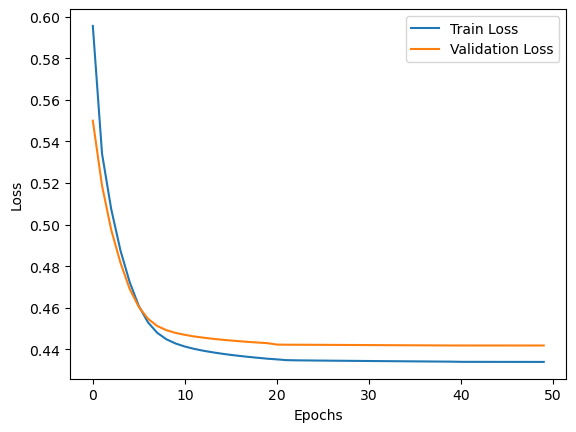

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 5s 15ms/step - loss: 0.5829 - accuracy: 0.7718 - val_loss: 0.5454 - val_accuracy: 0.7869 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 11ms/step - loss: 0.5260 - accuracy: 0.7946 - val_loss: 0.5112 - val_accuracy: 0.8054 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 8ms/step - loss: 0.5018 - accuracy: 0.8031 - val_loss: 0.4931 - val_accuracy: 0.8106 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4856 - accuracy: 0.8076 - val_loss: 0.4781 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 0.4726 - accuracy: 0.8097 - val_loss: 0.4663 - val_accuracy: 0.8163 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2

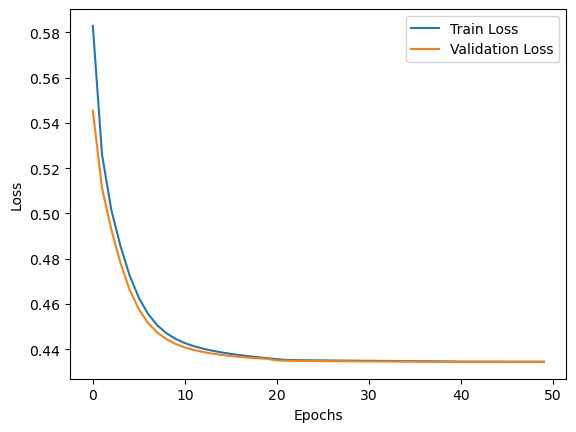

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5677 - accuracy: 0.7830 - val_loss: 0.5444 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.5220 - accuracy: 0.8007 - val_loss: 0.5174 - val_accuracy: 0.8002 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5010 - accuracy: 0.8053 - val_loss: 0.4986 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4850 - accuracy: 0.8065 - val_loss: 0.4832 - val_accuracy: 0.8042 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4722 - accuracy: 0.8095 - val_loss: 0.4714 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 2s 

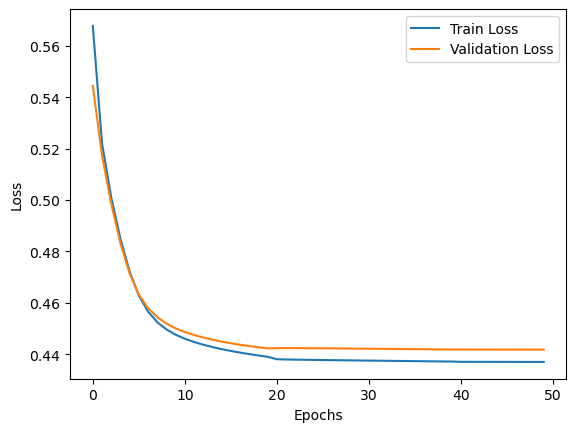

150/150 [==============================] - 0s 2ms/step
Configuration: filters=16, kernel size=4
Accuracy: 0.821 (+/- 0.002)
Precision: 0.677 (+/- 0.017)
Recall: 0.363 (+/- 0.013)
F1 score: 0.472 (+/- 0.009)
AUC score: 0.657 (+/- 0.005)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 6s 18ms/step - loss: 0.5982 - accuracy: 0.7650 - val_loss: 0.5505 - val_accuracy: 0.7971 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 2s 7ms/step - loss: 0.5304 - accuracy: 0.8060 - val_loss: 0.5188 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 5s 16ms/step - loss: 0.5035 - accuracy: 0.8092 - val_loss: 0.5007 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4858 - accuracy: 0.8109 - val_loss: 0.4874 - val_accuracy: 0.8065 - lr: 1.0000e-04
Epoch 5/50
300/300 [============

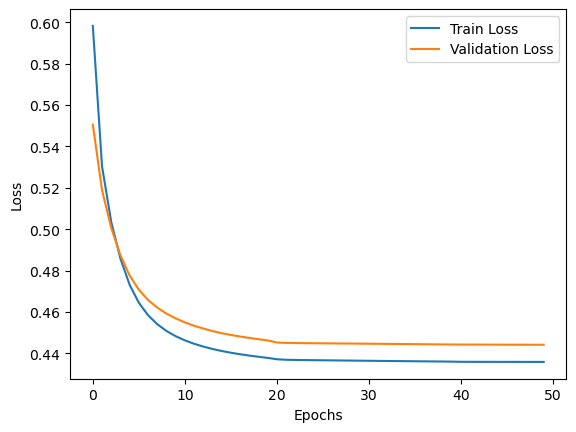

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
300/300 [==============================] - 5s 13ms/step - loss: 0.6278 - accuracy: 0.7234 - val_loss: 0.5584 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.5387 - accuracy: 0.8015 - val_loss: 0.5150 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.5122 - accuracy: 0.8049 - val_loss: 0.4970 - val_accuracy: 0.8085 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.4982 - accuracy: 0.8075 - val_loss: 0.4845 - val_accuracy: 0.8102 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4867 - accuracy: 0.8097 - val_loss: 0.4737 - val_accuracy: 0.8127 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 

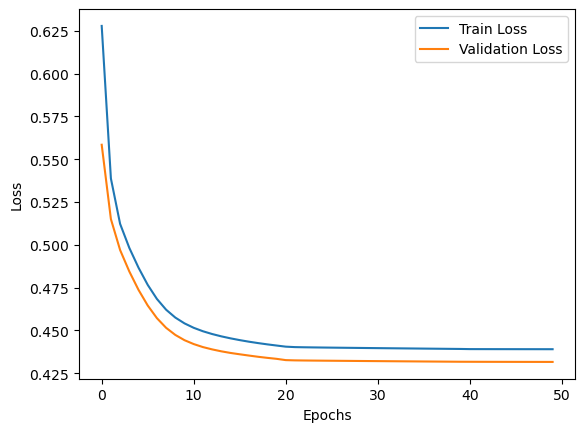

150/150 [==============================] - 1s 3ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
300/300 [==============================] - 6s 18ms/step - loss: 0.7362 - accuracy: 0.5279 - val_loss: 0.6080 - val_accuracy: 0.7740 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 5s 18ms/step - loss: 0.5696 - accuracy: 0.7826 - val_loss: 0.5386 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 4s 15ms/step - loss: 0.5221 - accuracy: 0.8010 - val_loss: 0.5092 - val_accuracy: 0.8098 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 4s 15ms/step - loss: 0.5010 - accuracy: 0.8052 - val_loss: 0.4942 - val_accuracy: 0.8115 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4876 - accuracy: 0.8077 - val_loss: 0.4833 - val_accuracy: 0.8112 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] -

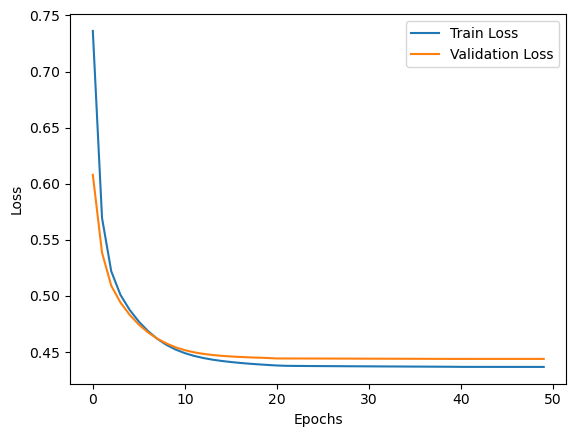

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
300/300 [==============================] - 3s 9ms/step - loss: 0.6665 - accuracy: 0.6331 - val_loss: 0.5888 - val_accuracy: 0.7777 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 7s 22ms/step - loss: 0.5593 - accuracy: 0.7824 - val_loss: 0.5362 - val_accuracy: 0.7927 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 2s 7ms/step - loss: 0.5223 - accuracy: 0.7965 - val_loss: 0.5123 - val_accuracy: 0.8054 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.5025 - accuracy: 0.8006 - val_loss: 0.4951 - val_accuracy: 0.8069 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 8ms/step - loss: 0.4864 - accuracy: 0.8035 - val_loss: 0.4799 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 3s

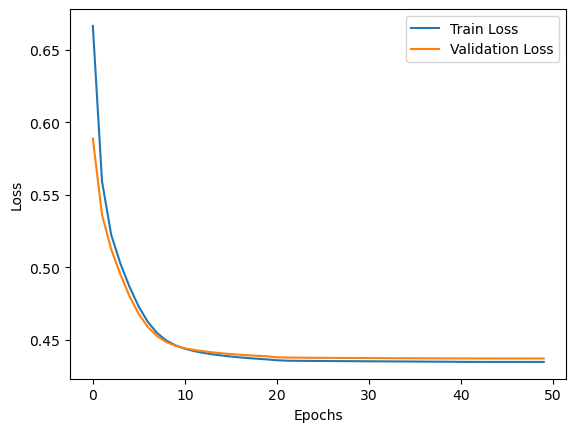

150/150 [==============================] - 0s 1ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.6041 - accuracy: 0.7702 - val_loss: 0.5627 - val_accuracy: 0.7906 - lr: 1.0000e-04
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5319 - accuracy: 0.8028 - val_loss: 0.5214 - val_accuracy: 0.8042 - lr: 1.0000e-04
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5037 - accuracy: 0.8059 - val_loss: 0.5001 - val_accuracy: 0.8071 - lr: 1.0000e-04
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4866 - accuracy: 0.8082 - val_loss: 0.4853 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 5/50
300/300 [==============================] - 3s 11ms/step - loss: 0.4740 - accuracy: 0.8102 - val_loss: 0.4748 - val_accuracy: 0.8077 - lr: 1.0000e-04
Epoch 6/50
300/300 [==============================] - 4s

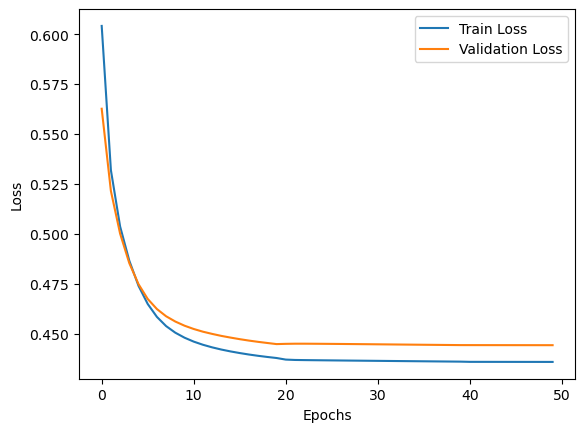

150/150 [==============================] - 0s 2ms/step
Configuration: filters=16, kernel size=4
Accuracy: 0.820 (+/- 0.002)
Precision: 0.677 (+/- 0.006)
Recall: 0.354 (+/- 0.015)
F1 score: 0.465 (+/- 0.013)
AUC score: 0.653 (+/- 0.006)

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
300/300 [==============================] - 4s 11ms/step - loss: 0.6218 - accuracy: 0.7132 - val_loss: 0.5424 - val_accuracy: 0.7948 - lr: 1.0000e-04
Epoch 2/50
201/300 [===================>..........] - ETA: 2s - loss: 0.5204 - accuracy: 0.8078

KeyboardInterrupt: 

In [78]:
filters = [16]
kernels = [4]
num_layers = 2
doubling_factor=2

best_configuration = None
best_f1_score = 0.0

for filter in filters:
    for kernel in kernels:
      
            
        fold_no = 1
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        AUC_scores = []
    
        for train_index, test_index in kf.split(X_train, y_train):
            
            X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

            # Perform preprocessing steps on X_train_dl
            X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
            X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
            
            temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
            'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
            'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
            static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
            static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
            
            X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
            X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
            X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
            X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

            PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
            BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
            PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
            
            PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
            BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
            PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
            
            PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
            BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
            PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
            
            # Stack temporal features
            stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
            stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
            y_train_dl = y_train_dl.to_numpy()
            y_test_dl = y_test_dl.to_numpy()
            
            # Build and compile LSTM model
            num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
            
            # Define the LSTM model
            model = Sequential()
            model.add(Conv1D(filters=filter, kernel_size=kernel, activation='relu',padding='same', input_shape=(num_time_steps, num_features)))
            for i in range(1, num_layers):
                filters *= doubling_factor
                model.add(Conv1D(filters=filter, kernel_size=kernel, activation='relu',padding='same'))
            model.add(Flatten())
            model.add(Dense(1, activation='sigmoid'))
            
            initial_learning_rate = 0.0001  # Initial learning rate
            decay_rate = 0.1  # Decay rate
            decay_steps = 20  # Decay steps (number of steps before applying decay)
            epochs = 50

            def learning_rate_scheduler(epoch):
                return initial_learning_rate * decay_rate ** (epoch // decay_steps)
            
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = initial_learning_rate), metrics=['accuracy'])
            
            lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
            
            print('------------------------------------------------------------------------')
            print(f'Training for fold {fold_no}')
        
            # Train the model
            
            batch_size = 64
            
            # Train the model
            history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
            
            # Plot the loss on train vs validate tests
            plt.plot(history.history['loss'], label='Train Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()
            
            y_pred_probs = model.predict(stacked_test)
            y_pred = (y_pred_probs>=0.5).astype(int)    
            
            accuracy =  accuracy_score(y_test_dl,y_pred)
            precision = precision_score(y_test_dl,y_pred)
            recall = recall_score(y_test_dl,y_pred)
            f1 =  f1_score(y_test_dl,y_pred)
            AUC = roc_auc_score(y_test_dl,y_pred)

            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            AUC_scores.append(AUC)
            
            fold_no = fold_no + 1
        
        # Calculate the average F1 score for the current configuration
        average_f1_score = np.mean(f1_scores)

        # Print the scores for the current configuration
        print(f"Configuration: filters={filter}, kernel size={kernel}")
        print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
        print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
        print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
        print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
        print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
        print()
    
        # Check if the current configuration has a higher average F1 score
        # If so, update the best configuration and best F1 score
        if average_f1_score > best_f1_score:
            best_configuration = (num_layers,filters)
            best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Layers, filters):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

### CNN Tuning Optimizer, lr, bs

------------------------------------------------------------------------
Training for fold 1
Epoch 1/50
38/38 [==============================] - 4s 93ms/step - loss: 0.5111 - accuracy: 0.7956 - val_loss: 0.4541 - val_accuracy: 0.8083 - lr: 0.0100
Epoch 2/50
38/38 [==============================] - 1s 31ms/step - loss: 0.4576 - accuracy: 0.8090 - val_loss: 0.4456 - val_accuracy: 0.8140 - lr: 0.0100
Epoch 3/50
38/38 [==============================] - 1s 29ms/step - loss: 0.4510 - accuracy: 0.8101 - val_loss: 0.4458 - val_accuracy: 0.8163 - lr: 0.0100
Epoch 4/50
38/38 [==============================] - 1s 31ms/step - loss: 0.4497 - accuracy: 0.8106 - val_loss: 0.4418 - val_accuracy: 0.8152 - lr: 0.0100
Epoch 5/50
38/38 [==============================] - 1s 36ms/step - loss: 0.4474 - accuracy: 0.8106 - val_loss: 0.4410 - val_accuracy: 0.8138 - lr: 0.0100
Epoch 6/50
38/38 [==============================] - 2s 51ms/step - loss: 0.4472 - accuracy: 0.8113 - val_loss: 0.4396 - val_accuracy: 0.8

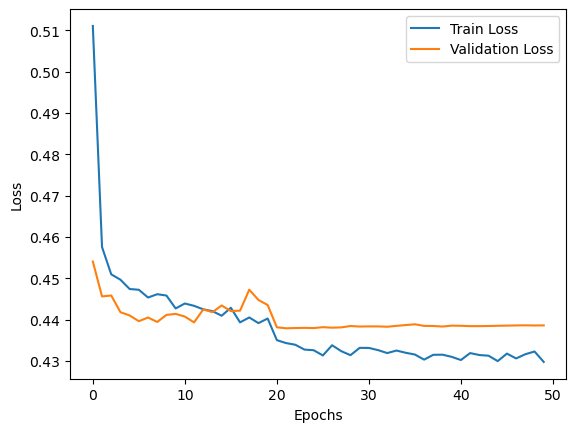

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/50
38/38 [==============================] - 1s 17ms/step - loss: 0.5283 - accuracy: 0.7739 - val_loss: 0.4698 - val_accuracy: 0.7788 - lr: 0.0100
Epoch 2/50
38/38 [==============================] - 1s 31ms/step - loss: 0.4766 - accuracy: 0.7786 - val_loss: 0.4564 - val_accuracy: 0.7788 - lr: 0.0100
Epoch 3/50
38/38 [==============================] - 1s 29ms/step - loss: 0.4708 - accuracy: 0.7788 - val_loss: 0.4555 - val_accuracy: 0.7788 - lr: 0.0100
Epoch 4/50
38/38 [==============================] - 1s 26ms/step - loss: 0.4652 - accuracy: 0.7788 - val_loss: 0.4466 - val_accuracy: 0.7788 - lr: 0.0100
Epoch 5/50
38/38 [==============================] - 1s 33ms/step - loss: 0.4669 - accuracy: 0.7788 - val_loss: 0.4454 - val_accuracy: 0.7788 - lr: 0.0100
Epoch 6/50
38/38 [==============================] - 1s 37ms/step - loss: 0.4676 - 

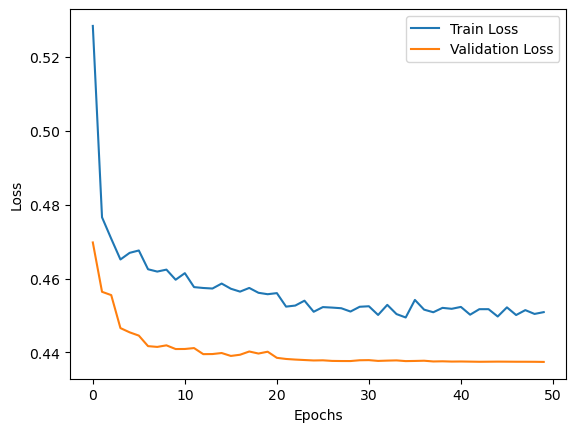

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/50
38/38 [==============================] - 1s 19ms/step - loss: 0.5415 - accuracy: 0.7703 - val_loss: 0.4675 - val_accuracy: 0.7829 - lr: 0.0100
Epoch 2/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4707 - accuracy: 0.7921 - val_loss: 0.4501 - val_accuracy: 0.8110 - lr: 0.0100
Epoch 3/50
38/38 [==============================] - 1s 14ms/step - loss: 0.4638 - accuracy: 0.7996 - val_loss: 0.4470 - val_accuracy: 0.8127 - lr: 0.0100
Epoch 4/50
38/38 [==============================] - 1s 15ms/step - loss: 0.4588 - accuracy: 0.8031 - val_loss: 0.4445 - val_accuracy: 0.8160 - lr: 0.0100
Epoch 5/50
38/38 [==============================] - 1s 14ms/step - loss: 0.4558 - accuracy: 0.8041 - val_loss: 0.4442 - val_accuracy: 0.8198 - lr: 0.0100
Epoch 6/50
38/38 [==============================] - 0s 13ms/step - loss: 0.4562 - 

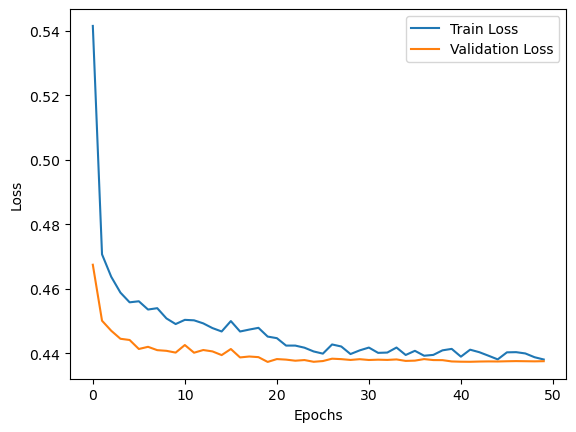

150/150 [==============================] - 1s 2ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/50
38/38 [==============================] - 1s 21ms/step - loss: 0.5368 - accuracy: 0.7769 - val_loss: 0.4511 - val_accuracy: 0.8094 - lr: 0.0100
Epoch 2/50
38/38 [==============================] - 1s 14ms/step - loss: 0.4679 - accuracy: 0.7939 - val_loss: 0.4477 - val_accuracy: 0.8094 - lr: 0.0100
Epoch 3/50
38/38 [==============================] - 1s 18ms/step - loss: 0.4593 - accuracy: 0.8007 - val_loss: 0.4435 - val_accuracy: 0.8188 - lr: 0.0100
Epoch 4/50
38/38 [==============================] - 0s 13ms/step - loss: 0.4577 - accuracy: 0.8040 - val_loss: 0.4434 - val_accuracy: 0.8204 - lr: 0.0100
Epoch 5/50
38/38 [==============================] - 1s 17ms/step - loss: 0.4574 - accuracy: 0.8022 - val_loss: 0.4449 - val_accuracy: 0.8198 - lr: 0.0100
Epoch 6/50
38/38 [==============================] - 1s 14ms/step - loss: 0.4549 - 

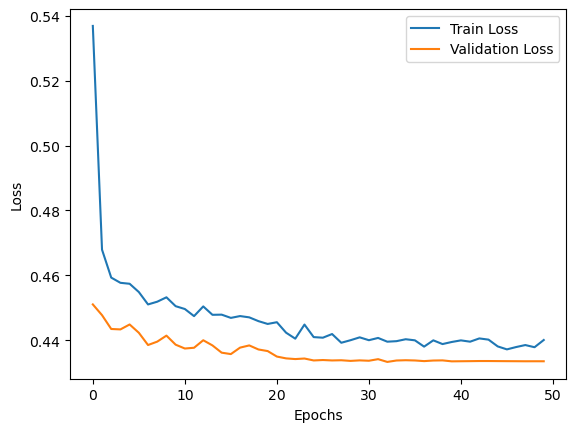

150/150 [==============================] - 0s 2ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/50
38/38 [==============================] - 1s 20ms/step - loss: 0.5221 - accuracy: 0.7811 - val_loss: 0.4598 - val_accuracy: 0.8015 - lr: 0.0100
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 0.4700 - accuracy: 0.7960 - val_loss: 0.4519 - val_accuracy: 0.8075 - lr: 0.0100
Epoch 3/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4618 - accuracy: 0.8007 - val_loss: 0.4478 - val_accuracy: 0.8135 - lr: 0.0100
Epoch 4/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4611 - accuracy: 0.8045 - val_loss: 0.4462 - val_accuracy: 0.8037 - lr: 0.0100
Epoch 5/50
38/38 [==============================] - 1s 20ms/step - loss: 0.4554 - accuracy: 0.8064 - val_loss: 0.4452 - val_accuracy: 0.8121 - lr: 0.0100
Epoch 6/50
38/38 [==============================] - 1s 19ms/step - loss: 0.4555 - 

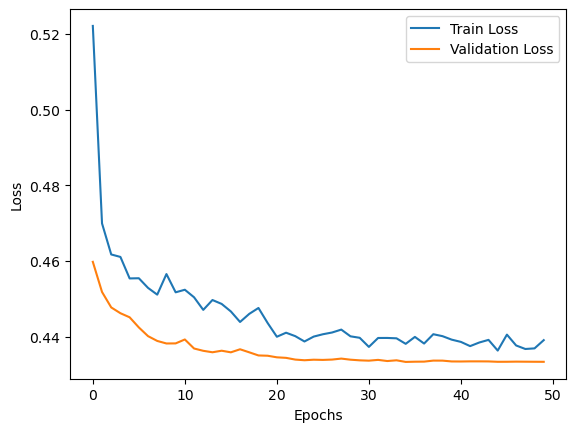

150/150 [==============================] - 0s 2ms/step
Configuration: Learning Rate=0.01, Optimizer=Adam,Batch Size =512
Accuracy: 0.818 (+/- 0.003)
Precision: 0.684 (+/- 0.008)
Recall: 0.330 (+/- 0.020)
F1 score: 0.445 (+/- 0.019)
AUC score: 0.643 (+/- 0.009)

Best Configuration (Learning Rate, Optimizer, Batch Size):
(0.01, <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000029B26269AB0>, 512)
Best F1 Score: 0.4446732530844595


In [92]:
initial_learning_rates = [0.01]
optimizers = ['adam']
batches = [512]

best_configuration = None
best_f1_score = 0.0

for lr in initial_learning_rates:
    for optimizer in optimizers:
        for bs in batches:
            
            fold_no = 1
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            AUC_scores = []
        
            for train_index, test_index in kf.split(X_train, y_train):
                
                X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
                y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

                # Perform preprocessing steps on X_train_dl
                X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
                X_test_dl_preprocessed = enc_dl.transform(X_test_dl)
                
                temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
                static_cols_train = X_train_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
                
                X_train_dl_temp = X_train_dl_preprocessed[temp_cols]
                X_train_dl_static = X_train_dl_preprocessed[static_cols_train]
                X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
                X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

                PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
                BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
                PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
                
                PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
                
                PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
                BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
                PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
                
                # Stack temporal features
                stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
                stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
                y_train_dl = y_train_dl.to_numpy()
                y_test_dl = y_test_dl.to_numpy()
                
                # Build and compile LSTM model
                num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]
                
                # Define the LSTM model
                model = Sequential()
                model.add(Conv1D(filters=16, kernel_size=5, activation='relu',padding='same', input_shape=(num_time_steps, num_features)))
                model.add(MaxPooling1D(pool_size=3))
                model.add(Conv1D(filters=32, padding='same', kernel_size=3, activation='relu'))
                model.add(MaxPooling1D(pool_size=2))
                model.add(Flatten())
                model.add(Dropout(0.5))
                model.add(Dense(1, activation='sigmoid'))
                
                initial_learning_rate = lr  # Initial learning rate
                decay_rate = 0.1  # Decay rate
                decay_steps = 20  # Decay steps (number of steps before applying decay)
                epochs = 50

                def learning_rate_scheduler(epoch):
                    return initial_learning_rate * decay_rate ** (epoch // decay_steps)
                
                if optimizer == 'rmsprop':
                    optimizer = RMSprop(learning_rate=initial_learning_rate)
                elif optimizer == 'sgd':
                    optimizer = SGD(learning_rate=initial_learning_rate)
                elif optimizer == 'adamax':
                    optimizer = Adamax(learning_rate=initial_learning_rate)
                elif optimizer == 'adam':
                    optimizer = Adam(learning_rate=initial_learning_rate)
                
                
                model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                
                lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
                
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no}')
            
                # Train the model
                batch_size = bs
                
                # Train the model
                history = model.fit(stacked_train, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
                
                # Plot the loss on train vs validate tests
                plt.plot(history.history['loss'], label='Train Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.show()
                
                y_pred_probs = model.predict(stacked_test)
                y_pred = (y_pred_probs>=0.5).astype(int)    
                
                accuracy =  accuracy_score(y_test_dl,y_pred)
                precision = precision_score(y_test_dl,y_pred)
                recall = recall_score(y_test_dl,y_pred)
                f1 =  f1_score(y_test_dl,y_pred)
                AUC = roc_auc_score(y_test_dl,y_pred)

                accuracy_scores.append(accuracy)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)
                AUC_scores.append(AUC)
                
                fold_no = fold_no + 1
            
            # Calculate the average F1 score for the current configuration
            average_f1_score = np.mean(f1_scores)

            # Print the scores for the current configuration
            print(f"Configuration: Learning Rate={lr}, Optimizer={optimizer.get_config()['name']},Batch Size ={bs}")
            print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
            print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
            print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
            print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
            print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))
            print()
        
            # Check if the current configuration has a higher average F1 score
            # If so, update the best configuration and best F1 score
            if average_f1_score > best_f1_score:
                best_configuration = (lr, optimizer,batch_size)
                best_f1_score = average_f1_score


# Print the best configuration
print("Best Configuration (Learning Rate, Optimizer, Batch Size):")
print(best_configuration)
print("Best F1 Score:", best_f1_score)

## Results on test set

In [113]:
def preprocess_data(X_train, y_train, X_test, y_test):
    
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    X_train_preprocessed = enc_dl.fit_transform(X_train)
    X_test_preprocessed = enc_dl.transform(X_test)
    
    static_cols_train = X_train_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
        
    X_train_temp = X_train_preprocessed[temp_cols]
    X_train_static = X_train_preprocessed[static_cols_train]
    X_test_temp = X_test_preprocessed[temp_cols]
    X_test_static = X_test_preprocessed[static_cols_test]

    PAY_train = X_train_temp[PAY_cols].to_numpy()
    BILL_AMT_train = X_train_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train = X_train_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test = X_test_temp[PAY_cols].to_numpy()
    BILL_AMT_test = X_test_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test = X_test_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train, BILL_AMT_train, PAY_AMT_train))
    stacked_test = np.dstack((PAY_test, BILL_AMT_test, PAY_AMT_test))
    y_train_preprocessed = y_train.to_numpy()
    y_test_preprocessed = y_test.to_numpy()
    
    return stacked_train, X_train_static, y_train_preprocessed, stacked_test, X_test_static, y_test_preprocessed
    

### Preprocessing on the train - test set before prediction

In [194]:
X_train_temporal, X_train_static, y_train_preprocessed, X_test_temporal, X_test_static, y_test_preprocessed = preprocess_data(X_train, y_train, X_test, y_test)

### Performance on temporal feature extraction

#### LSTM

Epoch 1/50
750/750 [==============================] - 17s 19ms/step - loss: 0.5180 - accuracy: 0.7888 - val_loss: 0.4758 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 13s 18ms/step - loss: 0.4734 - accuracy: 0.7973 - val_loss: 0.4623 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 14s 19ms/step - loss: 0.4652 - accuracy: 0.7993 - val_loss: 0.4564 - val_accuracy: 0.8033 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 14s 18ms/step - loss: 0.4605 - accuracy: 0.8012 - val_loss: 0.4530 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 12s 16ms/step - loss: 0.4573 - accuracy: 0.8025 - val_loss: 0.4506 - val_accuracy: 0.8060 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 14s 18ms/step - loss: 0.4548 - accuracy: 0.8039 - val_loss: 0.4487 - val_accuracy: 0.8088 - lr: 1.0000e-04
Epoch 7/50
750/750 [==============

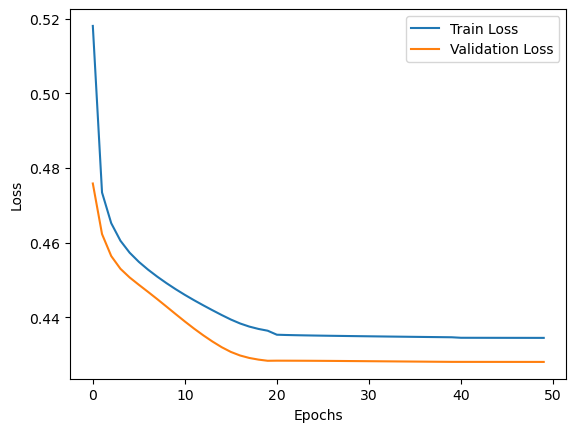

188/188 [==============================] - 2s 7ms/step


In [119]:
# Build and compile LSTM lstm_temporal
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

# Define the LSTM lstm_temporal
lstm_temporal = Sequential()
lstm_temporal.add(LSTM(64,return_sequences=True, input_shape=(num_time_steps, num_features)))
lstm_temporal.add(LSTM(64,return_sequences = True))
lstm_temporal.add(Flatten())
lstm_temporal.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


lstm_temporal.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Train the lstm_temporal
batch_size = 32

# Train the lstm_temporal
history = lstm_temporal.fit(X_train_temporal, y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=(X_test_temporal, y_test_preprocessed),shuffle=False,callbacks=[lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_probs_lstm_temp = lstm_temporal.predict(X_test_temporal)
y_pred_lstm_temp = (y_pred_probs_lstm_temp>=0.5).astype(int)    

accuracy =  accuracy_score(y_test_preprocessed,y_pred_lstm_temp)
precision = precision_score(y_test_preprocessed,y_pred_lstm_temp)
recall = recall_score(y_test_preprocessed,y_pred_lstm_temp)
f1 =  f1_score(y_test_preprocessed,y_pred_lstm_temp)
AUC = roc_auc_score(y_test_preprocessed,y_pred_lstm_temp)



In [121]:
print('LSTM Accuracy on temporal: %.3f' % accuracy)
print('LSTM Precision on temporal: %.3f' % precision)
print('LSTM Recall on temporal: %.3f' % recall)
print('LSTM F1 score on temporal: %.3f' % f1)
print('LSTM AUC score on temporal: %.3f' % AUC)

LSTM Accuracy on temporal: 0.827
LSTM Precision on temporal: 0.691
LSTM Recall on temporal: 0.392
LSTM F1 score on temporal: 0.500
LSTM AUC score on temporal: 0.671


#### RNN

Epoch 1/50
750/750 [==============================] - 11s 9ms/step - loss: 0.4821 - accuracy: 0.7879 - val_loss: 0.4570 - val_accuracy: 0.8048 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4560 - accuracy: 0.8041 - val_loss: 0.4476 - val_accuracy: 0.8117 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4497 - accuracy: 0.8064 - val_loss: 0.4421 - val_accuracy: 0.8142 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 6s 9ms/step - loss: 0.4459 - accuracy: 0.8095 - val_loss: 0.4387 - val_accuracy: 0.8142 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4435 - accuracy: 0.8091 - val_loss: 0.4364 - val_accuracy: 0.8147 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4417 - accuracy: 0.8103 - val_loss: 0.4346 - val_accuracy: 0.8160 - lr: 1.0000e-04
Epoch 7/50
750/750 [=========================

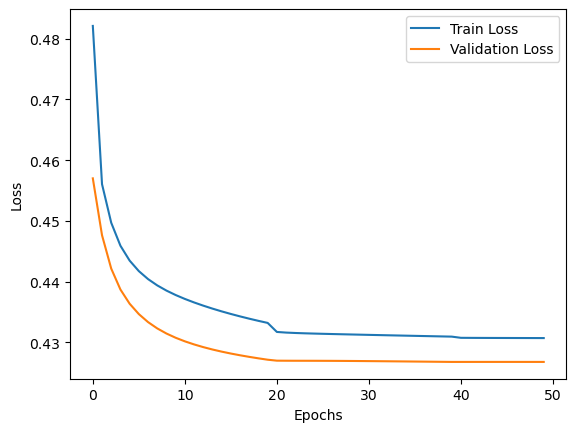

188/188 [==============================] - 1s 4ms/step
RNN Accuracy on temporal: 0.824
RNN Precision on temporal: 0.676
RNN Recall on temporal: 0.390
RNN F1 score on temporal: 0.494
RNN AUC score on temporal: 0.668


In [122]:
# Build and compile rnn_temporal
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

# Define the rnn_temporal
rnn_temporal = Sequential()
rnn_temporal.add(SimpleRNN(32,return_sequences=True, input_shape=(num_time_steps, num_features)))
rnn_temporal.add(SimpleRNN(32,return_sequences = True))
rnn_temporal.add(SimpleRNN(32,return_sequences = True))
rnn_temporal.add(Flatten())
rnn_temporal.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


rnn_temporal.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Train the rnn_temporal
batch_size = 32

# Train the rnn_temporal
history_rnn_temp = rnn_temporal.fit(X_train_temporal, y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=(X_test_temporal, y_test_preprocessed),shuffle=False,callbacks=[lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_rnn_temp.history['loss'], label='Train Loss')
plt.plot(history_rnn_temp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_probs_rnn_temp = rnn_temporal.predict(X_test_temporal)
y_pred_rnn_temp = (y_pred_probs_rnn_temp>=0.5).astype(int)    

accuracy_rnn_temp =  accuracy_score(y_test_preprocessed,y_pred_rnn_temp)
precision_rnn_temp = precision_score(y_test_preprocessed,y_pred_rnn_temp)
recall_rnn_temp = recall_score(y_test_preprocessed,y_pred_rnn_temp)
f1_rnn_temp =  f1_score(y_test_preprocessed,y_pred_rnn_temp)
AUC_rnn_temp = roc_auc_score(y_test_preprocessed,y_pred_rnn_temp)

print('RNN Accuracy on temporal: %.3f' % accuracy_rnn_temp)
print('RNN Precision on temporal: %.3f' % precision_rnn_temp)
print('RNN Recall on temporal: %.3f' % recall_rnn_temp)
print('RNN F1 score on temporal: %.3f' % f1_rnn_temp)
print('RNN AUC score on temporal: %.3f' % AUC_rnn_temp)



#### CNN

### Performance assessment after concatenation layer

In [124]:
num_time_steps, num_features = X_train_temporal.shape[1], X_train_temporal.shape[2]

temporal_input = Input(shape=(num_time_steps, num_features),name = 'TEMPORAL_INPUT')
static_input = Input(shape=(X_train_static.shape[1]),name = 'STATIC_INPUT')

#### LSTM

Epoch 1/50
750/750 [==============================] - 17s 18ms/step - loss: 0.5261 - accuracy: 0.7524 - val_loss: 0.4768 - val_accuracy: 0.7970 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 12s 16ms/step - loss: 0.4736 - accuracy: 0.7975 - val_loss: 0.4628 - val_accuracy: 0.8005 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 12s 16ms/step - loss: 0.4652 - accuracy: 0.7997 - val_loss: 0.4568 - val_accuracy: 0.8028 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 13s 17ms/step - loss: 0.4602 - accuracy: 0.8011 - val_loss: 0.4529 - val_accuracy: 0.8053 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 12s 16ms/step - loss: 0.4565 - accuracy: 0.8030 - val_loss: 0.4501 - val_accuracy: 0.8068 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 12s 16ms/step - loss: 0.4536 - accuracy: 0.8046 - val_loss: 0.4477 - val_accuracy: 0.8083 - lr: 1.0000e-04
Epoch 7/50
750/750 [==============

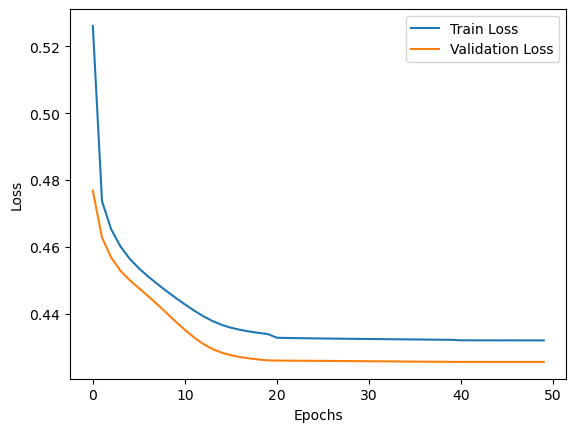

188/188 [==============================] - 2s 6ms/step
LSTM Accuracy after concatenation: 0.826
LSTM Precision after concatenation: 0.691
LSTM Recall after concatenation: 0.387
LSTM F1 score after concatenation: 0.496
LSTM AUC score after concatenation: 0.669


In [126]:
#Build and compile lstm_conc_model

lstm_layer = LSTM(64,return_sequences=True, name = 'LSTM_LAYER_1')(temporal_input)
lstm_layer = LSTM(64,return_sequences=True, name = 'LSTM_LAYER_2')(lstm_layer)
lstm_layer = Flatten(name = 'FLATTEN')(lstm_layer)

LSTM_combined = Concatenate(axis=1, name ='LSTM_CONCAT')([lstm_layer,static_input])
output = Dense(1,activation='sigmoid',name='LSTM_OUTPUT_LAYER')(LSTM_combined)

lstm_conc_model = Model(inputs=[temporal_input,static_input],outputs=[output])


initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


lstm_conc_model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

#Train the model
batch_size = 32    

history_lstm_conc = lstm_conc_model.fit([X_train_temporal, X_train_static], y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=([X_test_temporal, X_test_static], y_test_preprocessed),shuffle=False,callbacks = [lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_lstm_conc.history['loss'], label='Train Loss')
plt.plot(history_lstm_conc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the test set    
y_pred_probs_lstm_conc = lstm_conc_model.predict([X_test_temporal, X_test_static])
y_pred_lstm_conc = (y_pred_probs_lstm_conc>=0.5).astype(int)    

accuracy_lstm_conc =  accuracy_score(y_test_preprocessed,y_pred_lstm_conc)
precision_lstm_conc = precision_score(y_test_preprocessed,y_pred_lstm_conc)
recall_lstm_conc = recall_score(y_test_preprocessed,y_pred_lstm_conc)
f1_lstm_conc =  f1_score(y_test_preprocessed,y_pred_lstm_conc)
AUC_lstm_conc= roc_auc_score(y_test_preprocessed,y_pred_lstm_conc)

print('LSTM Accuracy after concatenation: %.3f' % accuracy_lstm_conc)
print('LSTM Precision after concatenation: %.3f' % precision_lstm_conc)
print('LSTM Recall after concatenation: %.3f' % recall_lstm_conc)
print('LSTM F1 score after concatenation: %.3f' % f1_lstm_conc)
print('LSTM AUC score after concatenation: %.3f' % AUC_lstm_conc)



#### RNN

Epoch 1/50
750/750 [==============================] - 10s 10ms/step - loss: 0.4797 - accuracy: 0.7894 - val_loss: 0.4468 - val_accuracy: 0.8108 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4507 - accuracy: 0.8048 - val_loss: 0.4402 - val_accuracy: 0.8147 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4461 - accuracy: 0.8073 - val_loss: 0.4368 - val_accuracy: 0.8158 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4434 - accuracy: 0.8090 - val_loss: 0.4345 - val_accuracy: 0.8155 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4414 - accuracy: 0.8105 - val_loss: 0.4329 - val_accuracy: 0.8168 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4399 - accuracy: 0.8115 - val_loss: 0.4316 - val_accuracy: 0.8177 - lr: 1.0000e-04
Epoch 7/50
750/750 [========================

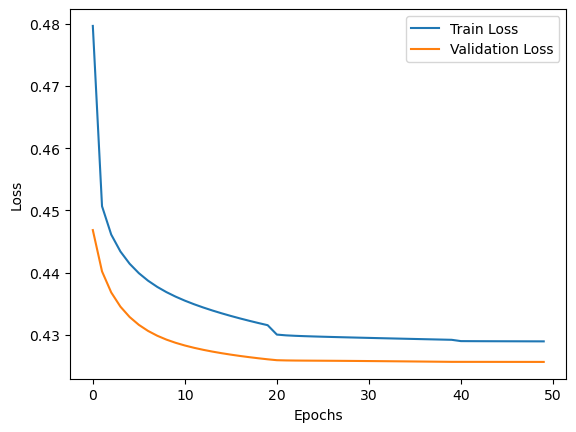

188/188 [==============================] - 1s 5ms/step
RNN Accuracy after concatenation: 0.825
RNN Precision after concatenation: 0.679
RNN Recall after concatenation: 0.397
RNN F1 score after concatenation: 0.501
RNN AUC score after concatenation: 0.672


In [130]:
#Build and compile rnn_conc_model

rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_1')(temporal_input)
rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_2')(rnn_layer)
rnn_layer = SimpleRNN(32,return_sequences=True, name = 'rnn_LAYER_3')(rnn_layer)
rnn_layer = Flatten(name = 'rnn_FLATTEN')(rnn_layer)

RNN_combined = Concatenate(axis=1, name ='RNN_CONCAT')([rnn_layer,static_input])
RNN_output = Dense(1,activation='sigmoid',name='RNN_OUTPUT_LAYER')(RNN_combined)

rnn_conc_model = Model(inputs=[temporal_input,static_input],outputs=[RNN_output])


initial_learning_rate = 0.0001  # Initial learning rate
decay_rate = 0.1  # Decay rate
decay_steps = 20  # Decay steps (number of steps before applying decay)
epochs = 50

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate ** (epoch // decay_steps)


rnn_conc_model.compile(loss='binary_crossentropy', optimizer= RMSprop(learning_rate=initial_learning_rate), metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

#Train the model
batch_size = 32    

history_rnn_conc = rnn_conc_model.fit([X_train_temporal, X_train_static], y_train_preprocessed, epochs=epochs, batch_size=batch_size, validation_data=([X_test_temporal, X_test_static], y_test_preprocessed),shuffle=False,callbacks = [lr_scheduler])

# Plot the loss on train vs validate tests
plt.plot(history_rnn_conc.history['loss'], label='Train Loss')
plt.plot(history_rnn_conc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make predictions on the test set    
y_pred_probs_rnn_conc = rnn_conc_model.predict([X_test_temporal, X_test_static])
y_pred_rnn_conc = (y_pred_probs_rnn_conc>=0.5).astype(int)    

accuracy_rnn_conc =  accuracy_score(y_test_preprocessed,y_pred_rnn_conc)
precision_rnn_conc = precision_score(y_test_preprocessed,y_pred_rnn_conc)
recall_rnn_conc = recall_score(y_test_preprocessed,y_pred_rnn_conc)
f1_rnn_conc =  f1_score(y_test_preprocessed,y_pred_rnn_conc)
AUC_rnn_conc= roc_auc_score(y_test_preprocessed,y_pred_rnn_conc)

print('RNN Accuracy after concatenation: %.3f' % accuracy_rnn_conc)
print('RNN Precision after concatenation: %.3f' % precision_rnn_conc)
print('RNN Recall after concatenation: %.3f' % recall_rnn_conc)
print('RNN F1 score after concatenation: %.3f' % f1_rnn_conc)
print('RNN AUC score after concatenation: %.3f' % AUC_rnn_conc)



#### CNN

### Performance after classification models

In [166]:
def final_prediction(X_train_temp,X_test_temp,X_train_st, X_test_st,y_train_prep,y_test_prep,model, feature_extractor_model, layer_name):
    
    extractor_model = Model(inputs=feature_extractor_model.input, outputs=feature_extractor_model.get_layer(name=layer_name).output)
    customers_vector = extractor_model.predict([X_train_temp,X_train_st])
    customers_test = extractor_model.predict([X_test_temp,X_test_st])
    reshaped_customers_vector = customers_vector.reshape(customers_vector.shape[0], -1)
    reshaped_customers_test = customers_test.reshape(customers_test.shape[0], -1) 
    final_model = model
    final_model.fit(reshaped_customers_vector, y_train_prep)
    preds = final_model.predict(reshaped_customers_test)
    
    accuracy = accuracy_score(y_test_prep, preds)
    precision = precision_score(y_test_prep, preds)
    recall = recall_score(y_test_prep, preds)
    f1 = f1_score(y_test_prep, preds)
    auc = roc_auc_score(y_test_prep, preds)

    print(f"Metrics for {feature_extractor_model.name} + {model}:")
    print('Accuracy: %.3f' % accuracy)
    print('Precision: %.3f' % precision)
    print('Recall: %.3f' % recall)
    print('F1 score: %.3f' % f1)
    print('AUC score: %.3f' % auc)

#### LSTM

In [155]:
lstm_temporal.summary()

Model: "sequential_340"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 6, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 6, 64)             33024     
                                                                 
 flatten_336 (Flatten)       (None, 384)               0         
                                                                 
 dense_337 (Dense)           (None, 1)                 385       
                                                                 
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


##### LSTM + LR

In [160]:
final_prediction(X_train_temp=X_train_temporal,X_test_temp=X_test_temporal,X_train_st=X_train_static,X_test_st= X_test_static,y_train_prep=y_train_preprocessed,y_test_prep=y_test_preprocessed,model = LogisticRegression(max_iter=500), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 8ms/step
Metrics for <keras.engine.functional.Functional object at 0x0000029B5B230BE0> + LogisticRegression(max_iter=500):
Accuracy: 0.828
Precision: 0.702
Recall: 0.382
F1 score: 0.495
AUC score: 0.668


##### LSTM + XGB

In [167]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = XGBClassifier(), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 6ms/step
Metrics for model_1 + XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
Accuracy: 0.818
Precision: 0.661
Recall: 0.365
F1 score: 0.471
AUC score: 0.656


##### LSTM + RF

In [168]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = RandomForestClassifier(), feature_extractor_model = lstm_conc_model, layer_name='LSTM_CONCAT')

188/188 [==============================] - 2s 8ms/step
Metrics for model_1 + RandomForestClassifier():
Accuracy: 0.817
Precision: 0.642
Recall: 0.390
F1 score: 0.485
AUC score: 0.664


### RNN

In [133]:
rnn_conc_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 TEMPORAL_INPUT (InputLayer)    [(None, 6, 3)]       0           []                               
                                                                                                  
 rnn_LAYER_1 (SimpleRNN)        (None, 6, 32)        1152        ['TEMPORAL_INPUT[0][0]']         
                                                                                                  
 rnn_LAYER_2 (SimpleRNN)        (None, 6, 32)        2080        ['rnn_LAYER_1[0][0]']            
                                                                                                  
 rnn_LAYER_3 (SimpleRNN)        (None, 6, 32)        2080        ['rnn_LAYER_2[0][0]']            
                                                                                            

##### RNN + LR

In [169]:
final_prediction(X_train_temp=X_train_temporal,X_test_temp=X_test_temporal,X_train_st=X_train_static,X_test_st= X_test_static,y_train_prep=y_train_preprocessed,y_test_prep=y_test_preprocessed,model = LogisticRegression(max_iter=500), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 5ms/step
Metrics for model_4 + LogisticRegression(max_iter=500):
Accuracy: 0.821
Precision: 0.665
Recall: 0.382
F1 score: 0.485
AUC score: 0.664


##### RNN + XGB

In [170]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = XGBClassifier(), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 4ms/step
Metrics for model_4 + XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
Accuracy: 0.816
Precision: 0.637
Recall: 0.387
F1 score: 0.481
AUC score: 0.662


##### RNN + RF

In [171]:
final_prediction(X_train_temporal,X_test_temporal,X_train_static, X_test_static,y_train_preprocessed,y_test_preprocessed,model = RandomForestClassifier(), feature_extractor_model = rnn_conc_model, layer_name='RNN_CONCAT')

188/188 [==============================] - 1s 4ms/step
Metrics for model_4 + RandomForestClassifier():
Accuracy: 0.813
Precision: 0.630
Recall: 0.372
F1 score: 0.468
AUC score: 0.655


#### CNN

##### CNN + LR

##### CNN + XGB

##### CNN + RF

#### Classification models on test set

##### LR

In [228]:
lr_prep = PreprocessorTransformer(columns = ohe_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False)
X_train_LR = lr_prep.fit_transform(X_train)
X_test_LR = lr_prep.transform(X_test)

In [231]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_LR, y_train)
lr_predictions = lr_model.predict(X_test_LR)

accuracy_LR = accuracy_score(y_test, lr_predictions)
precision_LR = precision_score(y_test, lr_predictions)
recall_LR = recall_score(y_test, lr_predictions)
f1_LR = f1_score(y_test, lr_predictions)
auc_LR = roc_auc_score(y_test, lr_predictions)

print("Accuracy of LR:", accuracy_LR)
print("Precision of LR:", precision_LR)
print("Recall of LR:", recall_LR)
print("F1 Score of LR:", f1_LR)
print('AUC of LR', auc_LR)

Accuracy of LR: 0.8163333333333334
Precision of LR: 0.6595744680851063
Recall of LR: 0.35041446872645066
F1 Score of LR: 0.4576771653543307
AUC of LR 0.6495277993107964


In [232]:
# Make predictions on the training set
lr_train_predictions = lr_model.predict(X_train_LR)

# Calculate evaluation metrics on the training set
accuracy_LR_train = accuracy_score(y_train, lr_train_predictions)
precision_LR_train = precision_score(y_train, lr_train_predictions)
recall_LR_train = recall_score(y_train, lr_train_predictions)
f1_LR_train = f1_score(y_train, lr_train_predictions)
auc_LR_train = roc_auc_score(y_train, lr_train_predictions)

# Print the scores on the training set
print("Accuracy of LR on training set:", accuracy_LR_train)
print("Precision of LR on training set:", precision_LR_train)
print("Recall of LR on training set:", recall_LR_train)
print("F1 Score of LR on training set:", f1_LR_train)
print('AUC of LR on training set:', auc_LR_train)

Accuracy of LR on training set: 0.8220833333333334
Precision of LR on training set: 0.6858676207513417
Recall of LR on training set: 0.3610849500847617
F1 Score of LR on training set: 0.47309970384995065
AUC of LR on training set: 0.6570552351943256


##### XGB

In [188]:
X_train_tree = ohe.fit_transform(X_train)
X_test_tree = ohe.transform(X_test)

c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [191]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tree, y_train)
xgb_predictions = xgb_model.predict(X_test_tree)

accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)
auc_xgb = roc_auc_score(y_test, xgb_predictions)

print("Accuracy of XGB:", accuracy_xgb)
print("Precision of XGB:", precision_xgb)
print("Recall of XGB:", recall_xgb)
print("F1 Score of XGB:", f1_xgb)
print('AUC of XGB', auc_xgb)

Accuracy of XGB: 0.8195
Precision of XGB: 0.6596858638743456
Recall of XGB: 0.37980406932931426
F1 Score of XGB: 0.48206599713055964
AUC of XGB 0.6620826466911927


##### RF

In [192]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tree, y_train)
rf_predictions = rf_model.predict(X_test_tree)

accuracy_RF = accuracy_score(y_test, rf_predictions)
precision_RF = precision_score(y_test, rf_predictions)
recall_RF = recall_score(y_test, rf_predictions)
f1_RF = f1_score(y_test, rf_predictions)
auc_RF = roc_auc_score(y_test, rf_predictions)

print("Accuracy of RF:", accuracy_RF)
print("Precision of RF:", precision_RF)
print("Recall of RF:", recall_RF)
print("F1 Score of RF:", f1_RF)
print('AUC of RF', auc_RF)

Accuracy of RF: 0.8273333333333334
Precision of RF: 0.6942590120160214
Recall of RF: 0.3918613413715147
F1 Score of RF: 0.5009633911368014
AUC of RF 0.6714282097398981


In [213]:
rf_train_predictions = rf_model.predict(X_train_tree)

# Calculate evaluation metrics on the training set
accuracy_RF_train = accuracy_score(y_train, rf_train_predictions)
precision_RF_train = precision_score(y_train, rf_train_predictions)
recall_RF_train = recall_score(y_train, rf_train_predictions)
f1_RF_train = f1_score(y_train, rf_train_predictions)
auc_RF_train = roc_auc_score(y_train, rf_train_predictions)

# Print the scores on the training set
print("Accuracy of RF on training set:", accuracy_RF_train)
print("Precision of RF on training set:", precision_RF_train)
print("Recall of RF on training set:", recall_RF_train)
print("F1 Score of RF on training set:", f1_RF_train)
print('AUC of RF on training set:', auc_RF_train)

Accuracy of RF on training set: 0.6585
Precision of RF on training set: 0.22789820923656928
Recall of RF on training set: 0.227726502166133
F1 Score of RF on training set: 0.22781232334652346
AUC of RF on training set: 0.5042917995823442


In [212]:
y_test.sum()

1327

# VAE Data augmentation

In [ ]:
p = copy.deepcopy(X_train)
j = copy.deepcopy(y_train)
new = pd.concat([p,j],axis=1)
non_default = new[new['DEFAULT']==0].drop('DEFAULT',axis=1)
default = new[new['DEFAULT']==1].drop('DEFAULT',axis=1)

In [ ]:
p_sub = p[:10]


In [ ]:
p_sub

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
22788,160000,2,2,2,33,2,2,3,2,0,...,168541,164310,162681,163005,15000,0,0,6100,12300,6100
29006,150000,2,1,2,34,1,-1,-1,-2,-2,...,0,0,0,0,53,0,0,0,0,0
16950,10000,1,2,1,50,1,2,0,0,0,...,8446,8067,8227,8400,2,1281,1134,294,305,1000
22280,220000,2,1,2,29,0,0,0,0,0,...,215139,218513,131660,134346,9100,9000,7887,4800,4900,6000
11346,310000,2,1,2,32,1,-2,-1,0,0,...,326,326,-235,-235,0,326,0,0,0,1200
4102,240000,2,1,2,36,-1,-1,2,0,-1,...,6649,5149,13750,5777,6959,15,0,7013,0,726
28654,160000,2,3,2,33,-1,2,2,2,2,...,44255,43228,-772,-772,0,43500,0,0,0,3000
26150,50000,2,2,1,34,3,3,2,2,2,...,48602,46289,44837,44535,2000,2001,499,2000,2000,1500
15091,360000,1,1,1,32,0,0,0,0,0,...,128518,134368,135626,134864,6000,6000,8000,4918,5000,3300
6266,320000,1,2,2,29,0,0,0,0,0,...,325024,322246,297637,301575,11650,12500,11900,10503,10886,10040


In [ ]:
enc_new = PreprocessorTransformer(columns = ohe_cols, columns_num= numerical_cols,drop='first',handle_unknown='ignore',sparse_output=False)

In [ ]:
p_sub_enc = enc_dl.fit_transform(p_sub)

In [ ]:
p_sub_enc[:5]

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,MARRIAGE_2
22788,-0.214286,2,0.0,2,2,3,2,0,0,0.888387,...,1.024362,1.286550,-0.201171,-0.040250,0.471122,2.240704,0.900585,1.0,0.0,1.0
29006,-0.285714,2,0.5,1,-1,-1,-2,-2,-2,-0.228095,...,-0.198570,-0.461637,-0.201171,-0.040250,-0.593265,-0.231658,-0.526316,0.0,0.0,1.0
16950,-1.285714,1,8.5,1,2,0,0,0,0,-0.157899,...,-0.135550,-0.467602,-0.044133,0.142690,-0.541965,-0.170352,-0.292398,1.0,0.0,0.0
22280,0.214286,2,-2.0,0,0,0,0,0,0,1.199705,...,0.809350,0.596491,0.902142,1.232103,0.244285,0.753266,0.877193,0.0,0.0,1.0
11346,0.857143,2,-0.5,1,-2,-1,0,0,-2,-0.228095,...,-0.200333,-0.467836,-0.161206,-0.040250,-0.593265,-0.231658,-0.245614,0.0,0.0,1.0


In [ ]:
p_sub_enc

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,MARRIAGE_2
22788,-0.214286,2,0.0,2,2,3,2,0,0,0.888387,...,1.024362,1.286550,-0.201171,-0.040250,0.471122,2.240704,0.900585,1.0,0.0,1.0
29006,-0.285714,2,0.5,1,-1,-1,-2,-2,-2,-0.228095,...,-0.198570,-0.461637,-0.201171,-0.040250,-0.593265,-0.231658,-0.526316,0.0,0.0,1.0
16950,-1.285714,1,8.5,1,2,0,0,0,0,-0.157899,...,-0.135550,-0.467602,-0.044133,0.142690,-0.541965,-0.170352,-0.292398,1.0,0.0,0.0
22280,0.214286,2,-2.0,0,0,0,0,0,0,1.199705,...,0.809350,0.596491,0.902142,1.232103,0.244285,0.753266,0.877193,0.0,0.0,1.0
11346,0.857143,2,-0.5,1,-2,-1,0,0,-2,-0.228095,...,-0.200333,-0.467836,-0.161206,-0.040250,-0.593265,-0.231658,-0.245614,0.0,0.0,1.0
4102,0.357143,2,1.5,-1,-1,2,0,-1,2,-0.191054,...,-0.155229,0.346082,-0.199332,-0.040250,0.630431,-0.231658,-0.356491,0.0,0.0,1.0
28654,-0.214286,2,0.0,-1,2,2,2,2,-2,-0.102520,...,-0.204362,-0.467836,5.131509,-0.040250,-0.593265,-0.231658,0.175439,0.0,1.0,1.0
26150,-1.000000,2,0.5,3,3,2,2,2,2,0.102520,...,0.135550,-0.233918,0.044133,0.040250,-0.244285,0.170352,-0.175439,1.0,0.0,0.0
15091,1.214286,1,-0.5,0,0,0,0,0,0,0.603778,...,0.813237,0.233918,0.534371,1.250333,0.264875,0.773367,0.245614,0.0,0.0,0.0
6266,0.928571,1,-2.0,0,0,0,0,0,0,2.012813,...,2.063973,0.894737,1.331208,1.879492,1.239400,1.956482,1.822222,1.0,0.0,1.0


In [ ]:
 from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
from sklearn.impute import KNNImputer


def augment_data_with_knn(df, null_columns, k=5):
    # Duplicate the entire dataframe
    duplicated = df.copy()
    
    
    # Set null values in specified columns
    for col in null_columns:
        duplicated[col] = np.nan
    
    # Concatenate the duplicated dataframe with the original dataframe
    augmented_df = pd.concat([df, duplicated], ignore_index=True)
    
    # Perform KNN imputation
    imputer = KNNImputer(n_neighbors=k)
    augmented_df_imputed = imputer.fit_transform(augmented_df)
    
    # Convert the imputed array back to a dataframe
    augmented_df_imputed = pd.DataFrame(augmented_df_imputed, columns=augmented_df.columns)
    
    return augmented_df_imputed


In [ ]:
null_columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


augmented_df = augment_data_with_knn(p_sub_enc, null_columns)

c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
p_sub_enc

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,MARRIAGE_2
22788,-0.214286,2,0.0,2,2,3,2,0,0,0.888387,...,1.024362,1.286550,-0.201171,-0.040250,0.471122,2.240704,0.900585,1.0,0.0,1.0
29006,-0.285714,2,0.5,1,-1,-1,-2,-2,-2,-0.228095,...,-0.198570,-0.461637,-0.201171,-0.040250,-0.593265,-0.231658,-0.526316,0.0,0.0,1.0
16950,-1.285714,1,8.5,1,2,0,0,0,0,-0.157899,...,-0.135550,-0.467602,-0.044133,0.142690,-0.541965,-0.170352,-0.292398,1.0,0.0,0.0
22280,0.214286,2,-2.0,0,0,0,0,0,0,1.199705,...,0.809350,0.596491,0.902142,1.232103,0.244285,0.753266,0.877193,0.0,0.0,1.0
11346,0.857143,2,-0.5,1,-2,-1,0,0,-2,-0.228095,...,-0.200333,-0.467836,-0.161206,-0.040250,-0.593265,-0.231658,-0.245614,0.0,0.0,1.0
4102,0.357143,2,1.5,-1,-1,2,0,-1,2,-0.191054,...,-0.155229,0.346082,-0.199332,-0.040250,0.630431,-0.231658,-0.356491,0.0,0.0,1.0
28654,-0.214286,2,0.0,-1,2,2,2,2,-2,-0.102520,...,-0.204362,-0.467836,5.131509,-0.040250,-0.593265,-0.231658,0.175439,0.0,1.0,1.0
26150,-1.000000,2,0.5,3,3,2,2,2,2,0.102520,...,0.135550,-0.233918,0.044133,0.040250,-0.244285,0.170352,-0.175439,1.0,0.0,0.0
15091,1.214286,1,-0.5,0,0,0,0,0,0,0.603778,...,0.813237,0.233918,0.534371,1.250333,0.264875,0.773367,0.245614,0.0,0.0,0.0
6266,0.928571,1,-2.0,0,0,0,0,0,0,2.012813,...,2.063973,0.894737,1.331208,1.879492,1.239400,1.956482,1.822222,1.0,0.0,1.0


In [ ]:
augmented_df

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,MARRIAGE_2
0,-0.214286,2.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,0.888387,...,1.024362,1.286550,-0.201171,-0.040250,0.471122,2.240704,0.900585,1.0,0.0,1.0
1,-0.285714,2.0,0.5,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-0.228095,...,-0.198570,-0.461637,-0.201171,-0.040250,-0.593265,-0.231658,-0.526316,0.0,0.0,1.0
2,-1.285714,1.0,8.5,1.0,2.0,0.0,0.0,0.0,0.0,-0.157899,...,-0.135550,-0.467602,-0.044133,0.142690,-0.541965,-0.170352,-0.292398,1.0,0.0,0.0
3,0.214286,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.199705,...,0.809350,0.596491,0.902142,1.232103,0.244285,0.753266,0.877193,0.0,0.0,1.0
4,0.857143,2.0,-0.5,1.0,-2.0,-1.0,0.0,0.0,-2.0,-0.228095,...,-0.200333,-0.467836,-0.161206,-0.040250,-0.593265,-0.231658,-0.245614,0.0,0.0,1.0
5,0.357143,2.0,1.5,-1.0,-1.0,2.0,0.0,-1.0,2.0,-0.191054,...,-0.155229,0.346082,-0.199332,-0.040250,0.630431,-0.231658,-0.356491,0.0,0.0,1.0
6,-0.214286,2.0,0.0,-1.0,2.0,2.0,2.0,2.0,-2.0,-0.102520,...,-0.204362,-0.467836,5.131509,-0.040250,-0.593265,-0.231658,0.175439,0.0,1.0,1.0
7,-1.000000,2.0,0.5,3.0,3.0,2.0,2.0,2.0,2.0,0.102520,...,0.135550,-0.233918,0.044133,0.040250,-0.244285,0.170352,-0.175439,1.0,0.0,0.0
8,1.214286,1.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.603778,...,0.813237,0.233918,0.534371,1.250333,0.264875,0.773367,0.245614,0.0,0.0,0.0
9,0.928571,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.012813,...,2.063973,0.894737,1.331208,1.879492,1.239400,1.956482,1.822222,1.0,0.0,1.0


In [ ]:
trial = copy.deepcopy(X_train_dl_resampled)
trial

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,-0.684211,1,0.769231,0,0,0,0,0,0,-0.209734,...,-0.188580,-0.193705,-0.350920,-0.356060,-0.384615,0.0,0.0,1.0,1.0,0.0
1,-0.473684,2,-0.692308,0,0,0,0,0,0,0.251871,...,-0.002399,-0.072639,-0.134246,-0.052750,-0.051282,0.0,0.0,0.0,1.0,0.0
2,-0.421053,2,-0.615385,2,2,2,2,2,2,0.532344,...,-0.482246,0.774818,0.271446,-0.394039,0.384615,1.0,0.0,0.0,1.0,0.0
3,-0.473684,2,-0.384615,0,0,0,0,0,0,-0.033520,...,-0.002399,0.048426,0.134246,0.131874,0.128205,1.0,0.0,0.0,0.0,0.0
4,-0.631579,2,-0.692308,0,0,2,2,2,2,-0.229435,...,-0.218330,0.556901,-0.401128,0.131874,-0.384615,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,1.157895,1,-0.461538,1,-2,-2,-2,-2,-2,-0.351370,...,-0.482246,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17954,-0.155184,2,-0.659701,-1,-1,-2,-2,-2,-2,-0.303306,...,-0.482246,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17955,-0.573954,1,-0.387048,2,0,0,0,-2,-2,0.093394,...,0.702195,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17956,-0.550525,1,-0.668571,-2,-2,-2,-2,-2,-2,-0.339513,...,-0.388676,-0.253900,-0.306105,-0.383434,-0.194129,0.0,1.0,0.0,1.0,0.0


In [ ]:
y_train_dl_resampled[80:90]

80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
Name: DEFAULT, dtype: int64

In [ ]:
trial_y = copy.deepcopy(y_train_dl_resampled)
trial_y = pd.Series(trial_y,name='DEFAULT')

In [ ]:
trial_concat = pd.concat([trial,trial_y],axis=1)
trial_concat
non_default = trial_concat[trial_concat['DEFAULT']==0].drop('DEFAULT',axis=1)
default = trial_concat[trial_concat['DEFAULT']==1].drop('DEFAULT',axis=1)

In [ ]:
non_default

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.736842,1,-0.076923,-2,-2,-2,-2,-2,-2,-0.353280,...,0.307193,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0
1,-0.631579,2,-0.538462,0,0,0,0,0,-1,-0.054967,...,-0.121868,-0.072550,0.430720,4.797094,-0.097080,1.0,0.0,0.0,1.0,0.0
2,-0.105263,2,0.538462,-2,-2,-2,-2,-2,-2,-0.353280,...,-0.133646,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,1.0,0.0,0.0
3,0.368421,2,0.384615,1,-2,-2,-2,-2,-2,-0.353280,...,-0.484586,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,0.0,1.0,0.0
4,1.157895,1,0.692308,-1,-1,-1,-1,-1,0,-0.290513,...,0.331230,2.634396,6.817726,-0.392320,17.284324,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,-0.315789,2,0.846154,0,0,0,0,0,0,0.206845,...,-0.033411,-0.014034,-0.055611,-0.158796,-0.034580,0.0,1.0,0.0,0.0,0.0
11944,-0.421053,1,-0.538462,0,0,0,0,2,0,0.065014,...,-0.142059,0.279020,-0.401043,-0.144525,-0.142930,1.0,0.0,0.0,1.0,0.0
11945,0.210526,2,0.538462,2,0,0,0,0,0,1.338818,...,-0.003846,-0.077783,0.133681,0.386092,0.384221,1.0,0.0,0.0,0.0,0.0
11946,-0.315789,2,0.692308,2,0,0,0,0,0,0.732319,...,0.380746,0.212417,0.240626,0.184743,0.637807,1.0,0.0,0.0,0.0,0.0


In [ ]:
augmented_non_default = augment_data_with_knn(non_default, null_columns)
augmented_non_default

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.736842,1.0,-0.076923,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.353280,...,0.307193,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0
1,-0.631579,2.0,-0.538462,0.0,0.0,0.0,0.0,0.0,-1.0,-0.054967,...,-0.121868,-0.072550,0.430720,4.797094,-0.097080,1.0,0.0,0.0,1.0,0.0
2,-0.105263,2.0,0.538462,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.353280,...,-0.133646,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,1.0,0.0,0.0
3,0.368421,2.0,0.384615,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.353280,...,-0.484586,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,0.0,1.0,0.0
4,1.157895,1.0,0.692308,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-0.290513,...,0.331230,2.634396,6.817726,-0.392320,17.284324,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11945,0.210526,2.0,0.538462,2.0,0.0,0.0,0.0,0.0,0.0,1.338818,...,-0.003846,-0.077783,0.133681,0.386092,0.384221,1.0,0.0,0.0,0.0,0.0
11946,-0.315789,2.0,0.692308,2.0,0.0,0.0,0.0,0.0,0.0,0.732319,...,0.380746,0.212417,0.240626,0.184743,0.637807,1.0,0.0,0.0,0.0,0.0
11947,-0.684211,1.0,-0.846154,0.0,0.0,0.0,0.0,0.0,0.0,-0.269042,...,-0.224265,-0.315652,-0.133681,-0.132849,-0.347848,1.0,0.0,0.0,1.0,0.0
11948,0.511401,1.0,-0.014922,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.552387,...,0.307193,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0


In [ ]:
augmented_default = augment_data_with_knn(default, null_columns)
augmented_default

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.315789,1.0,1.153846,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.346698,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0
1,0.368421,2.0,0.230769,2.0,2.0,2.0,2.0,2.0,2.0,0.850622,...,0.236524,0.326594,0.267362,0.489881,0.717213,0.0,0.0,0.0,0.0,0.0
2,-0.578947,2.0,-0.923077,1.0,2.0,2.0,-1.0,2.0,2.0,0.004668,...,-0.484586,-0.084919,-0.309872,-0.392320,2.772541,1.0,0.0,0.0,1.0,0.0
3,-0.473684,2.0,-0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.265102,...,-0.075957,-0.077545,0.053472,0.489881,-0.384221,1.0,0.0,0.0,1.0,0.0
4,-0.578947,1.0,1.769231,2.0,0.0,0.0,2.0,3.0,2.0,0.009952,...,0.351421,0.058516,-0.401043,-0.392320,-0.095031,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,-0.475497,1.0,-0.390797,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.318113,...,0.851783,2.393789,-0.223174,2.163969,1.548431,0.0,0.0,0.0,1.0,0.0
5972,-0.339480,2.0,-0.503837,0.0,0.0,0.0,0.0,0.0,0.0,0.453145,...,0.006974,0.046252,0.207190,0.209640,0.140851,0.0,0.0,0.0,1.0,0.0
5973,-0.624349,1.0,0.223724,1.0,2.0,0.0,0.0,0.0,0.0,-0.121007,...,-0.003846,0.273574,-0.121438,0.130186,-0.384221,1.0,0.0,0.0,1.0,0.0
5974,0.401489,1.0,0.553639,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.400950,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0


In [ ]:
augmented_non_default['DEFAULT'] = 0
augmented_default['DEFAULT'] = 1


In [ ]:
augmented_data = pd.concat([augmented_default,augmented_non_default],axis=0)


In [ ]:
augmented_data

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,DEFAULT
0,0.315789,1.0,1.153846,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.346698,...,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0,1
1,0.368421,2.0,0.230769,2.0,2.0,2.0,2.0,2.0,2.0,0.850622,...,0.326594,0.267362,0.489881,0.717213,0.0,0.0,0.0,0.0,0.0,1
2,-0.578947,2.0,-0.923077,1.0,2.0,2.0,-1.0,2.0,2.0,0.004668,...,-0.084919,-0.309872,-0.392320,2.772541,1.0,0.0,0.0,1.0,0.0,1
3,-0.473684,2.0,-0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.265102,...,-0.077545,0.053472,0.489881,-0.384221,1.0,0.0,0.0,1.0,0.0,1
4,-0.578947,1.0,1.769231,2.0,0.0,0.0,2.0,3.0,2.0,0.009952,...,0.058516,-0.401043,-0.392320,-0.095031,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11945,0.210526,2.0,0.538462,2.0,0.0,0.0,0.0,0.0,0.0,1.338818,...,-0.077783,0.133681,0.386092,0.384221,1.0,0.0,0.0,0.0,0.0,0
11946,-0.315789,2.0,0.692308,2.0,0.0,0.0,0.0,0.0,0.0,0.732319,...,0.212417,0.240626,0.184743,0.637807,1.0,0.0,0.0,0.0,0.0,0
11947,-0.684211,1.0,-0.846154,0.0,0.0,0.0,0.0,0.0,0.0,-0.269042,...,-0.315652,-0.133681,-0.132849,-0.347848,1.0,0.0,0.0,1.0,0.0,0
11948,0.511401,1.0,-0.014922,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.552387,...,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
augmented_data = augmented_data.sample(frac=1, random_state=42)
augmented_data

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,DEFAULT
5786,0.400696,2.0,-0.251087,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.353280,...,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,0.0,1.0,0.0,1
2353,0.894737,1.0,0.230769,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.353280,...,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,0.0,1.0,0.0,1
4802,-0.423994,2.0,0.527152,2.0,2.0,2.0,0.0,0.0,0.0,0.021114,...,-0.115212,-0.133681,-0.097286,-0.092966,1.0,0.0,0.0,0.0,0.0,1
2153,-0.631579,2.0,0.000000,0.0,0.0,0.0,2.0,3.0,2.0,-0.245261,...,-0.196717,-0.401043,-0.392320,-0.254098,1.0,0.0,0.0,0.0,0.0,1
1126,-0.473684,1.0,0.923077,1.0,2.0,0.0,0.0,2.0,0.0,0.209297,...,0.231446,-0.401043,-0.003114,0.256148,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,0.157895,2.0,-0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.421173,...,0.759039,0.937370,0.392320,0.463371,1.0,0.0,0.0,1.0,0.0,0
5300,1.157895,2.0,-0.340313,0.0,0.0,0.0,0.0,0.0,0.0,0.089056,...,-0.224299,0.528075,0.027445,0.198593,0.0,0.0,0.0,1.0,0.0,1
10053,0.157895,1.0,1.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.523211,...,-0.028069,0.038767,0.036585,0.057633,0.0,1.0,0.0,0.0,0.0,0
5056,-0.368421,2.0,1.153846,1.0,2.0,2.0,2.0,2.0,0.0,-0.196402,...,-0.172931,-0.401043,-0.262584,-0.230533,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
x_aug = augmented_data.drop('DEFAULT',axis=1)


In [ ]:
y_aug = augmented_data['DEFAULT']
y_aug

4251     0
11832    0
6194     1
16740    0
1645     0
        ..
4846     0
6265     1
11284    1
860      1
3791     0
Name: DEFAULT, Length: 36012, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
 X_train_dl_resampled

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.736842,1,-0.076923,-2,-2,-2,-2,-2,-2,-0.353280,...,0.307193,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0
1,-0.631579,2,-0.538462,0,0,0,0,0,-1,-0.054967,...,-0.121868,-0.072550,0.430720,4.797094,-0.097080,1.0,0.0,0.0,1.0,0.0
2,-0.105263,2,0.538462,-2,-2,-2,-2,-2,-2,-0.353280,...,-0.133646,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,1.0,0.0,0.0
3,0.368421,2,0.384615,1,-2,-2,-2,-2,-2,-0.353280,...,-0.484586,-0.434586,-0.401043,-0.392320,-0.384221,0.0,0.0,0.0,1.0,0.0
4,1.157895,1,0.692308,-1,-1,-1,-1,-1,0,-0.290513,...,0.331230,2.634396,6.817726,-0.392320,17.284324,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,-0.120718,2,-0.556532,0,0,0,2,0,0,-0.166821,...,-0.112286,-0.434586,-0.118485,-0.252445,-0.231631,0.0,0.0,0.0,1.0,0.0
17918,-0.246429,1,0.551580,-1,0,0,-1,0,0,-0.343753,...,0.213476,1.188004,-0.361915,-0.388271,-0.384221,1.0,0.0,0.0,0.0,0.0
17919,-0.475497,1,-0.390797,-1,-1,-1,-1,0,-1,-0.318113,...,0.851783,2.393789,-0.223174,2.163969,1.548431,0.0,0.0,0.0,1.0,0.0
17920,-0.339480,2,-0.503837,0,0,0,0,0,0,0.453145,...,0.006974,0.046252,0.207190,0.209640,0.140851,0.0,0.0,0.0,1.0,0.0


In [ ]:
default

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
11948,0.315789,1,1.153846,-1,-1,-1,-1,0,-1,-0.346698,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0
11949,0.368421,2,0.230769,2,2,2,2,2,2,0.850622,...,0.236524,0.326594,0.267362,0.489881,0.717213,0.0,0.0,0.0,0.0,0.0
11950,-0.578947,2,-0.923077,1,2,2,-1,2,2,0.004668,...,-0.484586,-0.084919,-0.309872,-0.392320,2.772541,1.0,0.0,0.0,1.0,0.0
11951,-0.473684,2,-0.769231,0,0,0,0,0,0,0.265102,...,-0.075957,-0.077545,0.053472,0.489881,-0.384221,1.0,0.0,0.0,1.0,0.0
11952,-0.578947,1,1.769231,2,0,0,2,3,2,0.009952,...,0.351421,0.058516,-0.401043,-0.392320,-0.095031,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,-0.120718,2,-0.556532,0,0,0,2,0,0,-0.166821,...,-0.112286,-0.434586,-0.118485,-0.252445,-0.231631,0.0,0.0,0.0,1.0,0.0
17918,-0.246429,1,0.551580,-1,0,0,-1,0,0,-0.343753,...,0.213476,1.188004,-0.361915,-0.388271,-0.384221,1.0,0.0,0.0,0.0,0.0
17919,-0.475497,1,-0.390797,-1,-1,-1,-1,0,-1,-0.318113,...,0.851783,2.393789,-0.223174,2.163969,1.548431,0.0,0.0,0.0,1.0,0.0
17920,-0.339480,2,-0.503837,0,0,0,0,0,0,0.453145,...,0.006974,0.046252,0.207190,0.209640,0.140851,0.0,0.0,0.0,1.0,0.0


In [ ]:
augmented_default

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.315789,1.0,1.153846,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.346698,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0
1,0.368421,2.0,0.230769,2.0,2.0,2.0,2.0,2.0,2.0,0.850622,...,0.236524,0.326594,0.267362,0.489881,0.717213,0.0,0.0,0.0,0.0,0.0
2,-0.578947,2.0,-0.923077,1.0,2.0,2.0,-1.0,2.0,2.0,0.004668,...,-0.484586,-0.084919,-0.309872,-0.392320,2.772541,1.0,0.0,0.0,1.0,0.0
3,-0.473684,2.0,-0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.265102,...,-0.075957,-0.077545,0.053472,0.489881,-0.384221,1.0,0.0,0.0,1.0,0.0
4,-0.578947,1.0,1.769231,2.0,0.0,0.0,2.0,3.0,2.0,0.009952,...,0.351421,0.058516,-0.401043,-0.392320,-0.095031,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,-0.475497,1.0,-0.390797,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.318113,...,0.851783,2.393789,-0.223174,2.163969,1.548431,0.0,0.0,0.0,1.0,0.0
5972,-0.339480,2.0,-0.503837,0.0,0.0,0.0,0.0,0.0,0.0,0.453145,...,0.006974,0.046252,0.207190,0.209640,0.140851,0.0,0.0,0.0,1.0,0.0
5973,-0.624349,1.0,0.223724,1.0,2.0,0.0,0.0,0.0,0.0,-0.121007,...,-0.003846,0.273574,-0.121438,0.130186,-0.384221,1.0,0.0,0.0,1.0,0.0
5974,0.401489,1.0,0.553639,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.400950,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0


In [ ]:
augmented_non_default[:]

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,DEAFULT,DEFAULT
0,-0.210526,1.0,0.769231,0.0,0.0,0.0,2.0,0.0,0.0,-0.167412,...,-0.405268,-0.402118,0.443590,1.0,0.0,0.0,0.0,0.0,0,0
1,-0.315789,1.0,-0.846154,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.336091,...,-0.202634,-0.184974,-0.048718,1.0,0.0,0.0,0.0,0.0,0,0
2,0.315789,2.0,0.153846,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.348607,...,-0.405268,-0.402118,-0.384615,0.0,0.0,0.0,0.0,0.0,0,0
3,1.157895,2.0,1.230769,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.346293,...,-0.405268,-0.328396,-0.384615,1.0,0.0,0.0,0.0,0.0,0,0
4,0.473684,1.0,-0.230769,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.348607,...,-0.378251,0.242611,-0.384615,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24003,-0.378947,1.0,-0.692308,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.024773,...,1.442161,5.466497,2.456718,1.0,0.0,0.0,1.0,0.0,0,0
24004,1.073684,2.0,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.184802,...,4.645566,3.504430,12.282205,0.0,0.0,0.0,1.0,0.0,0,0
24005,1.326316,2.0,-0.076923,0.0,0.0,0.0,0.0,0.0,0.0,1.923276,...,3.447484,1.796126,1.538462,0.0,0.0,0.0,1.0,0.0,0,0
24006,0.431579,2.0,0.615385,0.0,0.0,0.0,0.0,0.0,0.0,1.921506,...,0.653239,0.813458,1.452308,1.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
nai =pd.concat([augmented_default,augmented_non_default],axis=0)

In [ ]:
nai

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.315789,1.0,1.153846,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-0.346698,...,-0.484586,-0.137726,-0.401043,-0.284380,-0.277664,0.0,0.0,0.0,0.0,0.0
1,0.368421,2.0,0.230769,2.0,2.0,2.0,2.0,2.0,2.0,0.850622,...,0.236524,0.326594,0.267362,0.489881,0.717213,0.0,0.0,0.0,0.0,0.0
2,-0.578947,2.0,-0.923077,1.0,2.0,2.0,-1.0,2.0,2.0,0.004668,...,-0.484586,-0.084919,-0.309872,-0.392320,2.772541,1.0,0.0,0.0,1.0,0.0
3,-0.473684,2.0,-0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.265102,...,-0.075957,-0.077545,0.053472,0.489881,-0.384221,1.0,0.0,0.0,1.0,0.0
4,-0.578947,1.0,1.769231,2.0,0.0,0.0,2.0,3.0,2.0,0.009952,...,0.351421,0.058516,-0.401043,-0.392320,-0.095031,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11945,0.210526,2.0,0.538462,2.0,0.0,0.0,0.0,0.0,0.0,1.338818,...,-0.003846,-0.077783,0.133681,0.386092,0.384221,1.0,0.0,0.0,0.0,0.0
11946,-0.315789,2.0,0.692308,2.0,0.0,0.0,0.0,0.0,0.0,0.732319,...,0.380746,0.212417,0.240626,0.184743,0.637807,1.0,0.0,0.0,0.0,0.0
11947,-0.684211,1.0,-0.846154,0.0,0.0,0.0,0.0,0.0,0.0,-0.269042,...,-0.224265,-0.315652,-0.133681,-0.132849,-0.347848,1.0,0.0,0.0,1.0,0.0
11948,0.511401,1.0,-0.014922,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.552387,...,0.307193,0.431256,0.326181,1.579139,0.751537,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_dl_resampled

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,-0.684211,1,0.769231,0,0,0,0,0,0,-0.209734,...,-0.188580,-0.193705,-0.350920,-0.356060,-0.384615,0.0,0.0,1.0,1.0,0.0
1,-0.473684,2,-0.692308,0,0,0,0,0,0,0.251871,...,-0.002399,-0.072639,-0.134246,-0.052750,-0.051282,0.0,0.0,0.0,1.0,0.0
2,-0.421053,2,-0.615385,2,2,2,2,2,2,0.532344,...,-0.482246,0.774818,0.271446,-0.394039,0.384615,1.0,0.0,0.0,1.0,0.0
3,-0.473684,2,-0.384615,0,0,0,0,0,0,-0.033520,...,-0.002399,0.048426,0.134246,0.131874,0.128205,1.0,0.0,0.0,0.0,0.0
4,-0.631579,2,-0.692308,0,0,2,2,2,2,-0.229435,...,-0.218330,0.556901,-0.401128,0.131874,-0.384615,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,1.157895,1,-0.461538,1,-2,-2,-2,-2,-2,-0.351370,...,-0.482246,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17954,-0.155184,2,-0.659701,-1,-1,-2,-2,-2,-2,-0.303306,...,-0.482246,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17955,-0.573954,1,-0.387048,2,0,0,0,-2,-2,0.093394,...,0.702195,-0.435835,-0.402739,-0.395622,-0.384615,1.0,0.0,0.0,1.0,0.0
17956,-0.550525,1,-0.668571,-2,-2,-2,-2,-2,-2,-0.339513,...,-0.388676,-0.253900,-0.306105,-0.383434,-0.194129,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train_dl_augmented

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
1087,0.052632,2.0,0.923077,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.351370,...,-0.482246,-0.435835,-0.402739,-0.395622,-0.384615,0.0,1.0,0.0,0.0,0.0
3378,-0.473684,1.0,0.692308,0.0,0.0,0.0,-1.0,0.0,0.0,-0.179061,...,-0.482246,3.553269,-0.238690,-0.216537,-0.296410,0.0,1.0,0.0,0.0,0.0
4705,1.807880,2.0,0.046239,0.0,0.0,0.0,0.0,0.0,0.0,-0.038868,...,-0.170345,-0.246982,-0.149016,-0.013212,0.032856,0.0,0.0,0.0,1.0,0.0
4347,-0.473684,2.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.420496,...,0.045585,0.000000,0.107397,0.131874,0.128205,1.0,0.0,0.0,1.0,0.0
2520,1.578947,2.0,-0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.717365,...,0.237524,0.774818,0.402739,0.395622,0.384615,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.315789,1.0,-0.384615,0.0,0.0,0.0,0.0,0.0,0.0,2.619360,...,1.437140,0.774818,0.939723,0.923117,0.897436,0.0,0.0,0.0,1.0,0.0
5975,0.105263,2.0,0.769231,0.0,-1.0,-1.0,2.0,2.0,2.0,-0.255539,...,0.246401,-0.435835,-0.134246,-0.395622,0.897436,0.0,1.0,0.0,0.0,0.0
5390,-0.557144,1.0,-0.008793,0.0,0.0,0.0,0.0,0.0,0.0,0.038326,...,-0.065808,-0.124265,0.005313,0.069706,0.226873,1.0,0.0,0.0,0.0,0.0
860,-0.578947,2.0,-0.769231,1.0,2.0,0.0,0.0,0.0,0.0,-0.065142,...,-0.190739,-0.253027,-0.231172,-0.079124,-0.322308,0.0,1.0,0.0,1.0,0.0


## LSTM Augmented

------------------------------------------------------------------------
Training for fold 1
Epoch 1/55
561/561 [==============================] - 4s 5ms/step - loss: 0.6393 - accuracy: 0.6810 - val_loss: 0.5487 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 2/55
561/561 [==============================] - 2s 3ms/step - loss: 0.5749 - accuracy: 0.7251 - val_loss: 0.5075 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 3/55
561/561 [==============================] - 2s 4ms/step - loss: 0.5600 - accuracy: 0.7304 - val_loss: 0.4990 - val_accuracy: 0.7952 - lr: 1.0000e-04
Epoch 4/55
561/561 [==============================] - 2s 3ms/step - loss: 0.5519 - accuracy: 0.7337 - val_loss: 0.4940 - val_accuracy: 0.7996 - lr: 1.0000e-04
Epoch 5/55
561/561 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7361 - val_loss: 0.4901 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 6/55
561/561 [==============================] - 2s 3ms/step - loss: 0.5421 - accuracy: 0.7383 - val_loss: 

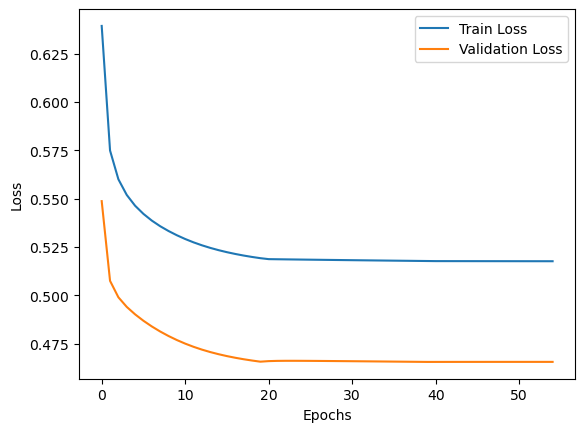

150/150 [==============================] - 0s 1ms/step
------------------------------------------------------------------------
Training for fold 2
Epoch 1/55
562/562 [==============================] - 4s 4ms/step - loss: 0.6449 - accuracy: 0.6371 - val_loss: 0.5386 - val_accuracy: 0.7865 - lr: 1.0000e-04
Epoch 2/55
562/562 [==============================] - 2s 3ms/step - loss: 0.5812 - accuracy: 0.7194 - val_loss: 0.5045 - val_accuracy: 0.7958 - lr: 1.0000e-04
Epoch 3/55
562/562 [==============================] - 2s 3ms/step - loss: 0.5685 - accuracy: 0.7244 - val_loss: 0.4935 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 4/55
562/562 [==============================] - 2s 3ms/step - loss: 0.5596 - accuracy: 0.7282 - val_loss: 0.4861 - val_accuracy: 0.8031 - lr: 1.0000e-04
Epoch 5/55
562/562 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7309 - val_loss: 0.4811 - val_accuracy: 0.8054 - lr: 1.0000e-04
Epoch 6/55
562/562 [==============================] - 2s 

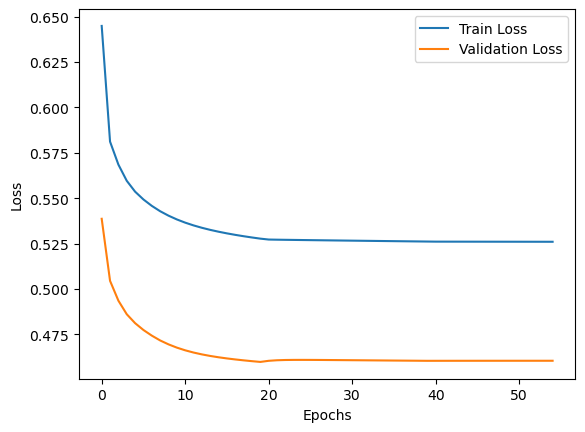

150/150 [==============================] - 1s 2ms/step
------------------------------------------------------------------------
Training for fold 3
Epoch 1/55
560/560 [==============================] - 4s 4ms/step - loss: 0.6810 - accuracy: 0.5624 - val_loss: 0.5917 - val_accuracy: 0.7992 - lr: 1.0000e-04
Epoch 2/55
560/560 [==============================] - 2s 3ms/step - loss: 0.5914 - accuracy: 0.7172 - val_loss: 0.5025 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 3/55
560/560 [==============================] - 2s 3ms/step - loss: 0.5670 - accuracy: 0.7245 - val_loss: 0.4899 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 4/55
560/560 [==============================] - 2s 4ms/step - loss: 0.5574 - accuracy: 0.7292 - val_loss: 0.4848 - val_accuracy: 0.8046 - lr: 1.0000e-04
Epoch 5/55
560/560 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7334 - val_loss: 0.4814 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 6/55
560/560 [==============================] - 2s 

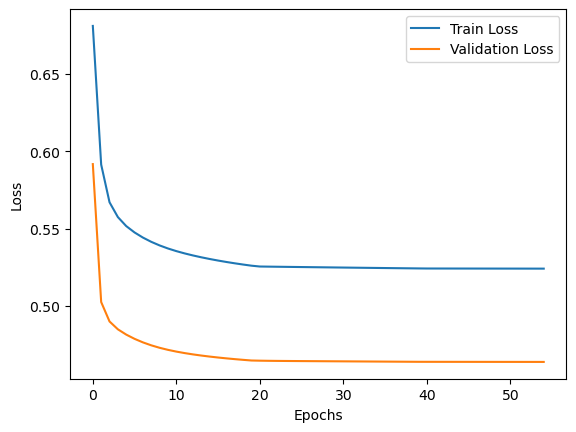

150/150 [==============================] - 1s 1ms/step
------------------------------------------------------------------------
Training for fold 4
Epoch 1/55
560/560 [==============================] - 4s 4ms/step - loss: 0.6217 - accuracy: 0.7170 - val_loss: 0.5406 - val_accuracy: 0.7873 - lr: 1.0000e-04
Epoch 2/55
560/560 [==============================] - 2s 3ms/step - loss: 0.5731 - accuracy: 0.7299 - val_loss: 0.5038 - val_accuracy: 0.7952 - lr: 1.0000e-04
Epoch 3/55
560/560 [==============================] - 2s 4ms/step - loss: 0.5599 - accuracy: 0.7335 - val_loss: 0.4930 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 4/55
560/560 [==============================] - 2s 4ms/step - loss: 0.5516 - accuracy: 0.7359 - val_loss: 0.4866 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 5/55
560/560 [==============================] - 2s 4ms/step - loss: 0.5458 - accuracy: 0.7390 - val_loss: 0.4826 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 6/55
560/560 [==============================] - 2s 

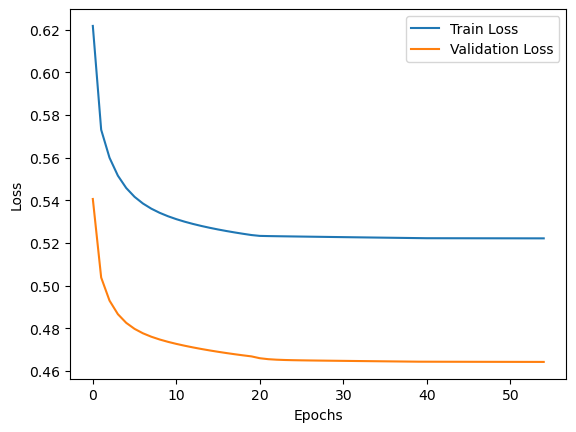

150/150 [==============================] - 1s 1ms/step
------------------------------------------------------------------------
Training for fold 5
Epoch 1/55
563/563 [==============================] - 4s 5ms/step - loss: 0.6432 - accuracy: 0.6774 - val_loss: 0.5532 - val_accuracy: 0.7837 - lr: 1.0000e-04
Epoch 2/55
563/563 [==============================] - 2s 4ms/step - loss: 0.5769 - accuracy: 0.7255 - val_loss: 0.5108 - val_accuracy: 0.7875 - lr: 1.0000e-04
Epoch 3/55
563/563 [==============================] - 2s 4ms/step - loss: 0.5633 - accuracy: 0.7308 - val_loss: 0.4996 - val_accuracy: 0.7923 - lr: 1.0000e-04
Epoch 4/55
563/563 [==============================] - 2s 4ms/step - loss: 0.5535 - accuracy: 0.7348 - val_loss: 0.4916 - val_accuracy: 0.7933 - lr: 1.0000e-04
Epoch 5/55
563/563 [==============================] - 2s 4ms/step - loss: 0.5463 - accuracy: 0.7384 - val_loss: 0.4863 - val_accuracy: 0.7944 - lr: 1.0000e-04
Epoch 6/55
563/563 [==============================] - 2s 

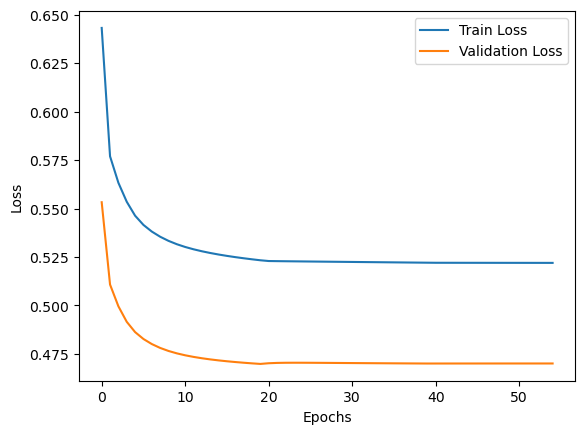

150/150 [==============================] - 0s 1ms/step
Accuracy: 0.807 (+/- 0.003)
Precision: 0.578 (+/- 0.015)
Recall: 0.469 (+/- 0.015)
F1 score: 0.518 (+/- 0.012)
AUC score: 0.686 (+/- 0.007)


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
AUC_scores = []

fold_no = 1
for train_index, test_index in kf.split(X_train, y_train):
    X_train_dl, X_test_dl = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_dl, y_test_dl = y_train.iloc[train_index], y_train.iloc[test_index]

    # Perform preprocessing steps on X_train_dl
    X_train_dl_preprocessed = enc_dl.fit_transform(X_train_dl)
    X_test_dl_preprocessed = enc_dl.transform(X_test_dl)

    # Apply SMOTE and undersampling to address class imbalance
    over = SMOTE(sampling_strategy=0.4, random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    steps = [('o',over),('u',under)]
    pipe = Pipeline(steps=steps)
        
    X_train_dl_resampled, y_train_dl_resampled =  pipe.fit_resample(X_train_dl_preprocessed, y_train_dl)
    
    round_cols = ['SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6'] + X_train_dl_resampled.filter(like='EDUCATION').columns.to_list() + X_train_dl_resampled.filter(like='MARRIAGE').columns.to_list() 
    for col in round_cols:
        X_train_dl_resampled[col] = X_train_dl_resampled[col].round()
        
    y_train_dl_resampled = pd.Series(y_train_dl_resampled,name='DEFAULT')
    concat = pd.concat([X_train_dl_resampled,y_train_dl_resampled],axis=1)
    non_default = concat[concat['DEFAULT']==0].drop('DEFAULT',axis=1)
    default = concat[concat['DEFAULT']==1].drop('DEFAULT',axis=1)
    
    null_columns = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6']
    
    augmented_default = augment_data_with_knn(default, null_columns)
    augmented_non_default = augment_data_with_knn(non_default, null_columns)
    augmented_non_default['DEFAULT'] = 0
    augmented_default['DEFAULT'] = 1
    augmented_data = pd.concat([augmented_default,augmented_non_default],axis=0)
    augmented_data = augmented_data.sample(frac=1, random_state=42)
    
    X_train_dl_augmented = augmented_data.drop('DEFAULT',axis=1)
    y_train_dl_augmented = augmented_data['DEFAULT']
    
    #scale = RobustScaler()
    #X_train_dl_augmented_scaled = X_train_dl_augmented.copy()
    #X_train_dl_augmented_scaled = scale.fit_transform(X_train_dl_augmented)
    #X_train_dl_augmented_scaled = pd.DataFrame(X_train_dl_augmented_scaled, columns =X_train_dl_augmented.columns)
   
    
    # Split training data into static and temporal features
    # Perform any necessary reshaping or transformations
    temp_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    static_cols_train = X_train_dl_augmented.drop(temp_cols,axis=1).columns.to_list()
    static_cols_test = X_test_dl_preprocessed.drop(temp_cols,axis=1).columns.to_list()
    
    X_train_dl_temp = X_train_dl_augmented[temp_cols]
    X_train_dl_static = X_train_dl_augmented[static_cols_train]
    X_test_dl_temp = X_test_dl_preprocessed[temp_cols]
    X_test_dl_static = X_test_dl_preprocessed[static_cols_test]

    PAY_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2','PAY_1']
    BILL_AMT_cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']
    PAY_AMT_cols = ['PAY_AMT6','PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
    
    PAY_train_dl = X_train_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_train_dl = X_train_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_train_dl = X_train_dl_temp[PAY_AMT_cols].to_numpy()
    
    PAY_test_dl = X_test_dl_temp[PAY_cols].to_numpy()
    BILL_AMT_test_dl = X_test_dl_temp[BILL_AMT_cols].to_numpy()
    PAY_AMT_test_dl = X_test_dl_temp[PAY_AMT_cols].to_numpy()   
    
    # Stack temporal features
    stacked_train = np.dstack((PAY_train_dl,BILL_AMT_train_dl,PAY_AMT_train_dl))
    stacked_test = np.dstack((PAY_test_dl,BILL_AMT_test_dl,PAY_AMT_test_dl))
    y_train_dl_augmented = y_train_dl_augmented.to_numpy()
    y_test_dl = y_test_dl.to_numpy()

    # Build and compile LSTM model
    num_time_steps, num_features = stacked_train.shape[1], stacked_train.shape[2]

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(16,return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    initial_learning_rate = 0.0001  # Initial learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 20  # Decay steps (number of steps before applying decay)
    epochs = 55

    def learning_rate_scheduler(epoch):
        return initial_learning_rate * decay_rate ** (epoch // decay_steps)
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=initial_learning_rate), metrics=['accuracy'])
    
    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}')
 
    # Train the model
    batch_size = 64
    
    # Train the model
    history = model.fit(stacked_train, y_train_dl_augmented, epochs=epochs, batch_size=batch_size, validation_data=(stacked_test, y_test_dl),shuffle=False,callbacks=[lr_scheduler])
    
    # Plot the loss on train vs validate tests
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    y_pred_probs = model.predict(stacked_test)
    y_pred = (y_pred_probs>=0.5).astype(int)    
    
    accuracy =  accuracy_score(y_test_dl,y_pred)
    precision = precision_score(y_test_dl,y_pred)
    recall = recall_score(y_test_dl,y_pred)
    f1 =  f1_score(y_test_dl,y_pred)
    AUC = roc_auc_score(y_test_dl,y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    AUC_scores.append(AUC)
    
    fold_no = fold_no + 1


# Calculate the average and standard deviation of the evaluation metrics
print('Accuracy: %.3f (+/- %.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print('Precision: %.3f (+/- %.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Recall: %.3f (+/- %.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('F1 score: %.3f (+/- %.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('AUC score: %.3f (+/- %.3f)' % (np.mean(AUC_scores), np.std(AUC_scores)))

In [ ]:
import tensorflow as tf

from keras.layers import Lambda
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.losses import mse
from keras import backend as K

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

class VAE_oversampling:
    def __init__(self, epochs=10, hidden_dim=10,
                 batch_size=1, latent_dim=2, original_dim=30,
                 minority_class_id=1, 
                 random_state=0, num_samples_to_generate=100,
                 optimizer = "adam"):
        self.epochs = epochs
        self.batch_size = batch_size
        self.original_dim = original_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.minority_class_id = minority_class_id
        self.random_state = random_state
        self.num_samples_to_generate = num_samples_to_generate
        self.optimizer = optimizer

        #set random seed
        np.random.seed(random_state)

    #Reparameterization function
    def sampling(self, args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2))
        return z_mean + K.exp(0.5*z_log_var) * epsilon
    
    def display_vae_training_history(self, history):        
        plt.figure(figsize=(6,3))
        plt.plot(history.history['loss'], label='loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.ylabel('MSE + KLD')
        plt.xlabel('No. epoch')
        plt.legend(loc="upper left") 
        plt.title("Autoencoder Training History")
        plt.show()
        
    def build_train_vae(self, X_train_AE):
        # Mapping inputs to latent distribution parameters
        inputs = Input(shape=(self.original_dim,))
        h = Dense(self.hidden_dim, activation='relu')(inputs)

        #Latent space layer
        z_mean = Dense(self.latent_dim)(h)
        z_log_sigma = Dense(self.latent_dim)(h)

        z = Lambda(self.sampling, output_shape=(self.latent_dim,))([z_mean, z_log_sigma])

        #Mapping these sampled latent points back to reconstructed inputs
        # Create encoder
        encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

        # Create decoder
        latent_inputs = Input(shape=(self.latent_dim,), name='z_sampling')
        x = Dense(self.hidden_dim, activation='relu')(latent_inputs)
        outputs = Dense(self.original_dim, activation='sigmoid')(x)
        decoder = Model(latent_inputs, outputs, name='decoder')

        # instantiate VAE model
        outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, outputs, name='vae_mlp')

        #Caclulate reconstruction from input and output
        reconstruction_loss = mse(inputs, outputs)
        reconstruction_loss *= self.original_dim
            
        #Kullback-liebler divergence loss
        kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        
        #The total vae loss
        vae_loss = K.mean(reconstruction_loss + kl_loss)
        vae.add_loss(vae_loss)

        vae.compile(optimizer=self.optimizer)

        history = vae.fit(X_train_AE, X_train_AE, self.batch_size, self.epochs, validation_split=0.1)

        self.display_vae_training_history(history)

        self.encoder = encoder
        self.decoder = decoder

        return vae
    
    def fit_sample(self, Xtrain, ytrain):
        #Number of samples to generate
        num_samples_to_generate = self.num_samples_to_generate
        
        #Scale the data set
        
        Xtrain_1 = Xtrain[ytrain == self.minority_class_id]
        X_train_AE_scaled = enc_dl.fit_transform(Xtrain_1[:])

        #Pass data set to the build function
        self.build_train_vae(X_train_AE_scaled)
        
        #randomly sample from standard normal
        z_latent_sample = np.random.normal(0, 1,
                                    (num_samples_to_generate,
                                     self.latent_dim))
        
        #Generate the synthetic samples by passing the z sample
        synthetic_samples = self.decoder.predict(z_latent_sample)
            
        synthetic_X = ss.inverse_transform(synthetic_samples)
        synthetic_y = np.ones(num_samples_to_generate)\
            * self.minority_class_id
        
        #Final step, concetenate original observations with synthetic observations
        X_new = np.concatenate((Xtrain, synthetic_X))
        y_new = np.concatenate((ytrain, synthetic_y))
        return(X_new, y_new)

In [ ]:
std = StandardScaler()

p_std = std.fit_transform(p) 




In [ ]:
y_sub

6699     0
23576    0
7773     0
15511    0
20152    0
        ..
14825    1
17798    1
10717    0
8867     1
13077    1
Name: DEFAULT, Length: 300, dtype: int64

In [ ]:
 vos = VAE_oversampling(hidden_dim= 64,
                                latent_dim=2,
                                original_dim=p_sub.shape[1],
                                minority_class_id=1,
                                epochs=100,
                                batch_size=1,
                                num_samples_to_generate = 100,
                                random_state = 0,
                                optimizer="adam")

    


p_new,y_new = vos.fit_sample(p_sub,y_sub)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\diama\anaconda3\envs\spyder\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vae_mlp" is incompatible with the layer: expected shape=(None, 23), found shape=(1, 25)


In [ ]:
X_res_val = pd.DataFrame(X_res_val)

In [ ]:
p_std

array([[-0.82752799, -1.23711731,  0.21028223, ..., -0.31794608,
        -0.31648605, -0.29462289],
       [ 0.86949082,  0.80833078, -1.13162756, ..., -0.31794608,
        -0.29330356, -0.27785986],
       [-0.67325355,  0.80833078,  1.55219203, ..., -0.31794608,
        -0.31648605, -0.29462289],
       ...,
       [-0.4418419 ,  0.80833078,  0.21028223, ...,  0.01517391,
        -0.18249128, -0.24913131],
       [ 1.48658857, -1.23711731, -1.13162756, ..., -0.31794608,
        -0.31648605, -0.29462289],
       [ 1.02376526, -1.23711731, -1.13162756, ..., -0.31794608,
        -0.31648605, -0.29462289]])

In [ ]:
X_res_val

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.827528,-1.237117,0.210282,0.846309,0.822714,0.902546,-1.557234,-0.696624,-0.669022,-1.533004,...,-0.667331,-0.674045,-0.663933,-0.653313,-0.347288,-0.229635,-0.295341,-0.317946,-0.316486,-0.294623
1,0.869491,0.808331,-1.131628,-1.071793,0.387132,-1.767027,-1.557234,-1.533763,-1.526172,-1.533004,...,-0.676625,-0.674045,-0.663933,-0.647428,-0.347288,-0.258438,-0.295341,-0.317946,-0.293304,-0.277860
2,-0.673254,0.808331,1.552192,-1.071793,0.931610,-0.877169,-0.723828,-0.696624,-1.526172,-1.533004,...,-0.678588,-0.674045,-0.663933,-0.653313,0.014184,-0.264520,-0.295341,-0.317946,-0.316486,-0.294623
3,0.252393,-1.237117,0.210282,-1.071793,0.060445,-0.877169,-0.723828,-0.696624,-0.669022,-0.649843,...,-0.668529,-0.674045,-0.618350,-0.630075,-0.117722,-0.233347,-0.295341,-0.133464,-0.221239,-0.158543
4,0.715216,0.808331,0.210282,-1.071793,1.040505,0.012689,0.109577,0.140515,0.188129,0.233318,...,2.117070,1.869138,1.640633,1.586405,0.613893,0.182955,0.098794,0.048486,0.014692,-0.068858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,-0.273590,-0.037141,0.109725,-0.050111,0.300218,0.612583,0.495579,0.442738,0.410023,0.385934,...,-0.033765,-0.024872,-0.017686,-0.015019,-0.136214,-0.114653,-0.103628,-0.105051,-0.099993,-0.098126
27096,-0.206921,-0.052499,0.102712,-0.050111,0.136079,0.612583,0.495579,0.442738,0.410023,0.385934,...,0.279764,0.138969,0.093883,0.110645,-0.007669,-0.064091,-0.045097,0.059049,0.056001,-0.042525
27097,-0.297759,-0.058142,0.100384,0.211697,0.025733,0.612583,0.495579,0.442738,0.410023,0.385934,...,-0.033765,-0.024872,-0.017686,-0.015019,-0.136220,-0.114656,-0.103639,-0.105078,-0.100011,-0.098132
27098,-0.294440,-0.041041,0.243715,-0.050111,0.197438,0.612583,0.495579,0.442738,0.410023,0.385934,...,-0.033765,-0.024872,-0.017686,-0.015019,-0.136216,-0.114654,-0.103634,-0.105067,-0.100005,-0.098130
